In [35]:
from flask import Flask, render_template, redirect
from flask_pymongo import PyMongo
import pandas as pd
import urllib.request
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
app = Flask(__name__)

In [5]:
from splinter import Browser
from bs4 import BeautifulSoup
def init_browser():
    # @NOTE: Replace the path with your actual path to the chromedriver
    executable_path = {"executable_path": "C:\chrome_driver\chromedriver.exe"}
    return Browser("chrome", **executable_path, headless=False)

In [6]:
#simple but not working, too many colums, could cut colums. 
# url = "https://projects.fivethirtyeight.com/2020-primaries/democratic/national/"

# table = pd.read_html(url)
# table

In [7]:
table3 = table["Dates"]

NameError: name 'table' is not defined

In [8]:
import requests
url = urllib.request.urlopen("https://projects.fivethirtyeight.com/2020-primaries/democratic/national/").read()
soup = BeautifulSoup(url,'lxml')


In [9]:
def p2f(x): # this is code i stole to strip percentages and convert to number, it also skips function if blank
    if not x:
        return x
    else:
        return float(x.strip('%'))/100

In [10]:
convert_date2 =  'Jul 27-30, 2019'

In [27]:
# def convert_long_date(this):
#     r = this.split("-")
#     c = r[1].replace(u'\xa0', ' ')
#     datetime_object = datetime.strptime(c, '%b %d %Y')
#     return(datetime_object)
# # r2 = r[1].split(',')
# # r2
# # r3= r[0].split(' ')
# # almost_there = r3[0]+ " " +r2[0]+r2[1]
# # almost_there2 = almost_there
# # datetime_object = datetime.strptime(almost_there2, '%b %d %Y')
# # return(datetime_object)
# convert_long_date('Sep\xa023-Oct\xa04, 2019')

ValueError: time data 'Oct 4, 2019' does not match format '%b %d %Y'

In [12]:
# this will be to convert over a date 
def convert_date(y):
    r = y.split("-")
    r2 = r[1].split(',')
    r2
    r3= r[0].split(' ')
    almost_there = r3[0]+ " " +r2[0]+r2[1]
    almost_there2 = almost_there
    datetime_object = datetime.strptime(almost_there2, '%b %d %Y')
    return(datetime_object)
    
    

In [13]:
l = convert_date(convert_date2)
l

datetime.datetime(2019, 7, 30, 0, 0)

In [14]:

i=0
results = []
table = soup.find('table')
table_rows = table.find_all('tr')
date = []
Biden =[]
Warren =[]
Sanders =[]
Harris =[]
Buttigieg =[]

for tr in table_rows:
    td = tr.find_all('td')
    #print(td.text)
    n =0
    row = []
    for i in td:
        a = i.text
        # this is where i need to put in a function that converrts the text to a usable date. 
        if n==2:
            if len(a) >16 or len(a) == 11 or len(a)==12 :
                date.append(a)
            else:
                date.append(convert_date(a))
            #else:    
                #date_proper = convert_date(a)
                #row.append(date_proper)
            n = n+1
        elif n ==6: 
            Biden.append(p2f(a))
            n = n+1
        elif n ==7:
            Warren.append(p2f(a))
            n = n+1
        elif n==8:
            Sanders.append(p2f(a))
            n = n+1
        elif n==9:
            Harris.append(p2f(a))
            n = n+1
        elif n==10:
            Buttigieg.append(p2f(a))
            n = n+1
        else:
            n = n+1
    #row = [[i.text for i in td]]
#     row = []
#     i = 0
#     while i <= 20:
#         row.append(td)
#         i=i+1
#     # this injects all the texts from each spot in our row. 
# we have all the data, but we only want the first 20 columbs.     

In [85]:
for n, i in enumerate(Biden):
    if i == '':
        Biden[n] = None
for n, i in enumerate(Warren):
    if i == '':
        Warren[n] = None
for n, i in enumerate(Sanders):
    if i == '':
        Sanders[n] = None
for n, i in enumerate(Harris):
    if i == '':
        Harris[n] = None
for n, i in enumerate(Buttigieg):
    if i == '':
        Buttigieg[n] = None         

In [ ]:
def simplify(canidate):
    for n, i in enumerate(canidate):
        if i == '':
            canidate[n] = None
            
Biden1 = simplify(Biden)     
Warren1 = simplify(Warren) 
Sanders1 = simplify(Sanders)
Harris1 = simplify(Harris)
Buttigieg1 = simplify(Buttigieg)

In [43]:
[float(i) for i in Biden]

ValueError: could not convert string to float: 

In [82]:
print(Sanders1)

None


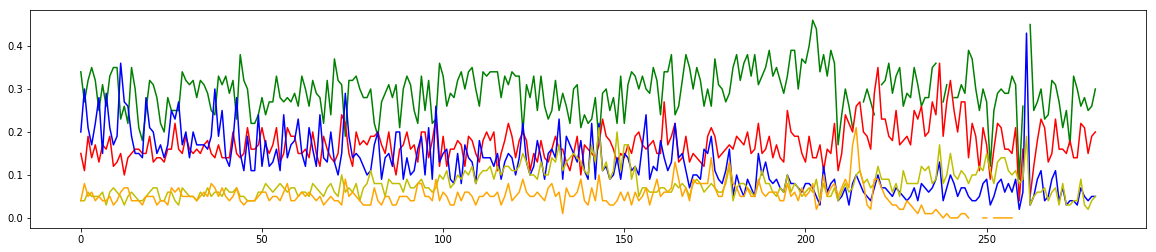

In [93]:
#make graphs. 
fig= plt.figure(figsize=(20,4))
plt.plot(Biden, color ='g')
plt.plot(Warren, color = 'r')
plt.plot(Sanders, color = 'b')
plt.plot(Harris, color = 'y')
plt.plot(Buttigieg, color = 'orange')



In [339]:
results

[[],
 [datetime.datetime(2019, 10, 14, 0, 0),
  0.34,
  0.15,
  0.2,
  0.04,
  0.04,
  0.03,
  0.02,
  0.03],
 [datetime.datetime(2019, 10, 13, 0, 0),
  0.27,
  0.11,
  0.3,
  0.04,
  0.08,
  0.02,
  0.02,
  0.02],
 [datetime.datetime(2019, 10, 13, 0, 0),
  0.32,
  0.19,
  0.21,
  0.06,
  0.05,
  0.03,
  0.02,
  0.03],
 [datetime.datetime(2019, 10, 10, 0, 0),
  0.35,
  0.14,
  0.17,
  0.05,
  0.06,
  0.03,
  0.02,
  0.02],
 [datetime.datetime(2019, 10, 8, 0, 0),
  0.32,
  0.17,
  0.22,
  0.05,
  0.04,
  0.03,
  0.02,
  0.02],
 [datetime.datetime(2019, 10, 8, 0, 0),
  0.25,
  0.13,
  0.28,
  0.05,
  0.05,
  0.01,
  0.01,
  0.03],
 [datetime.datetime(2019, 10, 7, 0, 0),
  0.31,
  0.17,
  0.15,
  0.06,
  0.04,
  0.04,
  0.01,
  0.02],
 [datetime.datetime(2019, 10, 7, 0, 0),
  0.26,
  0.16,
  0.29,
  0.03,
  0.04,
  0.01,
  0.02,
  0.03],
 ['Sep\xa030-Oct\xa06, 2019', 0.33, 0.19, 0.21, 0.06, 0.05, 0.03, 0.02, 0.03],
 [datetime.datetime(2019, 10, 4, 0, 0),
  0.35,
  0.12,
  0.17,
  0.07,
  

In [157]:
print(i)

<td class="answers hide-desktop"><div class="mobile-answers-container"><div class="mobile-answer"><p>Biden</p><div class="heat-map" style="background-color:#accbed;">30%</div></div><div class="mobile-answer"><p>Sanders</p><div class="heat-map" style="background-color:#c6daf2;">20%</div></div><div class="mobile-answer"><p>Clinton</p><div class="heat-map" style="background-color:#d3e2f5;">16%</div></div><div class="mobile-answer"><p>Warren</p><div class="heat-map" style="background-color:#ecf3fb;">5%</div></div><div class="mobile-answer"><p>Booker</p><div class="heat-map" style="background-color:#ecf3fb;">5%</div></div><div class="mobile-answer"><p>Harris</p><div class="heat-map" style="background-color:#ecf3fb;">5%</div></div><div class="mobile-answer"><p>Bloomberg</p><div class="heat-map" style="background-color:#ecf3fb;">5%</div></div></div></td>


In [132]:
my_table = soup.table('table',{'class':'polls-table tracker clone visible'})
my_table

In [83]:
# links = my_table.findAll('a')
# links

In [45]:
# websites = []
# for link in links:
#     websites.append(link.get('dates'))
# print(websites)    


In [104]:
url2 = requests.get("https://en.wikipedia.org/wiki/Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries").text
soup2 = BeautifulSoup(url2,'lxml')
#print(soup2.prettify())

InvalidSchema: No connection adapters were found for '<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Nationwide opinion polling for the 2020 Democratic Party presidential primaries - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries","wgTitle":"Nationwide opinion polling for the 2020 Democratic Party presidential primaries","wgCurRevisionId":920908716,"wgRevisionId":920908716,"wgArticleId":59151996,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using Timeline","Use American English from April 2019","All Wikipedia articles written in American English","Use mdy dates from April 2019","Commons category link is on Wikidata","All articles with unsourced statements","Articles with unsourced statements from September 2019","Pages using the Graph extension","2020 United States Democratic presidential primaries","Opinion polling for the 2020 United States presidential election"],"wgBreakFrames":!1,"wgPageContentLanguage"
:"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRelevantPageName":"Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries","wgRelevantArticleId":59151996,"wgRequestId":"XaIGoApAAD8AAEr0lOsAAACB","wgCSPNonce":!1,"wgIsProbablyEditable":!0,"wgRelevantPageIsProbablyEditable":!0,"wgRestrictionEdit":[],"wgRestrictionMove":[],"wgMediaViewerOnClick":!0,"wgMediaViewerEnabledByDefault":!0,"wgPopupsReferencePreviews":!1,"wgPopupsConflictsWithNavPopupGadget":!1,"wgVisualEditor":{"pageLanguageCode":"en","pageLanguageDir":"ltr","pageVariantFallbacks":"en"},"wgMFDisplayWikibaseDescriptions":{"search":!0,"nearby":!0,"watchlist":!0,"tagline":
!1},"wgWMESchemaEditAttemptStepOversample":!1,"wgULSCurrentAutonym":"English","wgNoticeProject":"wikipedia","wgWikibaseItemId":"Q60788878","wgCentralAuthMobileDomain":!1,"wgEditSubmitButtonLabelPublish":!0};RLSTATE={"ext.globalCssJs.user.styles":"ready","site.styles":"ready","noscript":"ready","user.styles":"ready","ext.globalCssJs.user":"ready","user":"ready","user.options":"ready","user.tokens":"loading","ext.cite.styles":"ready","ext.timeline.styles":"ready","mediawiki.legacy.shared":"ready","mediawiki.legacy.commonPrint":"ready","jquery.makeCollapsible.styles":"ready","mediawiki.toc.styles":"ready","wikibase.client.init":"ready","ext.visualEditor.desktopArticleTarget.noscript":"ready","ext.uls.interlanguage":"ready","ext.wikimediaBadges":"ready","ext.3d.styles":"ready","mediawiki.skinning.interface":"ready","skins.vector.styles":"ready"};RLPAGEMODULES=["ext.cite.ux-enhancements","ext.cite.tracking","site","mediawiki.page.startup","mediawiki.page.ready",
"jquery.makeCollapsible","mediawiki.toc","mediawiki.searchSuggest","ext.gadget.teahouse","ext.gadget.ReferenceTooltips","ext.gadget.watchlist-notice","ext.gadget.DRN-wizard","ext.gadget.charinsert","ext.gadget.refToolbar","ext.gadget.extra-toolbar-buttons","ext.gadget.switcher","ext.centralauth.centralautologin","mmv.head","mmv.bootstrap.autostart","ext.popups","ext.visualEditor.desktopArticleTarget.init","ext.visualEditor.targetLoader","ext.eventLogging","ext.wikimediaEvents","ext.navigationTiming","ext.uls.compactlinks","ext.uls.interface","ext.cx.eventlogging.campaigns","ext.quicksurveys.init","ext.centralNotice.geoIP","ext.centralNotice.startUp","skins.vector.js"];</script>
<script>(RLQ=window.RLQ||[]).push(function(){mw.loader.implement("user.tokens@tffin",function($,jQuery,require,module){/*@nomin*/mw.user.tokens.set({"patrolToken":"+\\","watchToken":"+\\","csrfToken":"+\\"});
});});</script>
<link rel="stylesheet" href="/w/load.php?lang=en&amp;modules=ext.3d.styles%7Cext.cite.styles%7Cext.timeline.styles%7Cext.uls.interlanguage%7Cext.visualEditor.desktopArticleTarget.noscript%7Cext.wikimediaBadges%7Cjquery.makeCollapsible.styles%7Cmediawiki.legacy.commonPrint%2Cshared%7Cmediawiki.skinning.interface%7Cmediawiki.toc.styles%7Cskins.vector.styles%7Cwikibase.client.init&amp;only=styles&amp;skin=vector"/>
<script async="" src="/w/load.php?lang=en&amp;modules=startup&amp;only=scripts&amp;raw=1&amp;skin=vector"></script>
<meta name="ResourceLoaderDynamicStyles" content=""/>
<link rel="stylesheet" href="/w/load.php?lang=en&amp;modules=site.styles&amp;only=styles&amp;skin=vector"/>
<meta name="generator" content="MediaWiki 1.35.0-wmf.1"/>
<meta name="referrer" content="origin"/>
<meta name="referrer" content="origin-when-crossorigin"/>
<meta name="referrer" content="origin-when-cross-origin"/>
<link rel="alternate" href="android-app://org.wikipedia/http/en.m.wikipedia.org/wiki/Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries"/>
<link rel="alternate" type="application/x-wiki" title="Edit this page" href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit"/>
<link rel="edit" title="Edit this page" href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit"/>
<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png"/>
<link rel="shortcut icon" href="/static/favicon/wikipedia.ico"/>
<link rel="search" type="application/opensearchdescription+xml" href="/w/opensearch_desc.php" title="Wikipedia (en)"/>
<link rel="EditURI" type="application/rsd+xml" href="//en.wikipedia.org/w/api.php?action=rsd"/>
<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/"/>
<link rel="canonical" href="https://en.wikipedia.org/wiki/Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries"/>
<link rel="dns-prefetch" href="//login.wikimedia.org"/>
<link rel="dns-prefetch" href="//meta.wikimedia.org" />
<!--[if lt IE 9]><script src="/w/resources/lib/html5shiv/html5shiv.js"></script><![endif]-->
</head>
<body class="mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries rootpage-Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries skin-vector action-view">
<div id="mw-page-base" class="noprint"></div>
<div id="mw-head-base" class="noprint"></div>
<div id="content" class="mw-body" role="main">
	<a id="top"></a>
	<div id="siteNotice" class="mw-body-content"><!-- CentralNotice --></div>
	<div class="mw-indicators mw-body-content">
</div>

	<h1 id="firstHeading" class="firstHeading" lang="en">Nationwide opinion polling for the 2020 Democratic Party presidential primaries</h1>
	
	<div id="bodyContent" class="mw-body-content">
		<div id="siteSub" class="noprint">From Wikipedia, the free encyclopedia</div>
		<div id="contentSub"></div>
		
		
		
		<div id="jump-to-nav"></div>
		<a class="mw-jump-link" href="#mw-head">Jump to navigation</a>
		<a class="mw-jump-link" href="#p-search">Jump to search</a>
		<div id="mw-content-text" lang="en" dir="ltr" class="mw-content-ltr"><div class="mw-parser-output"><p class="mw-empty-elt">

</p>
<table class="vertical-navbox nowraplinks vcard hlist" style="float:right;clear:right;width:22.0em;margin:0 0 1.0em 1.0em;background:#f9f9f9;border:1px solid #aaa;padding:0.2em;border-spacing:0.4em 0;text-align:center;line-height:1.4em;font-size:88%;border: 4px double #d69d36; background:#f8f8f8; color: #002C77; padding: 1px; padding-top: 6px; padding-bottom: 6px; width:23.5em;"><tbody><tr><th style="padding:0.2em 0.4em 0.2em;font-size:145%;line-height:1.2em;background: #B10C30; border: 1px solid #d69d36; padding: 6px"><a href="/wiki/File:Seal_of_the_President_of_the_United_States.svg" class="image"><img alt="Seal of the President of the United States.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Seal_of_the_President_of_the_United_States.svg/42px-Seal_of_the_President_of_the_United_States.svg.png" decoding="async" width="42" height="42" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Seal_of_the_President_of_the_United_States.svg/63px-Seal_of_the_President_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/36/Seal_of_the_President_of_the_United_States.svg/84px-Seal_of_the_President_of_the_United_States.svg.png 2x" data-file-width="2424" data-file-height="2425" /></a> <br /> <a href="/wiki/2020_United_States_presidential_election" title="2020 United States presidential election"><span style="color: white; font-size: 80%; font-family: sans-serif;"><b>2020 U.S. presidential election </b></span></a></th></tr><tr><td style="padding:0 0.1em 0.4em;background: #f8f8f8">
<ul><li><a href="/wiki/Timeline_of_the_2020_United_States_presidential_election" title="Timeline of the 2020 United States presidential election">Timeline</a></li>
<li><a href="/wiki/Political_parties_in_the_United_States" title="Political parties in the United States">Parties</a></li>
<li>Polling
<ul><li><a href="/wiki/Nationwide_opinion_polling_for_the_2020_United_States_presidential_election" title="Nationwide opinion polling for the 2020 United States presidential election">national</a></li>
<li><a href="/wiki/Statewide_opinion_polling_for_the_2020_United_States_presidential_election" title="Statewide opinion polling for the 2020 United States presidential election">statewide</a></li></ul></li></ul></td>
</tr><tr><th style="padding:0.1em;background:#FFF; border: 1px solid #d69d36;">
<a href="/wiki/Republican_Party_(United_States)" title="Republican Party (United States)"><span style="color:#002C77">Republican Party</span></a></th></tr><tr><td style="padding:0 0.1em 0.4em;background: #f8f8f8">
<ul><li><a href="/wiki/2020_Republican_Party_presidential_primaries" title="2020 Republican Party presidential primaries">Primaries</a></li>
<li><a href="/wiki/2020_Republican_Party_presidential_debates" title="2020 Republican Party presidential debates">Debates</a></li>
<li><a href="/wiki/Opinion_polling_for_the_2020_Republican_Party_presidential_primaries" title="Opinion polling for the 2020 Republican Party presidential primaries">Polling</a></li>
<li><a href="/wiki/Endorsements_in_the_2020_Republican_Party_presidential_primaries" title="Endorsements in the 2020 Republican Party presidential primaries">Endorsements</a></li>
<li><a href="/wiki/2020_Republican_National_Convention" title="2020 Republican National Convention">Convention</a></li></ul></td>
</tr><tr><th style="padding:0.1em;background:#FFF; border: 1px solid #d69d36;">
<a href="/wiki/Democratic_Party_(United_States)" title="Democratic Party (United States)"><span style="color:#002C77">Democratic Party</span></a></th></tr><tr><td style="padding:0 0.1em 0.4em;background: #f8f8f8">
<ul><li><a href="/wiki/2020_Democratic_Party_presidential_primaries" title="2020 Democratic Party presidential primaries">Primaries</a></li>
<li><a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums" title="2020 Democratic Party presidential debates and forums">Debates and forums</a></li>
<li><a href="/wiki/Political_positions_of_the_2020_Democratic_Party_presidential_primary_candidates" title="Political positions of the 2020 Democratic Party presidential primary candidates">Positions</a></li>
<li>Polling
<ul><li><a class="mw-selflink selflink">national</a></li>
<li><a href="/wiki/Statewide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries" title="Statewide opinion polling for the 2020 Democratic Party presidential primaries">statewide</a></li></ul></li>
<li><a href="/wiki/Endorsements_in_the_2020_Democratic_Party_presidential_primaries" title="Endorsements in the 2020 Democratic Party presidential primaries">Endorsements</a></li>
<li><a href="/wiki/2020_Democratic_National_Convention" title="2020 Democratic National Convention">Convention</a></li>
<li><a href="/wiki/List_of_Democratic_Party_automatic_delegates,_2020" title="List of Democratic Party automatic delegates, 2020">Automatic delegates</a></li></ul></td>
</tr><tr><th style="padding:0.1em;background:#FFF; border: 1px solid #d69d36;">
<a href="/wiki/Third_party_(United_States)" title="Third party (United States)"><span style="color:#002466">Minor parties</span></a></th></tr><tr><td style="padding:0 0.1em 0.4em;background: #f8f8f8">
<ul><li><a href="/wiki/Third-party_and_independent_candidates_for_the_2020_United_States_presidential_election" class="mw-redirect" title="Third-party and independent candidates for the 2020 United States presidential election">Third party and independent candidates</a></li>
<li><a href="/wiki/Libertarian_Party_(United_States)" title="Libertarian Party (United States)"><span style="color:#002C77">Libertarian Party</span></a>
<ul><li><a href="/wiki/2020_Libertarian_Party_presidential_primaries" title="2020 Libertarian Party presidential primaries">primaries</a></li>
<li><a href="/wiki/2020_Libertarian_National_Convention" title="2020 Libertarian National Convention">convention</a></li></ul></li>
<li><a href="/wiki/Green_Party_(United_States)" class="mw-redirect" title="Green Party (United States)"><span style="color:#002C77">Green Party</span></a>
<ul><li><a href="/wiki/2020_Green_Party_presidential_primaries" title="2020 Green Party presidential primaries">primaries</a></li>
<li><a href="/wiki/2020_Green_National_Convention" title="2020 Green National Convention">convention</a></li></ul></li></ul></td>
</tr><tr><th style="padding:0.1em;background:#FFF; border: 1px solid #d69d36;">
<a href="/wiki/2020_United_States_elections" title="2020 United States elections">Related races</a></th></tr><tr><td style="padding:0 0.1em 0.4em;background: #f8f8f8">
<ul><li><a href="/wiki/2020_United_States_House_of_Representatives_elections" title="2020 United States House of Representatives elections">House</a></li>
<li><a href="/wiki/2020_United_States_Senate_elections" title="2020 United States Senate elections">Senate</a></li>
<li><a href="/wiki/2020_United_States_gubernatorial_elections" title="2020 United States gubernatorial elections">Governors</a></li></ul></td>
</tr><tr><td style="padding:0.3em 0.4em 0.3em;font-weight:bold;border-top: 1px solid #aaa; border-bottom: 1px solid #aaa;background:#002C77; font-size:95%; border: 1px solid #d69d36;">
<table style="width:100%; margin:1px;"><tbody><tr>
<td style="text-align:left; vertical-align:middle; padding:0 0.5em 0 0;color:white;" class="noprint">&#8592;&#160;<a href="/wiki/2016_United_States_presidential_election" title="2016 United States presidential election"><span style="color:white">2016</span></a></td>
<td style="text-align:center; vertical-align:middle;; padding:0 1px;" class=""><a href="/wiki/2020_United_States_presidential_election" title="2020 United States presidential election"><span style="color:white">2020</span></a></td>
<td style="text-align:right; vertical-align:middle;; padding:0 0 0 0.5em;color:white;" class="noprint"><span style="color:white">2024</span>&#160;&#8594;</td>
</tr></tbody></table></td></tr><tr><td style="text-align:right;font-size:115%;padding-top: 0.6em;background:#f8f8f8; text-align:center;"><div class="plainlinks hlist navbar mini"><ul><li class="nv-view"><a href="/wiki/Template:US_2020_presidential_elections_series" title="Template:US 2020 presidential elections series"><abbr title="View this template">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:US_2020_presidential_elections_series" title="Template talk:US 2020 presidential elections series"><abbr title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:US_2020_presidential_elections_series&amp;action=edit"><abbr title="Edit this template">e</abbr></a></li></ul></div></td></tr></tbody></table>
<p>This is a list of nationwide public <a href="/wiki/Opinion_poll" title="Opinion poll">opinion polls</a> that have been conducted relating to the <a href="/wiki/2020_Democratic_Party_presidential_primaries" title="2020 Democratic Party presidential primaries">Democratic primaries</a> for the <a href="/wiki/2020_United_States_presidential_election" title="2020 United States presidential election">2020 United States presidential election</a>. The persons named in the polls are declared candidates or have received media speculation about their possible candidacy.
</p><p>Given the large number of candidates, the scores of certain low-polling and infrequently-polled candidates have been combined within the "other" column; their exact scores may be viewed by viewing the footnotes associated with each poll. The polls included are among Democrats or Democrats and Democratic-leaning independents, and do not include Republican-leaning independents. Open-ended polls are included and marked with an asterisk (*), but closed-ended versions of such polls are listed where possible. If multiple versions of polls are provided, the version used for debate qualification is prioritized, then the version among likely voters, then registered voters, then adults.
</p>
<style data-mw-deduplicate="TemplateStyles:r886046785">.mw-parser-output .toclimit-2 .toclevel-1 ul,.mw-parser-output .toclimit-3 .toclevel-2 ul,.mw-parser-output .toclimit-4 .toclevel-3 ul,.mw-parser-output .toclimit-5 .toclevel-4 ul,.mw-parser-output .toclimit-6 .toclevel-5 ul,.mw-parser-output .toclimit-7 .toclevel-6 ul{display:none}</style><div class="toclimit-3"><div id="toc" class="toc"><input type="checkbox" role="button" id="toctogglecheckbox" class="toctogglecheckbox" style="display:none" /><div class="toctitle" lang="en" dir="ltr"><h2>Contents</h2><span class="toctogglespan"><label class="toctogglelabel" for="toctogglecheckbox"></label></span></div>
<ul>
<li class="toclevel-1 tocsection-1"><a href="#Background"><span class="tocnumber">1</span> <span class="toctext">Background</span></a></li>
<li class="toclevel-1 tocsection-2"><a href="#Polling_aggregation"><span class="tocnumber">2</span> <span class="toctext">Polling aggregation</span></a></li>
<li class="toclevel-1 tocsection-3"><a href="#National_polling"><span class="tocnumber">3</span> <span class="toctext">National polling</span></a>
<ul>
<li class="toclevel-2 tocsection-4"><a href="#October_2019"><span class="tocnumber">3.1</span> <span class="toctext">October 2019</span></a></li>
<li class="toclevel-2 tocsection-5"><a href="#September_2019"><span class="tocnumber">3.2</span> <span class="toctext">September 2019</span></a></li>
<li class="toclevel-2 tocsection-6"><a href="#August_2019"><span class="tocnumber">3.3</span> <span class="toctext">August 2019</span></a></li>
<li class="toclevel-2 tocsection-7"><a href="#July_2019"><span class="tocnumber">3.4</span> <span class="toctext">July 2019</span></a></li>
<li class="toclevel-2 tocsection-8"><a href="#April–June_2019"><span class="tocnumber">3.5</span> <span class="toctext">April–June 2019</span></a></li>
<li class="toclevel-2 tocsection-9"><a href="#January–March_2019"><span class="tocnumber">3.6</span> <span class="toctext">January–March 2019</span></a></li>
<li class="toclevel-2 tocsection-10"><a href="#October–December_2018"><span class="tocnumber">3.7</span> <span class="toctext">October–December 2018</span></a></li>
<li class="toclevel-2 tocsection-11"><a href="#Before_October_2018"><span class="tocnumber">3.8</span> <span class="toctext">Before October 2018</span></a></li>
<li class="toclevel-2 tocsection-12"><a href="#Head-to-head_polls"><span class="tocnumber">3.9</span> <span class="toctext">Head-to-head polls</span></a></li>
<li class="toclevel-2 tocsection-13"><a href="#Favorability_ratings"><span class="tocnumber">3.10</span> <span class="toctext">Favorability ratings</span></a></li>
</ul>
</li>
<li class="toclevel-1 tocsection-14"><a href="#See_also"><span class="tocnumber">4</span> <span class="toctext">See also</span></a></li>
<li class="toclevel-1 tocsection-15"><a href="#Notes"><span class="tocnumber">5</span> <span class="toctext">Notes</span></a></li>
<li class="toclevel-1 tocsection-16"><a href="#References"><span class="tocnumber">6</span> <span class="toctext">References</span></a></li>
<li class="toclevel-1 tocsection-17"><a href="#External_links"><span class="tocnumber">7</span> <span class="toctext">External links</span></a></li>
</ul>
</div>
</div>
<h2><span class="mw-headline" id="Background">Background</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=1" title="Edit section: Background">edit</a><span class="mw-editsection-bracket">]</span></span></h2>
<div role="note" class="hatnote navigation-not-searchable">See also: <a href="/wiki/2020_Democratic_Party_presidential_primaries#Timeline" title="2020 Democratic Party presidential primaries">2020 Democratic Party presidential primaries §&#160;Timeline</a></div>
<p>The <a href="/wiki/Democratic_National_Committee" title="Democratic National Committee">Democratic National Committee</a> (DNC) has determined that candidates may qualify for the first two <a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums" title="2020 Democratic Party presidential debates and forums">Democratic primary debates</a> either by polling at 1% or higher in at least three national or early-state (Iowa, New Hampshire, Nevada, and South Carolina) polls sponsored or conducted by designated organizations (in different regions if by the same organization) published after January 1, 2019 up until June 12, 2019, or by a fundraising threshold requiring at least 65,000 unique donors with at least 200 in 20 different states. Should more than 20 candidates meet either threshold, then candidates meeting both thresholds will be given highest priority for entry into the debates, followed by those with the highest polling average and those with the most donors. The pollsters and sponsors of polls designated for consideration by the DNC are the <a href="/wiki/Associated_Press" title="Associated Press">Associated Press</a>, <a href="/wiki/ABC_News" title="ABC News">ABC News</a>, <a href="/wiki/CBS_News" title="CBS News">CBS News</a>, <a href="/wiki/CNN" title="CNN">CNN</a>, <i><a href="/wiki/The_Des_Moines_Register" title="The Des Moines Register">The Des Moines Register</a></i>, <a href="/wiki/Fox_News" title="Fox News">Fox News</a>, the <i><a href="/wiki/Las_Vegas_Review-Journal" title="Las Vegas Review-Journal">Las Vegas Review-Journal</a></i>, <a href="/wiki/Monmouth_University_Polling_Institute" title="Monmouth University Polling Institute">Monmouth University</a>, <a href="/wiki/NBC_News" title="NBC News">NBC News</a>, <i><a href="/wiki/The_New_York_Times" title="The New York Times">The New York Times</a></i>, <a href="/wiki/National_Public_Radio" class="mw-redirect" title="National Public Radio">National Public Radio</a>, <a href="/wiki/Quinnipiac_University_Polling_Institute" title="Quinnipiac University Polling Institute">Quinnipiac University</a>, <a href="/wiki/Reuters" title="Reuters">Reuters</a>, the <a href="/wiki/University_of_New_Hampshire" title="University of New Hampshire">University of New Hampshire</a>, <i><a href="/wiki/USA_Today" title="USA Today">USA Today</a></i>, <i><a href="/wiki/The_Wall_Street_Journal" title="The Wall Street Journal">The Wall Street Journal</a></i>, <i><a href="/wiki/The_Washington_Post" title="The Washington Post">The Washington Post</a></i>, and <a href="/wiki/Winthrop_University" title="Winthrop University">Winthrop University</a>.<sup id="cite_ref-DNC-qualify_1-0" class="reference"><a href="#cite_note-DNC-qualify-1">&#91;1&#93;</a></sup> Open-ended polls do not count towards the polling threshold.<sup id="cite_ref-2" class="reference"><a href="#cite_note-2">&#91;2&#93;</a></sup> Only top-line polling results count toward the threshold.<sup id="cite_ref-3" class="reference"><a href="#cite_note-3">&#91;3&#93;</a></sup>
</p><p>For the third and fourth primary debates, candidates will be required to meet both polling and fundraising thresholds. Prior considerations were only polls between June 28 and August 28, 2019 and increased to 4 qualifying polls at 2% support, now excluding surveys sponsored by the <i>Las Vegas Review-Journal</i> and Reuters; the latter requirement has also been increased, to 130,000 unique donors with at least 400 in 20 different states.<sup id="cite_ref-debates3-4_4-0" class="reference"><a href="#cite_note-debates3-4-4">&#91;4&#93;</a></sup>
</p>
<table class="wikitable" style="float:right;font-size:90%;padding:10px">

<tbody><tr>
<td style="background:#00f;">
</td>
<td>Active<br />campaign
</td></tr>
<tr>
<td style="background:#ff0;">
</td>
<td>Exploratory<br /> committee
</td></tr>
<tr>
<td style="background:#B0C4DE;">
</td>
<td>Withdrawn<br /> candidate
</td></tr>
<tr>
<td style="background:purple;">
</td>
<td><a href="/wiki/2018_United_States_elections" title="2018 United States elections">Midterm<br /> elections</a>
</td></tr>
<tr>
<td style="background:coral;">
</td>
<td><a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums" title="2020 Democratic Party presidential debates and forums">Debate</a>
</td></tr>
<tr>
<td style="background:#007f33;">
</td>
<td><a href="/wiki/2020_Iowa_Democratic_caucuses" title="2020 Iowa Democratic caucuses">Iowa<br /> caucuses</a>
</td></tr>
<tr>
<td style="background:orange">
</td>
<td><a href="/wiki/Super_Tuesday" title="Super Tuesday">Super<br /> Tuesday</a>
</td></tr>
<tr>
<td style="background:darkBlue;">
</td>
<td><a href="/wiki/2020_Democratic_National_Convention" title="2020 Democratic National Convention">Democratic<br /> convention</a>
</td></tr></tbody></table>
<div class="timeline-wrapper"><map name="timeline_3ba69ae1bbae0e9b1d8e641dc01490c2"><area shape="rect" href="/wiki/Richard_Ojeda_2020_presidential_campaign" coords="174,522,246,546" title="Richard Ojeda 2020 presidential campaign" alt="Richard Ojeda 2020 presidential campaign" /><area shape="rect" href="/wiki/Eric_Swalwell_2020_presidential_campaign" coords="345,503,436,527" title="Eric Swalwell 2020 presidential campaign" alt="Eric Swalwell 2020 presidential campaign" /><area shape="rect" href="/wiki/Mike_Gravel_2020_presidential_campaign" coords="375,483,453,507" title="Mike Gravel 2020 presidential campaign" alt="Mike Gravel 2020 presidential campaign" /><area shape="rect" href="/wiki/John_Hickenlooper_2020_presidential_campaign" coords="384,464,503,488" title="John Hickenlooper 2020 presidential campaign" alt="John Hickenlooper 2020 presidential campaign" /><area shape="rect" href="/wiki/Jay_Inslee_2020_presidential_campaign" coords="391,445,469,469" title="Jay Inslee 2020 presidential campaign" alt="Jay Inslee 2020 presidential campaign" /><area shape="rect" href="/wiki/Seth_Moulton_2020_presidential_campaign" coords="393,426,478,450" title="Seth Moulton 2020 presidential campaign" alt="Seth Moulton 2020 presidential campaign" /><area shape="rect" href="/wiki/Kirsten_Gillibrand_2020_presidential_campaign" coords="398,406,503,430" title="Kirsten Gillibrand 2020 presidential campaign" alt="Kirsten Gillibrand 2020 presidential campaign" /><area shape="rect" href="/wiki/Bill_de_Blasio_2020_presidential_campaign" coords="422,387,520,411" title="Bill de Blasio 2020 presidential campaign" alt="Bill de Blasio 2020 presidential campaign" /><area shape="rect" href="/wiki/Andrew_Yang_2020_presidential_campaign" coords="445,368,510,392" title="Andrew Yang 2020 presidential campaign" alt="Andrew Yang 2020 presidential campaign" /><area shape="rect" href="/wiki/Marianne_Williamson_2020_presidential_campaign" coords="445,348,550,372" title="Marianne Williamson 2020 presidential campaign" alt="Marianne Williamson 2020 presidential campaign" /><area shape="rect" href="/wiki/Elizabeth_Warren_2020_presidential_campaign" coords="445,329,523,353" title="Elizabeth Warren 2020 presidential campaign" alt="Elizabeth Warren 2020 presidential campaign" /><area shape="rect" href="/wiki/Tom_Steyer_2020_presidential_campaign" coords="445,310,523,334" title="Tom Steyer 2020 presidential campaign" alt="Tom Steyer 2020 presidential campaign" /><area shape="rect" href="/wiki/Joe_Sestak_2020_presidential_campaign" coords="445,291,523,315" title="Joe Sestak 2020 presidential campaign" alt="Joe Sestak 2020 presidential campaign" /><area shape="rect" href="/wiki/Bernie_Sanders_2020_presidential_campaign" coords="445,271,530,295" title="Bernie Sanders 2020 presidential campaign" alt="Bernie Sanders 2020 presidential campaign" /><area shape="rect" href="/wiki/Tim_Ryan_2020_presidential_campaign" coords="445,252,510,276" title="Tim Ryan 2020 presidential campaign" alt="Tim Ryan 2020 presidential campaign" /><area shape="rect" href="/wiki/Beto_O%27Rourke_2020_presidential_campaign" coords="445,233,536,257" title="Beto O&#39;Rourke 2020 presidential campaign" alt="Beto O&#39;Rourke 2020 presidential campaign" /><area shape="rect" href="/wiki/Wayne_Messam_2020_presidential_campaign" coords="445,214,523,238" title="Wayne Messam 2020 presidential campaign" alt="Wayne Messam 2020 presidential campaign" /><area shape="rect" href="/wiki/Amy_Klobuchar_2020_presidential_campaign" coords="445,194,543,218" title="Amy Klobuchar 2020 presidential campaign" alt="Amy Klobuchar 2020 presidential campaign" /><area shape="rect" href="/wiki/Kamala_Harris_2020_presidential_campaign" coords="445,175,523,199" title="Kamala Harris 2020 presidential campaign" alt="Kamala Harris 2020 presidential campaign" /><area shape="rect" href="/wiki/Tulsi_Gabbard_2020_presidential_campaign" coords="445,156,530,180" title="Tulsi Gabbard 2020 presidential campaign" alt="Tulsi Gabbard 2020 presidential campaign" /><area shape="rect" href="/wiki/John_Delaney_2020_presidential_campaign" coords="445,137,530,161" title="John Delaney 2020 presidential campaign" alt="John Delaney 2020 presidential campaign" /><area shape="rect" href="/wiki/Juli%C3%A1n_Castro_2020_presidential_campaign" coords="445,117,523,141" title="Julián Castro 2020 presidential campaign" alt="Julián Castro 2020 presidential campaign" /><area shape="rect" href="/wiki/Pete_Buttigieg_2020_presidential_campaign" coords="445,98,543,122" title="Pete Buttigieg 2020 presidential campaign" alt="Pete Buttigieg 2020 presidential campaign" /><area shape="rect" href="/wiki/Steve_Bullock_2020_presidential_campaign" coords="445,79,530,103" title="Steve Bullock 2020 presidential campaign" alt="Steve Bullock 2020 presidential campaign" /><area shape="rect" href="/wiki/Cory_Booker_2020_presidential_campaign" coords="445,60,523,84" title="Cory Booker 2020 presidential campaign" alt="Cory Booker 2020 presidential campaign" /><area shape="rect" href="/wiki/Joe_Biden_2020_presidential_campaign" coords="445,40,516,64" title="Joe Biden 2020 presidential campaign" alt="Joe Biden 2020 presidential campaign" /><area shape="rect" href="/wiki/Michael_Bennet_2020_presidential_campaign" coords="445,21,523,45" title="Michael Bennet 2020 presidential campaign" alt="Michael Bennet 2020 presidential campaign" /></map><img usemap="#timeline_3ba69ae1bbae0e9b1d8e641dc01490c2" src="//upload.wikimedia.org/wikipedia/en/timeline/3ba69ae1bbae0e9b1d8e641dc01490c2.png" /></div>
<p><a href="/wiki/Michael_Avenatti" title="Michael Avenatti">Michael Avenatti</a> has been included in national Democratic primary polls and expressed interest in running. Other individuals who have been included in national Democratic primary polls but have either ruled out their candidacy or not expressed interest in running include: <a href="/wiki/Stacey_Abrams" title="Stacey Abrams">Stacey Abrams</a>, <a href="/wiki/Michael_Bloomberg" title="Michael Bloomberg">Michael Bloomberg</a>, <a href="/wiki/Sherrod_Brown" title="Sherrod Brown">Sherrod Brown</a>, <a href="/wiki/Mark_Cuban" title="Mark Cuban">Mark Cuban</a>, <a href="/wiki/Andrew_Cuomo" title="Andrew Cuomo">Andrew Cuomo</a>, <a href="/wiki/Al_Franken" title="Al Franken">Al Franken</a>, <a href="/wiki/Eric_Garcetti" title="Eric Garcetti">Eric Garcetti</a>, <a href="/wiki/Eric_Holder" title="Eric Holder">Eric Holder</a>, <a href="/wiki/Tim_Kaine" title="Tim Kaine">Tim Kaine</a>, <a href="/wiki/Jason_Kander" title="Jason Kander">Jason Kander</a>, <a href="/wiki/Joe_Kennedy_III" title="Joe Kennedy III">Joe Kennedy III</a>, <a href="/wiki/John_Kerry" title="John Kerry">John Kerry</a>, <a href="/wiki/Mitch_Landrieu" title="Mitch Landrieu">Mitch Landrieu</a>, <a href="/wiki/Terry_McAuliffe" title="Terry McAuliffe">Terry McAuliffe</a>, <a href="/wiki/Chris_Murphy" title="Chris Murphy">Chris Murphy</a>, <a href="/wiki/Gavin_Newsom" title="Gavin Newsom">Gavin Newsom</a>, <a href="/wiki/Michelle_Obama" title="Michelle Obama">Michelle Obama</a>, <a href="/wiki/Deval_Patrick" title="Deval Patrick">Deval Patrick</a>, <a href="/wiki/Howard_Schultz" title="Howard Schultz">Howard Schultz</a>, <a href="/wiki/Oprah_Winfrey" title="Oprah Winfrey">Oprah Winfrey</a>, and <a href="/wiki/Mark_Zuckerberg" title="Mark Zuckerberg">Mark Zuckerberg</a>.
</p>
<h2><span class="mw-headline" id="Polling_aggregation">Polling aggregation</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=2" title="Edit section: Polling aggregation">edit</a><span class="mw-editsection-bracket">]</span></span></h2>
<table role="presentation" class="mbox-small plainlinks sistersitebox" style="background-color:#f9f9f9;border:1px solid #aaa;color:#000">
<tbody><tr>
<td class="mbox-image"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/4/4a/Commons-logo.svg/30px-Commons-logo.svg.png" decoding="async" width="30" height="40" class="noviewer" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/4a/Commons-logo.svg/45px-Commons-logo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/4a/Commons-logo.svg/59px-Commons-logo.svg.png 2x" data-file-width="1024" data-file-height="1376" /></td>
<td class="mbox-text plainlist">Wikimedia Commons has media related to <i><b><a href="https://commons.wikimedia.org/wiki/Category:Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries" class="extiw" title="commons:Category:Nationwide opinion polling for the 2020 Democratic Party presidential primaries">Nationwide opinion polling for the 2020 Democratic Party presidential primaries</a></b></i>.</td></tr>
</tbody></table>
<p>The following graph depicts the evolution of the standing of each candidate in the poll aggregators since December 2018.
</p>
<style data-mw-deduplicate="TemplateStyles:r888230452">@media all and (max-width:720px){body.skin-minerva .mw-parser-output div.mw-graph{min-width:auto!important;max-width:100%;overflow-x:auto;overflow-y:visible}}.mw-parser-output .mw-graph-img{width:inherit;height:inherit}</style><div class="mw-graph" style="min-width:600px;min-height:450px"><img class="mw-graph-img" src="/api/rest_v1/page/graph/png/Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries/0/4d765548a4d22f0ad8e3298be9134ad7f032ead0.png" /></div>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Source of poll aggregation
</th>
<th>Date<br />updated
</th>
<th>Dates<br />polled
</th>
<th><a href="/wiki/Joe_Biden" title="Joe Biden">Joe<br />Biden</a>
</th>
<th><a href="/wiki/Elizabeth_Warren" title="Elizabeth Warren">Elizabeth<br />Warren</a>
</th>
<th><a href="/wiki/Bernie_Sanders" title="Bernie Sanders">Bernie<br />Sanders</a>
</th>
<th><a href="/wiki/Pete_Buttigieg" title="Pete Buttigieg">Pete<br />Buttigieg</a>
</th>
<th><a href="/wiki/Kamala_Harris" title="Kamala Harris">Kamala<br />Harris</a>
</th>
<th><a href="/wiki/Andrew_Yang" title="Andrew Yang">Andrew<br />Yang</a>
</th>
<th><a href="/wiki/Beto_O%27Rourke" title="Beto O&#39;Rourke">Beto<br />O'Rourke</a>
</th>
<th><a href="/wiki/Amy_Klobuchar" title="Amy Klobuchar">Amy<br />Klobuchar</a>
</th>
<th><a href="/wiki/Cory_Booker" title="Cory Booker">Cory<br />Booker</a>
</th>
<th>Others
</th>
<th>Undecided<sup id="cite_ref-5" class="reference"><a href="#cite_note-5">&#91;a&#93;</a></sup>
</th></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://www.270towin.com/2020-democratic-nomination/">270 to Win</a>
</td>
<td>Oct 10, 2019
</td>
<td>Oct 7 – 10, 2019<sup id="cite_ref-6" class="reference"><a href="#cite_note-6">&#91;b&#93;</a></sup>
</td>
<td style="background:#B0CEFF"><b>28.4%</b>
</td>
<td>25.4%
</td>
<td>15.0%
</td>
<td>5.0%
</td>
<td>4.4%
</td>
<td>2.8%
</td>
<td>2.0%
</td>
<td>1.6%
</td>
<td>1.4%
</td>
<td>5.2%<sup id="cite_ref-7" class="reference"><a href="#cite_note-7">&#91;c&#93;</a></sup>
</td>
<td>8.8%
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://www.realclearpolitics.com/epolls/2020/president/us/2020_democratic_presidential_nomination-6730.html">RealClear Politics</a>
</td>
<td>Oct 10, 2019
</td>
<td>Sep 23 – Oct 8, 2019
</td>
<td style="background:#B0CEFF"><b>27.8%</b>
</td>
<td>26.0%
</td>
<td>15.2%
</td>
<td>5.0%
</td>
<td>4.5%
</td>
<td>2.7%
</td>
<td>1.8%
</td>
<td>1.3%
</td>
<td>1.3%
</td>
<td>4.9%<sup id="cite_ref-8" class="reference"><a href="#cite_note-8">&#91;d&#93;</a></sup>
</td>
<td>9.5%
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://projects.economist.com/democratic-primaries-2020/">The Economist</a>
</td>
<td>Oct 10, 2019
</td>
<td><sup id="cite_ref-9" class="reference"><a href="#cite_note-9">&#91;e&#93;</a></sup>
</td>
<td>25.0%
</td>
<td style="background:#B0CEFF"><b>25.1%</b>
</td>
<td>15.1%
</td>
<td>5.7%
</td>
<td>5.0%
</td>
<td>3.9%
</td>
<td>2.3%
</td>
<td>1.9%
</td>
<td>1.1%
</td>
<td>4.0%<sup id="cite_ref-10" class="reference"><a href="#cite_note-10">&#91;f&#93;</a></sup>
</td>
<td>13.2%
</td></tr>
<tr>
<td colspan="3"><b>Average</b>
</td>
<td style="background:#B0CEFF"><b>27.1%</b>
</td>
<td>25.5%
</td>
<td>15.1%
</td>
<td>5.2%
</td>
<td>4.6%
</td>
<td>3.1%
</td>
<td>2.0%
</td>
<td>1.6%
</td>
<td>1.3%
</td>
<td>4.6%<sup id="cite_ref-11" class="reference"><a href="#cite_note-11">&#91;g&#93;</a></sup>
</td>
<td>9.9%
</td></tr></tbody></table>
<h2><span class="mw-headline" id="National_polling">National polling</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=3" title="Edit section: National polling">edit</a><span class="mw-editsection-bracket">]</span></span></h2>
<div class="legend" style="-webkit-column-break-inside: avoid;page-break-inside: avoid;break-inside: avoid-column"><span class="legend-color" style="display:inline-block; width:1.5em; height:1.5em; margin:1px 0; border:1px solid black; background-color:lavender; color:black; font-size:100%; text-align:center;">&#160;</span>&#160; – <a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums#Debates" title="2020 Democratic Party presidential debates and forums">Debate</a> qualifying poll as designated by the <a href="/wiki/Democratic_National_Committee" title="Democratic National Committee">Democratic National Committee</a> (DNC)</div>
<h3><span class="mw-headline" id="October_2019">October 2019</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=4" title="Edit section: October 2019">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Poll source
</th>
<th>Date(s)<br />administered
</th>
<th>Sample<br />size<sup id="cite_ref-key_12-0" class="reference"><a href="#cite_note-key-12">&#91;h&#93;</a></sup>
</th>
<th>Margin<br /><span class="nowrap">of error</span>
</th>
<th>Joe<br />Biden
</th>
<th>Cory<br />Booker
</th>
<th>Pete<br />Buttigieg
</th>
<th>Kamala<br />Harris
</th>
<th>Beto<br />O'Rourke
</th>
<th>Bernie<br />Sanders
</th>
<th>Elizabeth<br />Warren
</th>
<th>Andrew<br />Yang
</th>
<th>Other
</th>
<th>Undecided
</th></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vQTxQR3Zu09PPvKrRFBW4JDK3MVwNGFTjvs7ox4Tq4vW6cslTdLNbNr6vjLw8xnK01rPSuiRzcXZJE3/pubhtml/sheet?headers=false&amp;gid=0">HarrisX</a>
</td>
<td>Oct 4–Oct 11
</td>
<td>1,841 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>6%
</td>
<td>3%
</td>
<td>15%
</td>
<td>18%
</td>
<td>2%
</td>
<td>6%<sup id="cite_ref-13" class="reference"><a href="#cite_note-13">&#91;i&#93;</a></sup>
</td>
<td>8%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.scribd.com/document/429686638/Fox-News-Poll-October-6-8-2019">Fox News</a>
</td>
<td>Oct 6–Oct 8
</td>
<td>484 (LV)
</td>
<td>± 4.5%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>5%
</td>
<td>3%
</td>
<td>17%
</td>
<td>22%
</td>
<td>2%
</td>
<td>8%<sup id="cite_ref-14" class="reference"><a href="#cite_note-14">&#91;j&#93;</a></sup>
</td>
<td>4%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/x3neaunoh2/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Oct 6–Oct 8
</td>
<td>598 (LV)
</td>
<td>–
</td>
<td>25%
</td>
<td>1%
</td>
<td>5%
</td>
<td>5%
</td>
<td>1%
</td>
<td>13%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>3%
</td>
<td>9%<sup id="cite_ref-15" class="reference"><a href="#cite_note-15">&#91;k&#93;</a></sup>
</td>
<td>8%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us10082019_uljv62.pdf/">Quinnipiac University</a>
</td>
<td>Oct 4–Oct 7
</td>
<td>646 (RV)
</td>
<td>± 4.7%
</td>
<td>26%
</td>
<td>2%
</td>
<td>4%
</td>
<td>3%
</td>
<td>1%
</td>
<td>16%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>3%
</td>
<td>5%<sup id="cite_ref-16" class="reference"><a href="#cite_note-16">&#91;l&#93;</a></sup>
</td>
<td>8%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/10/Morning-Consult_Political-Intelligence-10.7.19.pdf">Morning Consult</a> <a rel="nofollow" class="external autonumber" href="https://morningconsult.com/2020-democratic-primary-2/">[1]</a>
</td>
<td>Sep 30–Oct 6
</td>
<td>16,529 (RV)
</td>
<td>± 1.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>6%
</td>
<td>3%
</td>
<td>19%
</td>
<td>21%
</td>
<td>3%
</td>
<td>11%<sup id="cite_ref-17" class="reference"><a href="#cite_note-17">&#91;m&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.raycroft.org/findings/democratic-presidential-nomination-poll-october-2019">Raycroft Research</a>
</td>
<td>Oct 1–Oct 4
</td>
<td>7,402 (LV)
</td>
<td>–
</td>
<td>18%
</td>
<td>2%
</td>
<td>4%
</td>
<td>3%
</td>
<td>6%
</td>
<td>17%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>6%
</td>
<td>18%<sup id="cite_ref-18" class="reference"><a href="#cite_note-18">&#91;n&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vSnzJ1ZUfONHuYHBlJwWX0h-Ic2lxgTyOv0G1ehDL0flcnD15ap0ivYBccVl1LQdJYHI3g522xPP2Gg/pubhtml/sheet?headers=false&amp;gid=0">HarrisX</a>
</td>
<td>Sep 27–Oct 4
</td>
<td>1,815 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>6%
</td>
<td>2%
</td>
<td>13%
</td>
<td>19%
</td>
<td>2%
</td>
<td>7%<sup id="cite_ref-19" class="reference"><a href="#cite_note-19">&#91;o&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.dataforprogress.org/blog/2019/10/11/the-role-of-news-interest-in-candidate-evaluation">YouGov Blue/<br />Data for Progress</a>
</td>
<td>Sep 23–Oct 4
</td>
<td>1,276 (LV)
</td>
<td>–
</td>
<td>23%
</td>
<td>2%
</td>
<td>6%
</td>
<td>5%
</td>
<td>2%
</td>
<td>15%
</td>
<td style="background:#B0CEFF"><b>36%</b>
</td>
<td>3%
</td>
<td>3%<sup id="cite_ref-20" class="reference"><a href="#cite_note-20">&#91;p&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.investors.com/politics/elizabeth-warren-overtakes-joe-biden-democratic-presidential-nomination-race/">IBD/TIPP</a>
</td>
<td>Sep 26-Oct 3
</td>
<td>341 (RV)
</td>
<td>–
</td>
<td>26%
</td>
<td>0%
</td>
<td>7%
</td>
<td>3%
</td>
<td>2%
</td>
<td>10%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>3%
</td>
<td>4%<sup id="cite_ref-21" class="reference"><a href="#cite_note-21">&#91;q&#93;</a></sup>
</td>
<td>16%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/eb2rrb9ofh/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Sep 28–Oct 1
</td>
<td>602 (LV)
</td>
<td>–
</td>
<td>22%
</td>
<td>2%
</td>
<td>7%
</td>
<td>5%
</td>
<td>3%
</td>
<td>14%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>3%
</td>
<td>7%<sup id="cite_ref-22" class="reference"><a href="#cite_note-22">&#91;r&#93;</a></sup>
</td>
<td>8%
</td></tr></tbody></table>
<h3><span class="mw-headline" id="September_2019">September 2019</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=5" title="Edit section: September 2019">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Poll source
</th>
<th>Date(s)<br />administered
</th>
<th>Sample<br />size<sup id="cite_ref-key_12-1" class="reference"><a href="#cite_note-key-12">&#91;h&#93;</a></sup>
</th>
<th>Margin<br /><span class="nowrap">of error</span>
</th>
<th>Joe<br />Biden
</th>
<th>Cory<br />Booker
</th>
<th>Pete<br />Buttigieg
</th>
<th>Kamala<br />Harris
</th>
<th>Beto<br />O'Rourke
</th>
<th>Bernie<br />Sanders
</th>
<th>Elizabeth<br />Warren
</th>
<th>Andrew<br />Yang
</th>
<th>Other
</th>
<th>Undecided
</th></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.ipsos.com/sites/default/files/ct/news/documents/2019-09/topline_reuters_trump_biden_ukraine_poll_w2_09_30_2019-v3.pdf">Ipsos/Reuters</a>
</td>
<td>Sep 26–Sep 30
</td>
<td>1,136 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>21%</b>
</td>
<td>1%
</td>
<td>4%
</td>
<td>4%
</td>
<td>2%
</td>
<td>16%
</td>
<td>15%
</td>
<td>3%
</td>
<td>4%<sup id="cite_ref-23" class="reference"><a href="#cite_note-23">&#91;s&#93;</a></sup>
</td>
<td>22%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/09/Morning-Consult-Political-Intelligence-9.30.19.pdf">Morning Consult</a>
</td>
<td>Sep 23–Sep 29
</td>
<td>16,274 (RV)
</td>
<td>± 1.0%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>6%
</td>
<td>3%
</td>
<td>19%
</td>
<td>21%
</td>
<td>3%
</td>
<td>11%<sup id="cite_ref-24" class="reference"><a href="#cite_note-24">&#91;t&#93;</a></sup>
</td>
<td>–
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_100219.pdf/">Monmouth University</a>
</td>
<td>Sep 23–Sep 29
</td>
<td>434 (RV)
</td>
<td>± 4.7%
</td>
<td>25%
</td>
<td>1%
</td>
<td>5%
</td>
<td>5%
</td>
<td>1%
</td>
<td>15%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>2%
</td>
<td>5%<sup id="cite_ref-25" class="reference"><a href="#cite_note-25">&#91;u&#93;</a></sup>
</td>
<td>10%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vQYC1l9G7BYyf6WmBb6ehw4DVJ0P9B-1_GxYslpzsXgrwFg6mwmCUfnCCT7tpjGQVwa26YC_TWPu9IW/pubhtml/sheet?headers=false&amp;gid=0">HarrisX</a>
</td>
<td>Sep 20–Sep 27
</td>
<td>3,100 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>6%
</td>
<td>3%
</td>
<td>15%
</td>
<td>15%
</td>
<td>2%
</td>
<td>13%<sup id="cite_ref-26" class="reference"><a href="#cite_note-26">&#91;v&#93;</a></sup>
</td>
<td>13%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://cdn.cnn.com/cnn/2019/images/09/28/rel1_nv.pdf">CNN/SSRS</a>
</td>
<td>Sep 22-Sep 26
</td>
<td>1,203 (LV)
</td>
<td>
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>5%
</td>
<td>-
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>18%
</td>
<td>3%
</td>
<td>11%
</td>
<td>13%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.suffolk.edu/-/media/suffolk/documents/academics/research-at-suffolk/suprc/polls/other-states/2019/9_24_2019_marginals_pdftxt.pdf?la=en&amp;hash=398D1534B75812190C404C403F957C02217B355F">Suffolk University/ USA Today</a>
</td>
<td>Sep 24
</td>
<td>500 (LV)
</td>
<td>
</td>
<td style="background:#B0CEFF"><b>23%</b>
</td>
<td>2%
</td>
<td>3%
</td>
<td>4%
</td>
<td>1%
</td>
<td>14%
</td>
<td>19%
</td>
<td>3%
</td>
<td>10%
</td>
<td>21%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.ipsos.com/sites/default/files/ct/news/documents/2019-09/topline_reuters_trump_biden_ukraine_poll_09_24_2019__0.pdf">Ipsos/Reuters</a>
</td>
<td>Sep 23–Sep 24
</td>
<td>495 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>1%
</td>
<td>4%
</td>
<td>4%
</td>
<td>1%
</td>
<td>14%
</td>
<td>17%
</td>
<td>1%
</td>
<td>8%<sup id="cite_ref-27" class="reference"><a href="#cite_note-27">&#91;w&#93;</a></sup>
</td>
<td>22%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2019/09/HHP_September2019_Topline_RegisteredVoters.pdf">Harvard-Harris</a>
</td>
<td>Sep 22–Sep 24
</td>
<td>693 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>2%
</td>
<td>3%
</td>
<td>6%
</td>
<td>3%
</td>
<td>16%
</td>
<td>17%
</td>
<td>3%
</td>
<td>7%<sup id="cite_ref-28" class="reference"><a href="#cite_note-28">&#91;x&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/hqfjbs2lws/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Sep 22–Sep 24
</td>
<td>608 (LV)
</td>
<td>–
</td>
<td><b>25%</b>
</td>
<td>0%
</td>
<td>7%
</td>
<td>6%
</td>
<td>2%
</td>
<td>16%
</td>
<td><b>25%</b>
</td>
<td>2%
</td>
<td>7%<sup id="cite_ref-29" class="reference"><a href="#cite_note-29">&#91;y&#93;</a></sup>
</td>
<td>10%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://emersonpolling.com/2019/09/24/warren-surges-biden-slips-and-sanders-steadies-three-way-dead-heat-for-the-nomination/">Emerson College</a>
</td>
<td>Sep 21–Sep 23
</td>
<td>462 (RV)
</td>
<td>± 4.6%
</td>
<td style="background:#B0CEFF"><b>25%</b>
</td>
<td>2%
</td>
<td>6%
</td>
<td>4%
</td>
<td>1%
</td>
<td>22%
</td>
<td>23%
</td>
<td>8%
</td>
<td>8%<sup id="cite_ref-30" class="reference"><a href="#cite_note-30">&#91;z&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us09252019_umpj13.pdf/">Quinnipiac University</a>
</td>
<td>Sep 19–Sep 23
</td>
<td>561 (RV)
</td>
<td>± 4.9%
</td>
<td>25%
</td>
<td>0%
</td>
<td>7%
</td>
<td>3%
</td>
<td>2%
</td>
<td>16%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>2%
</td>
<td>6%<sup id="cite_ref-31" class="reference"><a href="#cite_note-31">&#91;aa&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thirdway.imgix.net/pdfs/override/Third-Way-Dem-Primary-Poll-Q3-Results.pdf">David Binder Research</a>
</td>
<td>Sep 19–Sep 22
</td>
<td>1,200 (LV)
</td>
<td>± 2.8%
</td>
<td style="background:#B0CEFF"><b>34%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>7%
</td>
<td>3%
</td>
<td>15%
</td>
<td>17%
</td>
<td>2%
</td>
<td>9%<sup id="cite_ref-32" class="reference"><a href="#cite_note-32">&#91;ab&#93;</a></sup>
</td>
<td>5%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/09/Political-Intelligence-9.23.19.pdf">Morning Consult</a>
</td>
<td>Sep 16–Sep 22
</td>
<td>17,377 (RV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>6%
</td>
<td>3%
</td>
<td>19%
</td>
<td>20%
</td>
<td>3%
</td>
<td>12%<sup id="cite_ref-33" class="reference"><a href="#cite_note-33">&#91;ac&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/rising/462617-biden-extends-lead-over-warren-sanders">The Hill/HarrisX</a>
</td>
<td>Sep 20–Sep 21
</td>
<td>440 (RV)
</td>
<td>±&#160;4.7%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>5%
</td>
<td>4%
</td>
<td>16%
</td>
<td>14%
</td>
<td>2%
</td>
<td>12%<sup id="cite_ref-34" class="reference"><a href="#cite_note-34">&#91;ad&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vR30RpDPqFW4OBoeR9l388AdvEX397qTni9UoaFZNCvh_HcmgQVbhRTdioD3KKOkrjShDEVn1hzCR_A/pubhtml/sheet?headers=false&amp;gid=0">HarrisX</a>
</td>
<td>Sep 13–Sep 20
</td>
<td>1,831 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>6%
</td>
<td>3%
</td>
<td>15%
</td>
<td>17%
</td>
<td>2%
</td>
<td>8%<sup id="cite_ref-35" class="reference"><a href="#cite_note-35">&#91;ae&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://zogbyanalytics.com/news/903-24-7-wall-st-zogby-poll-democratic-primary">Zogby Analytics</a>
</td>
<td>Sep 16–Sep 17
</td>
<td>601 (LV)
</td>
<td>±&#160;4.0%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>4%
</td>
<td>6%
</td>
<td>5%
</td>
<td>3%
</td>
<td>17%
</td>
<td>17%
</td>
<td>2%
</td>
<td>7%<sup id="cite_ref-36" class="reference"><a href="#cite_note-36">&#91;af&#93;</a></sup>
</td>
<td>6%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.scribd.com/document/426593447/Fox-News-Poll-results-September-15-17-2019">Fox News</a>
</td>
<td>Sep 15–Sep 17
</td>
<td>480 (LV)
</td>
<td>±&#160;4.5%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>7%
</td>
<td>4%
</td>
<td>18%
</td>
<td>16%
</td>
<td>2%
</td>
<td>5%<sup id="cite_ref-37" class="reference"><a href="#cite_note-37">&#91;ag&#93;</a></sup>
</td>
<td>8%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/m1n9ik6irs/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Sep 14–Sep 17
</td>
<td>603 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>25%</b>
</td>
<td>2%
</td>
<td>8%
</td>
<td>5%
</td>
<td>3%
</td>
<td>15%
</td>
<td>19%
</td>
<td>3%
</td>
<td>8%<sup id="cite_ref-38" class="reference"><a href="#cite_note-38">&#91;ah&#93;</a></sup>
</td>
<td>8%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://s.wsj.net/public/resources/documents/19357NBCWSJSeptemberDemocraticPrimaryVoters.pdf">NBC News/<br />Wall Street Journal</a>
</td>
<td>Sep 13–Sep 16
</td>
<td>506 (LV)
</td>
<td>±&#160;4.4%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>2%
</td>
<td>7%
</td>
<td>5%
</td>
<td>1%
</td>
<td>14%
</td>
<td>25%
</td>
<td>4%
</td>
<td>8%<sup id="cite_ref-39" class="reference"><a href="#cite_note-39">&#91;ai&#93;</a></sup>
</td>
<td>2%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.surveyusa.com/client/PollReport.aspx?g=af31ac4e-3786-426b-828e-6359cb6c34bb">SurveyUSA</a>
</td>
<td>Sep 13–Sep 16
</td>
<td>1,017 (LV)
</td>
<td>±&#160;3.4%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>4%
</td>
<td>5%
</td>
<td>6%
</td>
<td>4%
</td>
<td>17%
</td>
<td>19%
</td>
<td>3%
</td>
<td>3%<sup id="cite_ref-40" class="reference"><a href="#cite_note-40">&#91;aj&#93;</a></sup>
</td>
<td>6%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://filesforprogress.org/datasets/sep_18/civiqs_debate/post_debate.pdf">Civiqs</a>
</td>
<td>Sep 13–Sep 16
</td>
<td>1,291 (LV)
</td>
<td>±&#160;3.1%
</td>
<td>24%
</td>
<td>1%
</td>
<td>7%
</td>
<td>6%
</td>
<td>2%
</td>
<td>14%
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>2%
</td>
<td>6%<sup id="cite_ref-41" class="reference"><a href="#cite_note-41">&#91;ak&#93;</a></sup>
</td>
<td>7%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/09/Political-Intelligence-9.16.19.pdf">Morning Consult</a>
</td>
<td>Sep 13–Sep 15
</td>
<td>7,487 (RV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>6%
</td>
<td>4%
</td>
<td>20%
</td>
<td>18%
</td>
<td>3%
</td>
<td>10%<sup id="cite_ref-42" class="reference"><a href="#cite_note-42">&#91;al&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vSXNDOtTJvnBPQ47XR4J8x1zK7-3TMQNXY2DpvwriUKTkI1hrlzk31f7Qw4v6CCW7Xy2JYqsBw9yQST/pubhtml/sheet?headers=false&amp;gid=0">HarrisX</a>
</td>
<td>Sep 6–Sep 13
</td>
<td>3,074 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>5%
</td>
<td>3%
</td>
<td>16%
</td>
<td>12%
</td>
<td>3%
</td>
<td>10%<sup id="cite_ref-43" class="reference"><a href="#cite_note-43">&#91;am&#93;</a></sup>
</td>
<td>12%
</td></tr>

<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Sep 12
</td>
<td colspan="12"><a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums#Third_debate_(September_12,_2019)" title="2020 Democratic Party presidential debates and forums">Third Democratic primary debate</a>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://filesforprogress.org/datasets/sep_18/civiqs_debate/post_debate.pdf">Civiqs</a>
</td>
<td>Sep 10–Sep 12
</td>
<td>1,784 (LV)
</td>
<td>–
</td>
<td>23%
</td>
<td>1%
</td>
<td>7%
</td>
<td>7%
</td>
<td>2%
</td>
<td>15%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>2%
</td>
<td>6%<sup id="cite_ref-44" class="reference"><a href="#cite_note-44">&#91;an&#93;</a></sup>
</td>
<td>7%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://democracycorps.com/wp-content/uploads/2019/09/DCorps_Full-Internal-National-Phone-FQ_091119.pdf">Democracy Corps</a>
</td>
<td>Sep 7–Sep 11
</td>
<td>241 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>4%
</td>
<td>4%
</td>
<td>4%
</td>
<td>1%
</td>
<td>21%
</td>
<td>19%
</td>
<td>2%
</td>
<td>8%<sup id="cite_ref-45" class="reference"><a href="#cite_note-45">&#91;ao&#93;</a></sup>
</td>
<td>5%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.ipsos.com/sites/default/files/ct/news/documents/2019-09/2019_reuters_tracking_-_core_political_democratic_primary_tracker_09_11_2019_.pdf">Ipsos/Reuters</a>
</td>
<td>Sep 9–Sep 10
</td>
<td>557 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>3%
</td>
<td>4%
</td>
<td>4%
</td>
<td>2%
</td>
<td>16%
</td>
<td>11%
</td>
<td>3%
</td>
<td>7%<sup id="cite_ref-46" class="reference"><a href="#cite_note-46">&#91;ap&#93;</a></sup>
</td>
<td>20%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/hrk03f83zc/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Sep 8–Sep 10
</td>
<td>632 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>24%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>6%
</td>
<td>1%
</td>
<td>17%
</td>
<td style="background:#B0CEFF"><b>24%</b>
</td>
<td>2%
</td>
<td>11%<sup id="cite_ref-47" class="reference"><a href="#cite_note-47">&#91;aq&#93;</a></sup>
</td>
<td>10%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://mclaughlinonline.com/pols/wp-content/uploads/2019/09/National-Monthly-Omnibus-September-Public.pdf">McLaughlin&#160;&amp;&#160;Associates</a>
</td>
<td>Sep 7–Sep 10
</td>
<td>454 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>4%
</td>
<td>6%
</td>
<td>6%
</td>
<td>3%
</td>
<td>21%
</td>
<td>12%
</td>
<td>2%
</td>
<td>11%<sup id="cite_ref-48" class="reference"><a href="#cite_note-48">&#91;ar&#93;</a></sup>
</td>
<td>9%
</td></tr>


<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://cdn.cnn.com/cnn/2019/images/09/11/rel10b.-.2020.pdf">CNN/SSRS</a>
</td>
<td>Sep 5–Sep 9
</td>
<td>908 (RV)
</td>
<td>±&#160;4.3%
</td>
<td style="background:#B0CEFF"><b>24%</b>
</td>
<td>2%
</td>
<td>6%
</td>
<td>8%
</td>
<td>5%
</td>
<td>17%
</td>
<td>18%
</td>
<td>2%
</td>
<td>10%<sup id="cite_ref-49" class="reference"><a href="#cite_note-49">&#91;as&#93;</a></sup>
</td>
<td>6%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/rising/460934-harris-and-yang-ticked-up-three-front-runners-dip-slightly">The Hill/HarrisX </a>
</td>
<td>Sep 7–Sep 8
</td>
<td>454 (RV)
</td>
<td>±&#160;3.1%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>3%
</td>
<td>4%
</td>
<td>7%
</td>
<td>3%
</td>
<td>15%
</td>
<td>11%
</td>
<td>5%
</td>
<td>10%<sup id="cite_ref-50" class="reference"><a href="#cite_note-50">&#91;at&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/09/57333_Political-Intelligence-9.9.19.pdf">Morning Consult</a>
</td>
<td>Sep 2–Sep 8
</td>
<td>17,824 (RV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>7%
</td>
<td>3%
</td>
<td>21%
</td>
<td>16%
</td>
<td>3%
</td>
<td>9%<sup id="cite_ref-51" class="reference"><a href="#cite_note-51">&#91;au&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://drive.google.com/file/d/1b8wZOfldlNWoaN4ajvl-c-g_Vvao-t5C/view">L.A. Times/USC</a>
</td>
<td>Aug 12–Sep 8
</td>
<td>2,462 (LV)
</td>
<td>±&#160;2.0%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>8%
</td>
<td>3%
</td>
<td>13%
</td>
<td>11%
</td>
<td>2%
</td>
<td>4%<sup id="cite_ref-52" class="reference"><a href="#cite_note-52">&#91;av&#93;</a></sup>
</td>
<td>24%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.fairvote.org/democratic_primary_2020_poll">YouGov/FairVote</a> <a rel="nofollow" class="external autonumber" href="https://www.vox.com/2019/9/12/20860985/poll-democratic-primary-ranked-choice-warren-biden">[2]</a>
</td>
<td>Sep 2–Sep 6
</td>
<td>1,002 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>2%
</td>
<td>6%
</td>
<td>8%
</td>
<td>3%
</td>
<td>16%
</td>
<td>24%
</td>
<td>2%
</td>
<td>11%<sup id="cite_ref-53" class="reference"><a href="#cite_note-53">&#91;aw&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vSTDGMU9a2-Y6TaI6C1FOzBfkeEMeFLOpu-AvSdNKhWtG26QI5FHS9S7pcRZG7UJjv1bu9MYqbyN-Qr/pubhtml/sheet?headers=false&amp;gid=0">HarrisX</a><sup id="cite_ref-HARRISXLATERLIKELYVOTERS_54-0" class="reference"><a href="#cite_note-HARRISXLATERLIKELYVOTERS-54">&#91;note 1&#93;</a></sup>
</td>
<td>Aug 30–Sep 6
</td>
<td>2,878 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>7%
</td>
<td>3%
</td>
<td>18%
</td>
<td>13%
</td>
<td>2%
</td>
<td>10%<sup id="cite_ref-55" class="reference"><a href="#cite_note-55">&#91;ax&#93;</a></sup>
</td>
<td>12%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://games-cdn.washingtonpost.com/notes/prod/default/documents/c9b1e401-36b4-420e-953c-741837849c5d/note/bfa3f530-447d-4df9-b55c-90a8ad641ef8.pdf">ABC News/<br />Washington Post</a>
</td>
<td>Sep 2–Sep 5
</td>
<td>437 (A)
</td>
<td>±&#160;5.5%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>1%
</td>
<td>4%
</td>
<td>7%
</td>
<td>3%
</td>
<td>19%
</td>
<td>17%
</td>
<td>3%
</td>
<td>4%<sup id="cite_ref-56" class="reference"><a href="#cite_note-56">&#91;ay&#93;</a></sup>
</td>
<td>6%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/3gj4ffirhi/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Sep 1–Sep 3
</td>
<td>518 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>1%
</td>
<td>6%
</td>
<td>5%
</td>
<td>1%
</td>
<td>14%
</td>
<td>21%
</td>
<td>3%
</td>
<td>12%<sup id="cite_ref-57" class="reference"><a href="#cite_note-57">&#91;az&#93;</a></sup>
</td>
<td>12%
</td></tr>

<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/09/09949_Political-Intelligence-9.3.19.pdf">Morning Consult</a>
</td>
<td>Aug 26–Sep 1
</td>
<td>16,736 (RV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>8%
</td>
<td>3%
</td>
<td>20%
</td>
<td>16%
</td>
<td>3%
</td>
<td>10%<sup id="cite_ref-58" class="reference"><a href="#cite_note-58">&#91;ba&#93;</a></sup>
</td>
<td>–
</td></tr>
</tbody></table>
<h3><span class="mw-headline" id="August_2019">August 2019</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=6" title="Edit section: August 2019">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Poll source
</th>
<th>Date(s)<br />administered
</th>
<th>Sample<br />size<sup id="cite_ref-key_12-2" class="reference"><a href="#cite_note-key-12">&#91;h&#93;</a></sup>
</th>
<th>Margin<br /><span class="nowrap">of error</span>
</th>
<th>Joe<br />Biden
</th>
<th>Cory<br />Booker
</th>
<th>Pete<br />Buttigieg
</th>
<th>Kamala<br />Harris
</th>
<th>Beto<br />O'Rourke
</th>
<th>Bernie<br />Sanders
</th>
<th>Elizabeth<br />Warren
</th>
<th>Andrew<br />Yang
</th>
<th>Other
</th>
<th>Undecided
</th></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vTP7hxNFW2jSZBPsPUap7osztMLtQXqg3zPCCIL63BBPho-PbPfyM_VvWb9t-qrKQB3Fdtztgc0b8T-/pubhtml/sheet?headers=false&amp;gid=0">HarrisX</a>
</td>
<td>Aug 23–Aug 30
</td>
<td>3,114 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>3%
</td>
<td>3%
</td>
<td>6%
</td>
<td>3%
</td>
<td>15%
</td>
<td>11%
</td>
<td>2%
</td>
<td>12%<sup id="cite_ref-59" class="reference"><a href="#cite_note-59">&#91;bb&#93;</a></sup>
</td>
<td>12%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.investors.com/news/elizabeth-warren-joe-biden-sanders-democratic-race-biden-vs-trump/">IBD/TIPP</a>
</td>
<td>Aug 22–Aug 30
</td>
<td>360 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>4%
</td>
<td>5%
</td>
<td>6%
</td>
<td>0%
</td>
<td>12%
</td>
<td>24%
</td>
<td>1%
</td>
<td>3%<sup id="cite_ref-60" class="reference"><a href="#cite_note-60">&#91;bc&#93;</a></sup>
</td>
<td>15%
</td></tr>

<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://greenbankus.com/wp-content/uploads/2019/08/Coalition-for-Green-Capital-Aug-2019.pdf">Claster Consulting</a>
</td>
<td>Aug 28–Aug 29
</td>
<td>752 (RV)
</td>
<td>
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>3%
</td>
<td>3%
</td>
<td>5%
</td>
<td>4%
</td>
<td>19%
</td>
<td>14%
</td>
<td>2%
</td>
<td>10%<sup id="cite_ref-61" class="reference"><a href="#cite_note-61">&#91;bd&#93;</a></sup>
</td>
<td>21%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2019/09/HHP_August2019_Topline_RegisteredVoters.pdf">Harvard-Harris</a>
</td>
<td>Aug 26–Aug 28
</td>
<td>985 (RV)
</td>
<td>
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>3%
</td>
<td>4%
</td>
<td>7%
</td>
<td>4%
</td>
<td>16%
</td>
<td>13%
</td>
<td>2%
</td>
<td>6%<sup id="cite_ref-62" class="reference"><a href="#cite_note-62">&#91;be&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/b17i8aeg5p/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Aug 24–Aug 27
</td>
<td>1093 (RV)
</td>
<td>±&#160;3.1%
</td>
<td style="background:#B0CEFF"><b>25%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>8%
</td>
<td>2%
</td>
<td>14%
</td>
<td>21%
</td>
<td>2%
</td>
<td>8%<sup id="cite_ref-63" class="reference"><a href="#cite_note-63">&#91;bf&#93;</a></sup>
</td>
<td>12%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://emersonpolling.reportablenews.com/pr/august-national-poll-sanders-closing-gap-with-biden-mayor-pete-fades">Emerson College</a>
</td>
<td>Aug 24–Aug 26
</td>
<td>627 (RV)
</td>
<td>±&#160;3.9%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>3%
</td>
<td>3%
</td>
<td>10%
</td>
<td>2%
</td>
<td>24%
</td>
<td>15%
</td>
<td>4%
</td>
<td>8%<sup id="cite_ref-64" class="reference"><a href="#cite_note-64">&#91;bg&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.wixstatic.com/ugd/1de9b6_9869179d45ca4d51abe66f5f4b8576aa.pdf">Change Research</a>
</td>
<td>Aug 23–Aug 26
</td>
<td>874 (LV)
</td>
<td>±&#160;3.3%
</td>
<td>19%
</td>
<td>3%
</td>
<td>9%
</td>
<td>6%
</td>
<td>3%
</td>
<td>22%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>2%
</td>
<td>7%<sup id="cite_ref-65" class="reference"><a href="#cite_note-65">&#91;bh&#93;</a></sup>
</td>
<td>–
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us08282019_upjp68.pdf/">Quinnipiac University</a>
</td>
<td>Aug 21–Aug 26
</td>
<td>648 (RV)
</td>
<td>±&#160;4.6%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>1%
</td>
<td>5%
</td>
<td>7%
</td>
<td>1%
</td>
<td>15%
</td>
<td>19%
</td>
<td>3%
</td>
<td>6%<sup id="cite_ref-66" class="reference"><a href="#cite_note-66">&#91;bi&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.suffolk.edu/-/media/suffolk/documents/academics/research-at-suffolk/suprc/polls/national/2019/9_9_2019_marginals_pdftxt.pdf">Suffolk University/<br />USA Today</a>
</td>
<td>Aug 20–Aug 25
</td>
<td>424 (LV)
</td>
<td>±&#160;4.8%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>2%
</td>
<td>6%
</td>
<td>6%
</td>
<td>2%
</td>
<td>12%
</td>
<td>14%
</td>
<td>3%
</td>
<td>2%<sup id="cite_ref-67" class="reference"><a href="#cite_note-67">&#91;bj&#93;</a></sup>
</td>
<td>21%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/08/Political-Intelligence-8.26.19.pdf">Morning Consult</a>
</td>
<td>Aug 19–Aug 25
</td>
<td>17,303 (RV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>8%
</td>
<td>3%
</td>
<td>20%
</td>
<td>15%
</td>
<td>2%
</td>
<td>9%<sup id="cite_ref-68" class="reference"><a href="#cite_note-68">&#91;bk&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/what-americas-thinking/459016-warren-gains-on-sanders-biden-in-new-national-poll">The Hill</a>
</td>
<td>Aug 23–Aug 24
</td>
<td>465 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>4%
</td>
<td>3%
</td>
<td>17%
</td>
<td>14%
</td>
<td>2%
</td>
<td>9%<sup id="cite_ref-69" class="reference"><a href="#cite_note-69">&#91;bl&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vQSHcoPBuiYJPo9W_dHGVfBwV2XTs29fwcPR6bUJahrJDxJJPmg2j-5OdfhArvF0tOVVXbg0KofI109/pubhtml/sheet?headers=false&amp;gid=0">HarrisX</a>
</td>
<td>Aug 16–Aug 23
</td>
<td>3,132 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>4%
</td>
<td>3%
</td>
<td>8%
</td>
<td>4%
</td>
<td>17%
</td>
<td>10%
</td>
<td>2%
</td>
<td>10%<sup id="cite_ref-70" class="reference"><a href="#cite_note-70">&#91;bm&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://echeloninsights.com/wp-content/uploads/Omnibus-August-2019_Dem-Primary.pdf">Echelon Insights</a>
</td>
<td>Aug 19–Aug 21
</td>
<td>479 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>4%
</td>
<td>3%
</td>
<td>11%
</td>
<td>4%
</td>
<td>19%
</td>
<td>11%
</td>
<td>1%
</td>
<td>1%<sup id="cite_ref-71" class="reference"><a href="#cite_note-71">&#91;bn&#93;</a></sup>
</td>
<td>14%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/u4gcv1suy6/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Aug 17–Aug 20
</td>
<td>559 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>2%
</td>
<td>7%
</td>
<td>8%
</td>
<td>3%
</td>
<td>19%
</td>
<td>17%
</td>
<td>1%
</td>
<td>7%<sup id="cite_ref-72" class="reference"><a href="#cite_note-72">&#91;bo&#93;</a></sup>
</td>
<td>12%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_082619.pdf/">Monmouth University</a>
</td>
<td>Aug 16–Aug 20
</td>
<td>298 (RV)
</td>
<td>±&#160;5.7%
</td>
<td>19%
</td>
<td>4%
</td>
<td>4%
</td>
<td>8%
</td>
<td>2%
</td>
<td><b>20%</b>
</td>
<td><b>20%</b>
</td>
<td>3%
</td>
<td>7%<sup id="cite_ref-73" class="reference"><a href="#cite_note-73">&#91;bp&#93;</a></sup>
</td>
<td>10%
</td></tr>


<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://cdn.cnn.com/cnn/2019/images/08/19/rel9a.-.democrats.2020.pdf">CNN/SSRS</a>
</td>
<td>Aug 15–Aug 18
</td>
<td>402 (RV)
</td>
<td>±&#160;6.1%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>5%
</td>
<td>3%
</td>
<td>15%
</td>
<td>14%
</td>
<td>1%
</td>
<td>10%<sup id="cite_ref-74" class="reference"><a href="#cite_note-74">&#91;bq&#93;</a></sup>
</td>
<td>10%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/08/Political-Intelligence-8.19.19.pdf">Morning Consult</a>
</td>
<td>Aug 12–Aug 18
</td>
<td>17,115 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>9%
</td>
<td>3%
</td>
<td>20%
</td>
<td>15%
</td>
<td>3%
</td>
<td>8%<sup id="cite_ref-75" class="reference"><a href="#cite_note-75">&#91;br&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vT62_Q_LqzJnHPcihzY-4KloC-pX6nQqloVcb-d1nPkTqknRPNOH2fqPhxASRUGWo1OaK0TxEqzFBdj/pubhtml/sheet?headers=false&amp;gid=0">HarrisX</a>
</td>
<td>Aug 9–Aug 16
</td>
<td>3,118 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>7%
</td>
<td>4%
</td>
<td>15%
</td>
<td>11%
</td>
<td>2%
</td>
<td>10%<sup id="cite_ref-76" class="reference"><a href="#cite_note-76">&#91;bs&#93;</a></sup>
</td>
<td>13%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.scribd.com/document/422003960/Fox-August-11-13-2019-Complete-National-Topline-August-15-Release">Fox News</a>
</td>
<td>Aug 11–Aug 13
</td>
<td>483 (LV)
</td>
<td>±&#160;4.5%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>3%
</td>
<td>3%
</td>
<td>8%
</td>
<td>2%
</td>
<td>10%
</td>
<td>20%
</td>
<td>3%
</td>
<td>10%<sup id="cite_ref-77" class="reference"><a href="#cite_note-77">&#91;bt&#93;</a></sup>
</td>
<td>8%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/mujbtdyiti/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Aug 10–Aug 13
</td>
<td>592 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>21%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>8%
</td>
<td>5%
</td>
<td>16%
</td>
<td>20%
</td>
<td>1%
</td>
<td>8%<sup id="cite_ref-78" class="reference"><a href="#cite_note-78">&#91;bu&#93;</a></sup>
</td>
<td>11%
</td></tr>

<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/08/Political-Intelligence-8.12.19.pdf">Morning Consult</a>
</td>
<td>Aug 5–Aug 11
</td>
<td>17,117 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>9%
</td>
<td>3%
</td>
<td>20%
</td>
<td>14%
</td>
<td>2%
</td>
<td>13%<sup id="cite_ref-79" class="reference"><a href="#cite_note-79">&#91;bv&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vQLJISH3pelIbBlnCkkDCD3f0rDdw_M2hhjo_1uYPztU6EO0hN5OlnocAWfYj56HH7FrDUOd9P4HMdb/pubhtml?widget=true&amp;headers=false">The Hill/HarrisX</a>
</td>
<td>Aug 9–Aug 10
</td>
<td>451 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>1%
</td>
<td>4%
</td>
<td>7%
</td>
<td>4%
</td>
<td>16%
</td>
<td>10%
</td>
<td>1%
</td>
<td>14%<sup id="cite_ref-80" class="reference"><a href="#cite_note-80">&#91;bw&#93;</a></sup>
</td>
<td>10%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vT-hjbkb0DH44WP2BkHSrTPVvzppzW_aeB1ZqfWP8kziPF5aZGL94tB8jNTCCv1ndWT8X69H6MT6is2/pubhtml/sheet?headers=false&amp;gid=0">HarrisX</a>
</td>
<td>Aug 2–Aug 9
</td>
<td>3,088 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>3%
</td>
<td>4%
</td>
<td>7%
</td>
<td>3%
</td>
<td>16%
</td>
<td>10%
</td>
<td>1%
</td>
<td>12%<sup id="cite_ref-81" class="reference"><a href="#cite_note-81">&#91;bx&#93;</a></sup>
</td>
<td>16%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/7jv630mjdk/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Aug 3–Aug 6
</td>
<td>573 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>1%
</td>
<td>8%
</td>
<td>8%
</td>
<td>2%
</td>
<td>13%
</td>
<td>16%
</td>
<td>2%
</td>
<td>12%<sup id="cite_ref-82" class="reference"><a href="#cite_note-82">&#91;by&#93;</a></sup>
</td>
<td>14%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.surveyusa.com/client/PollReport.aspx?g=1736552c-4e9a-461e-ba78-2cc6729082fd">SurveyUSA</a>
</td>
<td>Aug 1–Aug 5
</td>
<td>999 (LV)
</td>
<td>±&#160;4.1%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>1%
</td>
<td>8%
</td>
<td>9%
</td>
<td>1%
</td>
<td>20%
</td>
<td>19%
</td>
<td>0%
</td>
<td>1%<sup id="cite_ref-83" class="reference"><a href="#cite_note-83">&#91;bz&#93;</a></sup>
</td>
<td>7%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.ipsos.com/sites/default/files/ct/news/documents/2019-08/topline_reuters_democratic_horserace_08_06_2019.pdf">Ipsos/Reuters</a>
</td>
<td>Aug 1–Aug 5
</td>
<td>1,258 (A)
</td>
<td>±&#160;3.0%
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>3%
</td>
<td>4%
</td>
<td>6%
</td>
<td>2%
</td>
<td>18%
</td>
<td>9%
</td>
<td>2%
</td>
<td>13%<sup id="cite_ref-84" class="reference"><a href="#cite_note-84">&#91;ca&#93;</a></sup>
</td>
<td>21%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us08062019_ubrt73.pdf/">Quinnipiac University</a>
</td>
<td>Aug 1–Aug 5
</td>
<td>807 (RV)
</td>
<td>±&#160;4.1%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>7%
</td>
<td>2%
</td>
<td>14%
</td>
<td>21%
</td>
<td>1%
</td>
<td>3%<sup id="cite_ref-85" class="reference"><a href="#cite_note-85">&#91;cb&#93;</a></sup>
</td>
<td>10%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.wixstatic.com/ugd/779e1a_deba2817867d4c1ca66660473d325b97.pdf">Change Research</a>
</td>
<td>Aug 2–Aug 4
</td>
<td>1,450
</td>
<td>±&#160;3.0%
</td>
<td>23%
</td>
<td>2%
</td>
<td>9%
</td>
<td>7%
</td>
<td>2%
</td>
<td>23%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>2%
</td>
<td>4%<sup id="cite_ref-86" class="reference"><a href="#cite_note-86">&#91;cc&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.publicpolicypolling.com/wp-content/uploads/2019/08/NationalPollMemoAugust2019.pdf">Public Policy Polling</a>
</td>
<td>Aug 1–Aug 4
</td>
<td>588
</td>
<td>±&#160;4.0%
</td>
<td style="background:#B0CEFF"><b>36%</b>
</td>
<td>4%
</td>
<td>4%
</td>
<td>10%
</td>
<td>–
</td>
<td>12%
</td>
<td>13%
</td>
<td>2%
</td>
<td>4%<sup id="cite_ref-87" class="reference"><a href="#cite_note-87">&#91;cd&#93;</a></sup>
</td>
<td>14%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/08/Political-Intelligence-8.5.19.pdf">Morning Consult</a>
</td>
<td>Aug 1–Aug 4
</td>
<td>9,845 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>3%
</td>
<td>6%
</td>
<td>9%
</td>
<td>3%
</td>
<td>19%
</td>
<td>15%
</td>
<td>2%
</td>
<td>10%<sup id="cite_ref-88" class="reference"><a href="#cite_note-88">&#91;ce&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.people-press.org/wp-content/uploads/sites/4/2019/08/PP_2019.08.16_Trump-and-the-2020-Democratic-Candidates_FINAL-1.pdf">Pew Research Center</a>*
</td>
<td>Jul 22–Aug 4
</td>
<td>1,757 (RV)
</td>
<td>±&#160;2.9%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>1%
</td>
<td>5%
</td>
<td>11%
</td>
<td>1%
</td>
<td>12%
</td>
<td>16%
</td>
<td>1%
</td>
<td>9%<sup id="cite_ref-89" class="reference"><a href="#cite_note-89">&#91;cf&#93;</a></sup>
</td>
<td>18%
</td></tr>

<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/dailies/biden-28-sanders-16-warren-8-harris-8/">HarrisX</a> <a rel="nofollow" class="external autonumber" href="https://docs.google.com/spreadsheets/d/e/2PACX-1vSFOGwKP-zo-s_2vLo0oUdvbGlNmF0RvCC0wqfCBOwGfHl6VftiyLP4-lgs9ZzO-GcOzOF-2UE2pJpj/pubhtml/sheet?headers=false&amp;gid=0">[3]</a>
</td>
<td>Jul 31–Aug 2
</td>
<td>914 (RV)
</td>
<td>±&#160;3.4%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>3%
</td>
<td>3%
</td>
<td>8%
</td>
<td>3%
</td>
<td>16%
</td>
<td>8%
</td>
<td>2%
</td>
<td>13%<sup id="cite_ref-90" class="reference"><a href="#cite_note-90">&#91;cg&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/2019/08/02/detroit-debates-deliver-meager-returns-for-bidens-challengers/">Morning Consult</a>
</td>
<td>Aug 1
</td>
<td>2,419
</td>
<td>±&#160;2.0%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>3%
</td>
<td>6%
</td>
<td>10%
</td>
<td>3%
</td>
<td>18%
</td>
<td>15%
</td>
<td>2%
</td>
<td>9%<sup id="cite_ref-91" class="reference"><a href="#cite_note-91">&#91;ch&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2019/08/HHP_July2019_Topline_RegisteredVoters_r1.pdf">Harvard CAPS/Harris</a>
</td>
<td>Jul 31–Aug 1
</td>
<td>585
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>34%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>9%
</td>
<td>3%
</td>
<td>17%
</td>
<td>8%
</td>
<td>1%
</td>
<td>5%<sup id="cite_ref-92" class="reference"><a href="#cite_note-92">&#91;ci&#93;</a></sup>
</td>
<td>14%
</td></tr>

<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://projects.fivethirtyeight.com/polls/20190806_National.pdf">IBD/TIPP</a>
</td>
<td>Jul 25–Aug 1
</td>
<td>350 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>2%
</td>
<td>6%
</td>
<td>11%
</td>
<td>1%
</td>
<td>12%
</td>
<td>17%
</td>
<td>0%
</td>
<td>7%<sup id="cite_ref-93" class="reference"><a href="#cite_note-93">&#91;cj&#93;</a></sup>
</td>
<td>10%
</td></tr>
</tbody></table>
<h3><span class="mw-headline" id="July_2019">July 2019</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=7" title="Edit section: July 2019">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Poll source
</th>
<th>Date(s)<br />administered
</th>
<th>Sample<br />size<sup id="cite_ref-key_12-3" class="reference"><a href="#cite_note-key-12">&#91;h&#93;</a></sup>
</th>
<th>Margin<br /><span class="nowrap">of error</span>
</th>
<th>Joe<br />Biden
</th>
<th>Pete<br />Buttigieg
</th>
<th>Kamala<br />Harris
</th>
<th>Beto<br />O'Rourke
</th>
<th>Bernie<br />Sanders
</th>
<th>Elizabeth<br />Warren
</th>
<th>Other
</th>
<th>Undecided
</th></tr>

<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Jul 31
</td>
<td colspan="11">Second night of the <a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums#Second_debates_(July_30–31,_2019)" title="2020 Democratic Party presidential debates and forums">Second Democratic primary debate</a>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/2019/08/02/detroit-debates-deliver-meager-returns-for-bidens-challengers/">Morning Consult</a>
</td>
<td>Jul 31
</td>
<td>2,410
</td>
<td>±&#160;2.0%
</td>
<td style="background:#B0CEFF"><b>34%</b>
</td>
<td>6%
</td>
<td>10%
</td>
<td>2%
</td>
<td>19%
</td>
<td>14%
</td>
<td>14%<sup id="cite_ref-94" class="reference"><a href="#cite_note-94">&#91;ck&#93;</a></sup>
</td>
<td>–
</td></tr>


<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Jul 30
</td>
<td colspan="11">First night of the <a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums#Second_debates_(July_30–31,_2019)" title="2020 Democratic Party presidential debates and forums">Second Democratic primary debate</a>
</td></tr>

<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/hash0nbry8/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Jul 27–30
</td>
<td>629 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>5%
</td>
<td>10%
</td>
<td>2%
</td>
<td>13%
</td>
<td>18%
</td>
<td>11%<sup id="cite_ref-95" class="reference"><a href="#cite_note-95">&#91;cl&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://emersonpolling.com/2019/07/29/july-national-poll-biden-extends-support-while-bernie-bounces-back/">Emerson College</a>
</td>
<td>Jul 27–29
</td>
<td>520
</td>
<td>±&#160;4.2%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>6%
</td>
<td>11%
</td>
<td>4%
</td>
<td>20%
</td>
<td>14%
</td>
<td>11%<sup id="cite_ref-96" class="reference"><a href="#cite_note-96">&#91;cm&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-july-27-29/">HarrisX</a>
</td>
<td>Jul 27–29
</td>
<td>884 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>3%
</td>
<td>7%
</td>
<td>4%
</td>
<td>15%
</td>
<td>9%
</td>
<td>14%<sup id="cite_ref-97" class="reference"><a href="#cite_note-97">&#91;cn&#93;</a></sup>
</td>
<td>14%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/what-americas-thinking/455198-biden-extends-lead-sanders-warren-see-support-grow-in-new-poll">The Hill/HarrisX</a>
</td>
<td>Jul 27–28
</td>
<td>444 (RV)
</td>
<td>±&#160;4.7%
</td>
<td style="background:#B0CEFF"><b>34%</b>
</td>
<td>5%
</td>
<td>9%
</td>
<td>4%
</td>
<td>20%
</td>
<td>12%
</td>
<td>9%<sup id="cite_ref-98" class="reference"><a href="#cite_note-98">&#91;co&#93;</a></sup>
</td>
<td>8%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us07292019_uymr53.pdf/">Quinnipiac University</a>
</td>
<td>Jul 25–28
</td>
<td>579 (RV)
</td>
<td>±&#160;5.1%
</td>
<td style="background:#B0CEFF"><b>34%</b>
</td>
<td>6%
</td>
<td>12%
</td>
<td>2%
</td>
<td>11%
</td>
<td>15%
</td>
<td>6%<sup id="cite_ref-99" class="reference"><a href="#cite_note-99">&#91;cp&#93;</a></sup>
</td>
<td>12%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://mclaughlinonline.com/pols/wp-content/uploads/2019/07/National-Monthly-Omnibus-July-Release-1.pdf">McLaughlin &amp; Associates</a>
</td>
<td>Jul 23–28
</td>
<td>468
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>3%
</td>
<td>10%
</td>
<td>4%
</td>
<td>15%
</td>
<td>9%
</td>
<td>18%<sup id="cite_ref-100" class="reference"><a href="#cite_note-100">&#91;cq&#93;</a></sup>
</td>
<td>14%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/07/Political-Intelligence-7.29.19.pdf">Morning Consult</a>
</td>
<td>Jul 22–28
</td>
<td>16,959 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>5%
</td>
<td>12%
</td>
<td>3%
</td>
<td>18%
</td>
<td>13%
</td>
<td>18%<sup id="cite_ref-101" class="reference"><a href="#cite_note-101">&#91;cr&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://democracycorps.com/wp-content/uploads/2019/08/Dcorps_July-National-Poll-072819-FQ-1.pdf">Democracy Corps</a>
</td>
<td>Jul 18–28
</td>
<td>471
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>8%
</td>
<td>12%
</td>
<td>2%
</td>
<td>22%
</td>
<td>15%
</td>
<td>10%<sup id="cite_ref-102" class="reference"><a href="#cite_note-102">&#91;cs&#93;</a></sup>
</td>
<td>3%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://echeloninsights.com/wp-content/uploads/Omnibus-July-2019_Dem-Primary-1.pdf">Echelon Insights</a>
</td>
<td>Jul 23–27
</td>
<td>510
</td>
<td>±&#160;4.2%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>5%
</td>
<td>11%
</td>
<td>3%
</td>
<td>14%
</td>
<td>10%
</td>
<td>9%<sup id="cite_ref-103" class="reference"><a href="#cite_note-103">&#91;ct&#93;</a></sup>
</td>
<td>16%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.wixstatic.com/ugd/d4a2c5_4ca720fd0ee54551a489382c931f9c09.pdf">Change Research</a>
</td>
<td>Jul 23–26
</td>
<td>1,204
</td>
<td>±&#160;2.8%
</td>
<td>20%
</td>
<td>9%
</td>
<td>15%
</td>
<td>2%
</td>
<td>20%
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>12%<sup id="cite_ref-104" class="reference"><a href="#cite_note-104">&#91;cu&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://drive.google.com/file/d/1xmuVJHXBGt5r-pXn9JO6sFPS_GYfZKfD/view">USC Dornsife/Los Angeles Times</a>
</td>
<td>Jul 12–25
</td>
<td>1,827
</td>
<td>±&#160;3.0%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>5%
</td>
<td>10%
</td>
<td>3%
</td>
<td>11%
</td>
<td>10%
</td>
<td>6%<sup id="cite_ref-105" class="reference"><a href="#cite_note-105">&#91;cv&#93;</a></sup>
</td>
<td>25%
</td></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.scribd.com/document/420144129/Fox-news-poll-July-29">Fox News</a>
</td>
<td>Jul 21–23
</td>
<td>455 (LV)
</td>
<td>±&#160;4.5%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>5%
</td>
<td>10%
</td>
<td>2%
</td>
<td>15%
</td>
<td>12%
</td>
<td>15%<sup id="cite_ref-106" class="reference"><a href="#cite_note-106">&#91;cw&#93;</a></sup>
</td>
<td>7%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/n0eqovafro/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Jul 21–23
</td>
<td>600 (LV)
</td>
<td>-
</td>
<td style="background:#B0CEFF"><b>25%</b>
</td>
<td>6%
</td>
<td>9%
</td>
<td>2%
</td>
<td>13%
</td>
<td>18%
</td>
<td>16%<sup id="cite_ref-107" class="reference"><a href="#cite_note-107">&#91;cx&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/07/Political-Intelligence-7.22.19.pdf">Morning Consult</a>
</td>
<td>Jul 15–21
</td>
<td>17,285 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>5%
</td>
<td>13%
</td>
<td>3%
</td>
<td>18%
</td>
<td>14%
</td>
<td>10%<sup id="cite_ref-108" class="reference"><a href="#cite_note-108">&#91;cy&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-july-15-17/">HarrisX</a>
</td>
<td>Jul 15–17
</td>
<td>910 (RV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>4%
</td>
<td>10%
</td>
<td>4%
</td>
<td>14%
</td>
<td>9%
</td>
<td>11%<sup id="cite_ref-109" class="reference"><a href="#cite_note-109">&#91;cz&#93;</a></sup>
</td>
<td>18%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/xj7rpmvws8/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Jul 14–16
</td>
<td>572 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>23%</b>
</td>
<td>7%
</td>
<td>10%
</td>
<td>2%
</td>
<td>13%
</td>
<td>15%
</td>
<td>13%<sup id="cite_ref-110" class="reference"><a href="#cite_note-110">&#91;da&#93;</a></sup>
</td>
<td>14%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.documentcloud.org/documents/6206543-NBC-News-SurveyMonkey-National-Poll-Toplines.html">NBC News/SurveyMonkey</a>
</td>
<td>Jul 2–16
</td>
<td>5,548 (RV)
</td>
<td>±&#160;2.0%
</td>
<td style="background:#B0CEFF"><b>25%</b>
</td>
<td>8%
</td>
<td>14%
</td>
<td>3%
</td>
<td>16%
</td>
<td>16%
</td>
<td>14%<sup id="cite_ref-111" class="reference"><a href="#cite_note-111">&#91;db&#93;</a></sup>
</td>
<td>5%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/07/Political-Intelligence-7.15.19.pdf">Morning Consult</a>
</td>
<td>Jul 8–14
</td>
<td>16,504 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>5%
</td>
<td>13%
</td>
<td>3%
</td>
<td>19%
</td>
<td>14%
</td>
<td>10%<sup id="cite_ref-112" class="reference"><a href="#cite_note-112">&#91;dc&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/what-americas-thinking/453142-biden-slips-below-30-percent-among-2020-democrats">HarrisX</a>
</td>
<td>Jul 12–13
</td>
<td>446 (RV)
</td>
<td>±&#160;3.1%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>1%
</td>
<td>11%
</td>
<td>3%
</td>
<td>16%
</td>
<td>9%
</td>
<td>13%<sup id="cite_ref-113" class="reference"><a href="#cite_note-113">&#91;dd&#93;</a></sup>
</td>
<td>17%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.documentcloud.org/documents/6192907-NBCWSJ-July-Poll.html">NBC News/Wall Street Journal</a>
</td>
<td>Jul 7–9
</td>
<td>400 (LV)
</td>
<td>±&#160;4.9%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>7%
</td>
<td>13%
</td>
<td>2%
</td>
<td>13%
</td>
<td>19%
</td>
<td>10%<sup id="cite_ref-114" class="reference"><a href="#cite_note-114">&#91;de&#93;</a></sup>
</td>
<td>8%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/al25duedar/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Jul 7–9
</td>
<td>592 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>6%
</td>
<td>15%
</td>
<td>1%
</td>
<td>12%
</td>
<td>18%
</td>
<td>11%<sup id="cite_ref-115" class="reference"><a href="#cite_note-115">&#91;df&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://emersonpolling.com/2019/07/08/july-national-poll-biden-extends-lead-in-democratic-primary-trump-closes-the-gap-in-the-general-election/">Emerson College</a>
</td>
<td>Jul 6–8
</td>
<td>481
</td>
<td>±&#160;4.4%
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>5%
</td>
<td>15%
</td>
<td>4%
</td>
<td>15%
</td>
<td>15%
</td>
<td>16%<sup id="cite_ref-116" class="reference"><a href="#cite_note-116">&#91;dg&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/07/Political-Intelligence-7.8.19.pdf">Morning Consult</a>
</td>
<td>Jul 1–7
</td>
<td>16,599 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>6%
</td>
<td>14%
</td>
<td>3%
</td>
<td>19%
</td>
<td>13%
</td>
<td>15%<sup id="cite_ref-117" class="reference"><a href="#cite_note-117">&#91;dh&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/4ggh3e3308/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Jun 30 – Jul 2
</td>
<td>631 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>21%</b>
</td>
<td>9%
</td>
<td>13%
</td>
<td>3%
</td>
<td>10%
</td>
<td>18%
</td>
<td>11%<sup id="cite_ref-118" class="reference"><a href="#cite_note-118">&#91;di&#93;</a></sup>
</td>
<td>12%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://fingfx.thomsonreuters.com/gfx/mkt/12/2682/2657/2019%20Reuters%20Democratic%20Primary%20Horserace%2007%2002%202019.pdf">Ipsos/Reuters</a>
</td>
<td>Jun 28 – Jul 2
</td>
<td>1,367
</td>
<td>±&#160;3.0%
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>3%
</td>
<td>10%
</td>
<td>3%
</td>
<td>16%
</td>
<td>9%
</td>
<td>9%<sup id="cite_ref-119" class="reference"><a href="#cite_note-119">&#91;dj&#93;</a></sup>
</td>
<td>21%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.washingtonpost.com/politics/paloma/the-trailer/2019/07/02/the-trailer-an-exclusive-poll-on-how-the-debates-changed-the-primary/5d1a1e73a7a0a47d87c56f78">YouGov Blue/Data for Progress</a>
</td>
<td>Jun 27 – Jul 2
</td>
<td>1,522
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>23%</b>
</td>
<td>7%
</td>
<td>17%
</td>
<td>2%
</td>
<td>15%
</td>
<td>22%
</td>
<td>10%<sup id="cite_ref-120" class="reference"><a href="#cite_note-120">&#91;dk&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-june-29-july-1/">HarrisX</a>
</td>
<td>Jun 29 – Jul 1
</td>
<td>882 (RV)
</td>
<td>±&#160;3.4%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>4%
</td>
<td>13%
</td>
<td>3%
</td>
<td>14%
</td>
<td>9%
</td>
<td>15%<sup id="cite_ref-121" class="reference"><a href="#cite_note-121">&#91;dl&#93;</a></sup>
</td>
<td>12%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://games-cdn.washingtonpost.com/notes/prod/default/documents/2557e081-f90a-4c44-a04e-9c98f04bb725/note/d1660489-1b82-43c7-afce-812d2861ecf7.pdf">ABC News/Washington Post</a>
</td>
<td>Jun 28 – Jul 1
</td>
<td>460 (A)
</td>
<td>±&#160;5.5%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>4%
</td>
<td>11%
</td>
<td>2%
</td>
<td>23%
</td>
<td>11%
</td>
<td>13%<sup id="cite_ref-122" class="reference"><a href="#cite_note-122">&#91;dm&#93;</a></sup>
</td>
<td>6%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.wixstatic.com/ugd/d4a2c5_2efb9006a2ce489391b353e9c8dde9f3.pdf">Change Research</a>
</td>
<td>Jun 28 – Jul 1
</td>
<td>1,185
</td>
<td>±&#160;2.9%
</td>
<td>18%
</td>
<td>10%
</td>
<td>21%
</td>
<td>2%
</td>
<td>17%
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>8%<sup id="cite_ref-123" class="reference"><a href="#cite_note-123">&#91;dn&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us07022019_umfj23.pdf">Quinnipiac University</a>
</td>
<td>Jun 28 – Jul 1
</td>
<td>554 (RV)
</td>
<td>±&#160;5.0%
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>4%
</td>
<td>20%
</td>
<td>1%
</td>
<td>13%
</td>
<td>14%
</td>
<td>7%<sup id="cite_ref-124" class="reference"><a href="#cite_note-124">&#91;do&#93;</a></sup>
</td>
<td>12%
</td></tr></tbody></table>
<h3><span id="April.E2.80.93June_2019"></span><span class="mw-headline" id="April–June_2019">April–June 2019</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=8" title="Edit section: April–June 2019">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Poll source
</th>
<th>Date(s)<br />administered
</th>
<th>Sample<br />size<sup id="cite_ref-key_12-4" class="reference"><a href="#cite_note-key-12">&#91;h&#93;</a></sup>
</th>
<th>Margin<br /><span class="nowrap">of error</span>
</th>
<th>Joe<br />Biden
</th>
<th>Cory<br />Booker
</th>
<th>Pete<br />Buttigieg
</th>
<th>Kamala<br />Harris
</th>
<th>Beto<br />O'Rourke
</th>
<th>Bernie<br />Sanders
</th>
<th>Elizabeth<br />Warren
</th>
<th>Other
</th>
<th>Undecided
</th></tr>

<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://cdn.cnn.com/cnn/2019/images/07/01/rel8a.-.democrats.and.healthcare.pdf">CNN/SSRS</a>
</td>
<td>Jun 28–30
</td>
<td>656 (RV)
</td>
<td>±&#160;4.7%
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>3%
</td>
<td>4%
</td>
<td>17%
</td>
<td>3%
</td>
<td>14%
</td>
<td>15%
</td>
<td>8%<sup id="cite_ref-125" class="reference"><a href="#cite_note-125">&#91;dp&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-june-28-30/">HarrisX</a>
</td>
<td>Jun 28–30
</td>
<td>909 (RV)
</td>
<td>±&#160;3.4%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>11%
</td>
<td>3%
</td>
<td>14%
</td>
<td>8%
</td>
<td>10%<sup id="cite_ref-126" class="reference"><a href="#cite_note-126">&#91;dq&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://projects.fivethirtyeight.com/democratic-debate-poll/">Morning Consult</a>
</td>
<td>Jun 27–30
</td>
<td>2,485
</td>
<td>±&#160;2.0%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>3%
</td>
<td>6%
</td>
<td>17%
</td>
<td>2%
</td>
<td>17%
</td>
<td>14%
</td>
<td>7%<sup id="cite_ref-127" class="reference"><a href="#cite_note-127">&#91;dr&#93;</a></sup>
</td>
<td>4%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2019/07/HHP_June2019_RVs_Topline.pdf">Harvard-Harris</a>
</td>
<td>Jun 26–29
</td>
<td>845
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>34%</b>
</td>
<td>3%
</td>
<td>3%
</td>
<td>9%
</td>
<td>2%
</td>
<td>15%
</td>
<td>11%
</td>
<td>10%<sup id="cite_ref-128" class="reference"><a href="#cite_note-128">&#91;ds&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://projects.fivethirtyeight.com/polls/president-primary-d/">Morning Consult</a> <a rel="nofollow" class="external autonumber" href="https://morningconsult.com/2019/06/29/kamala-harris-surges-after-first-democratic-debates/">[4]</a>
</td>
<td>Jun 27–28
</td>
<td>2,407
</td>
<td>±&#160;2.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>3%
</td>
<td>6%
</td>
<td>12%
</td>
<td>2%
</td>
<td>19%
</td>
<td>12%
</td>
<td>13%<sup id="cite_ref-129" class="reference"><a href="#cite_note-129">&#91;dt&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Jun 27
</td>
<td colspan="11">Second night of the <a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums#First_debate_(June_2019)" title="2020 Democratic Party presidential debates and forums">first Democratic primary debate</a>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://projects.fivethirtyeight.com/polls/president-primary-d/">Morning Consult</a>
</td>
<td>Jun 26–27
</td>
<td>2,041
</td>
<td>±&#160;2.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>4%
</td>
<td>5%
</td>
<td>7%
</td>
<td>3%
</td>
<td>17%
</td>
<td>17%
</td>
<td>10%<sup id="cite_ref-130" class="reference"><a href="#cite_note-130">&#91;du&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Jun 26
</td>
<td colspan="11">First night of the <a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums#First_debate_(June_2019)" title="2020 Democratic Party presidential debates and forums">first Democratic primary debate</a>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.dataforprogress.org/blog/2019/6/28/here-are-the-final-pre-debate-numbers">YouGov Blue/Data for Progress</a>
</td>
<td>Jun 25–26
</td>
<td>1,402
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>2%
</td>
<td>7%
</td>
<td>7%
</td>
<td>3%
</td>
<td>16%
</td>
<td>24%
</td>
<td>7%<sup id="cite_ref-131" class="reference"><a href="#cite_note-131">&#91;dv&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/pre-debate-poll-july-24-26/">HarrisX</a>
</td>
<td>Jun 24–26
</td>
<td>892 (RV)
</td>
<td>±&#160;3.4%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>1%
</td>
<td>3%
</td>
<td>6%
</td>
<td>4%
</td>
<td>17%
</td>
<td>9%
</td>
<td>12%<sup id="cite_ref-132" class="reference"><a href="#cite_note-132">&#91;dw&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://projects.fivethirtyeight.com/polls/president-primary-d/">Morning Consult</a>
</td>
<td>Jun 19–26
</td>
<td>7,150
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>3%
</td>
<td>6%
</td>
<td>6%
</td>
<td>4%
</td>
<td>18%
</td>
<td>12%
</td>
<td>6%<sup id="cite_ref-133" class="reference"><a href="#cite_note-133">&#91;dx&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://echeloninsights.com/wp-content/uploads/Omnibus-June-2019_Dem-Primary-1.pdf">Echelon Insights</a>
</td>
<td>Jun 22–25
</td>
<td>484
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>2%
</td>
<td>9%
</td>
<td>6%
</td>
<td>3%
</td>
<td>15%
</td>
<td>11%
</td>
<td>6%<sup id="cite_ref-134" class="reference"><a href="#cite_note-134">&#91;dy&#93;</a></sup>
</td>
<td>19%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/obzwo5cjei/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Jun 22–25
</td>
<td>522 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>24%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>7%
</td>
<td>3%
</td>
<td>15%
</td>
<td>18%
</td>
<td>11%<sup id="cite_ref-135" class="reference"><a href="#cite_note-135">&#91;dz&#93;</a></sup>
</td>
<td>12%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://emersonpolling.com/2019/06/24/june-national-poll-all-eyes-on-the-democratic-debates-biden-sanders-and-warren-separate-from-the-field/">Emerson College</a>
</td>
<td>Jun 21–24
</td>
<td>457
</td>
<td>±&#160;4.5%
</td>
<td style="background:#B0CEFF"><b>34%</b>
</td>
<td>3%
</td>
<td>6%
</td>
<td>7%
</td>
<td>1%
</td>
<td>27%
</td>
<td>14%
</td>
<td>8%<sup id="cite_ref-136" class="reference"><a href="#cite_note-136">&#91;ea&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://mclaughlinonline.com/pols/wp-content/uploads/2019/06/National-Monthly-Omnibus-June-Release.pdf">McLaughlin &amp; Associates</a>
</td>
<td>Jun 18–24
</td>
<td>459
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>34%</b>
</td>
<td>2%
</td>
<td>6%
</td>
<td>6%
</td>
<td>4%
</td>
<td>17%
</td>
<td>11%
</td>
<td>11%<sup id="cite_ref-137" class="reference"><a href="#cite_note-137">&#91;eb&#93;</a></sup>
</td>
<td>12%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/06/Political-Intelligence-6.24.19.pdf">Morning Consult</a>
</td>
<td>Jun 17–23
</td>
<td>16,188 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>38%</b>
</td>
<td>3%
</td>
<td>7%
</td>
<td>6%
</td>
<td>4%
</td>
<td>19%
</td>
<td>13%
</td>
<td>15%<sup id="cite_ref-138" class="reference"><a href="#cite_note-138">&#91;ec&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.wixstatic.com/ugd/d4a2c5_2efb9006a2ce489391b353e9c8dde9f3.pdf">Change Research</a>
</td>
<td>Jun 19–21
</td>
<td>1,071
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>24%</b>
</td>
<td>2%
</td>
<td>13%
</td>
<td>8%
</td>
<td>2%
</td>
<td>22%
</td>
<td>22%
</td>
<td>5%<sup id="cite_ref-139" class="reference"><a href="#cite_note-139">&#91;ed&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/f0cbavpadc/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Jun 16–18
</td>
<td>576 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>2%
</td>
<td>9%
</td>
<td>7%
</td>
<td>4%
</td>
<td>13%
</td>
<td>14%
</td>
<td>9%<sup id="cite_ref-140" class="reference"><a href="#cite_note-140">&#91;ee&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_061919.pdf">Monmouth University</a>
</td>
<td>Jun 12–17
</td>
<td>306
</td>
<td>±&#160;5.6%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>8%
</td>
<td>3%
</td>
<td>14%
</td>
<td>15%
</td>
<td>7%<sup id="cite_ref-141" class="reference"><a href="#cite_note-141">&#91;ef&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/06/Political-Intelligence-6.17.19.pdf">Morning Consult</a>
</td>
<td>Jun 10–16
</td>
<td>17,226 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>38%</b>
</td>
<td>3%
</td>
<td>7%
</td>
<td>7%
</td>
<td>4%
</td>
<td>19%
</td>
<td>11%
</td>
<td>12%<sup id="cite_ref-142" class="reference"><a href="#cite_note-142">&#91;eg&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/what-americas-thinking/448910-poll-leads-Sanders-by-22-points">HarrisX</a>
</td>
<td>Jun 14–15
</td>
<td>424 (RV)
</td>
<td>±&#160;4.8%
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>3%
</td>
<td>4%
</td>
<td>5%
</td>
<td>6%
</td>
<td>13%
</td>
<td>7%
</td>
<td>10%<sup id="cite_ref-143" class="reference"><a href="#cite_note-143">&#91;eh&#93;</a></sup>
</td>
<td>17%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.suffolk.edu/-/media/suffolk/documents/academics/research-at-suffolk/suprc/polls/national/2019/6_24_2019_marginals_pdftxt.pdf">Suffolk University/USA Today</a>
</td>
<td>Jun 11–15
</td>
<td>385
</td>
<td>±&#160;5.0%
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>2%
</td>
<td>9%
</td>
<td>8%
</td>
<td>2%
</td>
<td>15%
</td>
<td>10%
</td>
<td>5%<sup id="cite_ref-144" class="reference"><a href="#cite_note-144">&#91;ei&#93;</a></sup>
</td>
<td>17%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://cdn.clubforgrowth.org/wp-content/uploads/2019/06/CFGp-WPAi-DEM-Primary-Poll-June-2019.pdf">WPA Intelligence (R)</a><sup id="cite_ref-CFG_145-0" class="reference"><a href="#cite_note-CFG-145">&#91;A&#93;</a></sup>
</td>
<td>Jun 10–13
</td>
<td>1,000
</td>
<td>±&#160;3.1%
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>3%
</td>
<td>8%
</td>
<td>9%
</td>
<td>4%
</td>
<td>14%
</td>
<td>10%
</td>
<td>3%<sup id="cite_ref-146" class="reference"><a href="#cite_note-146">&#91;ej&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.scribd.com/document/414903709/Fox-News-Poll-June-9-12-Complete-National-Topline-June-28-Release">Fox News</a>
</td>
<td>Jun 9–12
</td>
<td>449 (LV)
</td>
<td>±&#160;4.5%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>3%
</td>
<td>8%
</td>
<td>8%
</td>
<td>4%
</td>
<td>13%
</td>
<td>9%
</td>
<td>9%<sup id="cite_ref-147" class="reference"><a href="#cite_note-147">&#91;ek&#93;</a></sup>
</td>
<td>10%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/b0wzlf9avh/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Jun 9–11
</td>
<td>513 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>2%
</td>
<td>8%
</td>
<td>6%
</td>
<td>3%
</td>
<td>12%
</td>
<td>16%
</td>
<td>8%<sup id="cite_ref-148" class="reference"><a href="#cite_note-148">&#91;el&#93;</a></sup>
</td>
<td>14%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us06112019_urox721.pdf">Quinnipiac University</a>
</td>
<td>Jun 6–10
</td>
<td>503
</td>
<td>±&#160;5.4%
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>1%
</td>
<td>8%
</td>
<td>7%
</td>
<td>3%
</td>
<td>19%
</td>
<td>15%
</td>
<td>5%<sup id="cite_ref-149" class="reference"><a href="#cite_note-149">&#91;em&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.wixstatic.com/ugd/d4a2c5_1818c623a893404cb4258319dc392b9c.pdf">Change Research</a>
</td>
<td>Jun 5–10
</td>
<td>1,621
</td>
<td>±&#160;2.6%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>1%
</td>
<td>14%
</td>
<td>8%
</td>
<td>3%
</td>
<td>21%
</td>
<td>19%
</td>
<td>7%<sup id="cite_ref-150" class="reference"><a href="#cite_note-150">&#91;en&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/06/Political-Intelligence-6.10.19.pdf">Morning Consult</a>
</td>
<td>Jun 3–9
</td>
<td>17,012 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>37%</b>
</td>
<td>3%
</td>
<td>7%
</td>
<td>7%
</td>
<td>4%
</td>
<td>19%
</td>
<td>11%
</td>
<td>14%<sup id="cite_ref-151" class="reference"><a href="#cite_note-151">&#91;eo&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://fingfx.thomsonreuters.com/gfx/mkt/12/1525/1504/2019%20Reuters%20Tracking%20-%20Democratic%20Primary%20Poll%2006%2005%202019.pdf">Ipsos/Reuters</a>
</td>
<td>May 29 – Jun 5
</td>
<td>2,525
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>6%
</td>
<td>4%
</td>
<td>15%
</td>
<td>8%
</td>
<td>7%<sup id="cite_ref-152" class="reference"><a href="#cite_note-152">&#91;ep&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/c4ndc02jx7/econTabReport.pdf">YouGov/Economist</a>
</td>
<td>Jun 2–4
</td>
<td>550 (LV)
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>2%
</td>
<td>9%
</td>
<td>8%
</td>
<td>2%
</td>
<td>16%
</td>
<td>11%
</td>
<td>8%<sup id="cite_ref-153" class="reference"><a href="#cite_note-153">&#91;eq&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.avalanchestrategy.com/electability">Avalanche Strategy</a>
</td>
<td>May 31 – Jun 3
</td>
<td>1,109
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>–
</td>
<td>13%
</td>
<td>12%
</td>
<td>4%
</td>
<td>17%
</td>
<td>16%
</td>
<td>–
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/what-americas-thinking/446652-biden-remains-well-in-front-of-democratic-pack-with-35-percent">HarrisX</a>
</td>
<td>Jun 1–2
</td>
<td>431 (RV)
</td>
<td>±&#160;4.7%
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>3%
</td>
<td>8%
</td>
<td>4%
</td>
<td>4%
</td>
<td>16%
</td>
<td>5%
</td>
<td>5%<sup id="cite_ref-154" class="reference"><a href="#cite_note-154">&#91;er&#93;</a></sup>
</td>
<td>17%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/06/Political-Intelligence-6.3.19.pdf">Morning Consult</a>
</td>
<td>May 27 – Jun 2
</td>
<td>16,587 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>38%</b>
</td>
<td>3%
</td>
<td>7%
</td>
<td>7%
</td>
<td>4%
</td>
<td>19%
</td>
<td>10%
</td>
<td>15%<sup id="cite_ref-155" class="reference"><a href="#cite_note-155">&#91;es&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://cdn.cnn.com/cnn/2019/images/06/03/rel7b.-.democrats.2020.pdf">CNN/SSRS</a>
</td>
<td>May 28–31
</td>
<td>412
</td>
<td>±&#160;6.0%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>8%
</td>
<td>5%
</td>
<td>18%
</td>
<td>7%
</td>
<td>12%<sup id="cite_ref-156" class="reference"><a href="#cite_note-156">&#91;et&#93;</a></sup>
</td>
<td>8%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2019/05/HHP_May2019_RegisteredVoters_Topline.pdf">Harvard-Harris</a>
</td>
<td>May 29–30
</td>
<td>471
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>36%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>8%
</td>
<td>4%
</td>
<td>17%
</td>
<td>5%
</td>
<td>9%<sup id="cite_ref-157" class="reference"><a href="#cite_note-157">&#91;eu&#93;</a></sup>
</td>
<td>12%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/05/Political-Intelligence-5.28.19.pdf">Morning Consult</a>
</td>
<td>May 20–26
</td>
<td>16,368 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>38%</b>
</td>
<td>3%
</td>
<td>7%
</td>
<td>7%
</td>
<td>4%
</td>
<td>20%
</td>
<td>9%
</td>
<td>13%<sup id="cite_ref-158" class="reference"><a href="#cite_note-158">&#91;ev&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-may-23-25/">HarrisX</a>
</td>
<td>May 23–25
</td>
<td>881 (RV)
</td>
<td>±&#160;3.4%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>6%
</td>
<td>3%
</td>
<td>15%
</td>
<td>7%
</td>
<td>8%<sup id="cite_ref-159" class="reference"><a href="#cite_note-159">&#91;ew&#93;</a></sup>
</td>
<td>14%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://echeloninsights.com/wp-content/uploads/Omnibus-May-2019_Dem-Primary.pdf">Echelon Insights</a>
</td>
<td>May 20–21
</td>
<td>447
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>38%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>5%
</td>
<td>5%
</td>
<td>16%
</td>
<td>5%
</td>
<td>9%<sup id="cite_ref-160" class="reference"><a href="#cite_note-160">&#91;ex&#93;</a></sup>
</td>
<td>16%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docs.wixstatic.com/ugd/d4a2c5_254c7f7949ae477d8939348a4d6fd59c.pdf">Change Research</a>
</td>
<td>May 18–21
</td>
<td>1,420
</td>
<td>±&#160;2.6%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>2%
</td>
<td>9%
</td>
<td>8%
</td>
<td>4%
</td>
<td>22%
</td>
<td>15%
</td>
<td>8%<sup id="cite_ref-161" class="reference"><a href="#cite_note-161">&#91;ey&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_052319.pdf">Monmouth University</a>
</td>
<td>May 16–20
</td>
<td>334
</td>
<td>±&#160;5.4%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>1%
</td>
<td>6%
</td>
<td>11%
</td>
<td>4%
</td>
<td>15%
</td>
<td>10%
</td>
<td>8%<sup id="cite_ref-162" class="reference"><a href="#cite_note-162">&#91;ez&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us05212019_uhlw22.pdf">Quinnipiac University</a>
</td>
<td>May 16–20
</td>
<td>454
</td>
<td>±&#160;5.6%
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>8%
</td>
<td>2%
</td>
<td>16%
</td>
<td>13%
</td>
<td>5%<sup id="cite_ref-163" class="reference"><a href="#cite_note-163">&#91;fa&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/05/8394672.pdf">Morning Consult</a>
</td>
<td>May 13–19
</td>
<td>14,830 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>39%</b>
</td>
<td>3%
</td>
<td>6%
</td>
<td>8%
</td>
<td>4%
</td>
<td>19%
</td>
<td>9%
</td>
<td>13%<sup id="cite_ref-164" class="reference"><a href="#cite_note-164">&#91;fb&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/what-americas-thinking/445053-biden-retains-large-lead-over-sanders-other-2020-dems-in-new">HarrisX</a>
</td>
<td>May 18–19
</td>
<td>448 (RV)
</td>
<td>±&#160;4.6%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>1%
</td>
<td>6%
</td>
<td>6%
</td>
<td>5%
</td>
<td>14%
</td>
<td>8%
</td>
<td>8%<sup id="cite_ref-165" class="reference"><a href="#cite_note-165">&#91;fc&#93;</a></sup>
</td>
<td>19%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.scribd.com/document/410346293/Fox-May-2019-National-Topline-May-16-Release">Fox News</a>
</td>
<td>May 11–14
</td>
<td>469 (LV)
</td>
<td>±&#160;4.5%
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>3%
</td>
<td>6%
</td>
<td>5%
</td>
<td>4%
</td>
<td>17%
</td>
<td>9%
</td>
<td>10%<sup id="cite_ref-166" class="reference"><a href="#cite_note-166">&#91;fd&#93;</a></sup>
</td>
<td>8%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://fingfx.thomsonreuters.com/gfx/mkt/12/441/440/2019%20Reuters%20Tracking%20-%20Democratic%20Primary%20Poll%2005%2015%202019.pdf">Ipsos/Reuters</a>
</td>
<td>May 10–14
</td>
<td>1,132
</td>
<td>±&#160;3.0%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>6%
</td>
<td>6%
</td>
<td>13%
</td>
<td>6%
</td>
<td>10%<sup id="cite_ref-167" class="reference"><a href="#cite_note-167">&#91;fe&#93;</a></sup>
</td>
<td>16%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://emersonpolling.com/2019/05/13/may-national-poll-biden-back-in-the-lead-for-the-democratic-nomination/">Emerson College</a>
</td>
<td>May 10–13
</td>
<td>429
</td>
<td>±&#160;4.7%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>1%
</td>
<td>8%
</td>
<td>10%
</td>
<td>3%
</td>
<td>25%
</td>
<td>10%
</td>
<td>12%<sup id="cite_ref-168" class="reference"><a href="#cite_note-168">&#91;ff&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-may-8-13-2/">HarrisX</a>
</td>
<td>May 8–13
</td>
<td>2,207 (RV)
</td>
<td>±&#160;3.1%
</td>
<td style="background:#B0CEFF"><b>39%</b>
</td>
<td>4%
</td>
<td>5%
</td>
<td>6%
</td>
<td>5%
</td>
<td>20%
</td>
<td>8%
</td>
<td>11%<sup id="cite_ref-169" class="reference"><a href="#cite_note-169">&#91;fg&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/05/Political-Intelligence-5.13.19.pdf">Morning Consult</a>
</td>
<td>May 6–12
</td>
<td>15,342 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>39%</b>
</td>
<td>3%
</td>
<td>6%
</td>
<td>8%
</td>
<td>5%
</td>
<td>19%
</td>
<td>8%
</td>
<td>12%<sup id="cite_ref-170" class="reference"><a href="#cite_note-170">&#91;fh&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://mclaughlinonline.com/pols/wp-content/uploads/2019/05/National-Monthly-Omnibus-May-RELEASE.pdf">McLaughlin &amp; Associates</a>
</td>
<td>May 7–11
</td>
<td>360
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>5%
</td>
<td>4%
</td>
<td>7%
</td>
<td>5%
</td>
<td>19%
</td>
<td>7%
</td>
<td>13%<sup id="cite_ref-171" class="reference"><a href="#cite_note-171">&#91;fi&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.rljcompanies.com/wp-content/uploads/2019/05/RLJ-Third-Nationwide-African-American-Survey-Report-May-2019.pdf">Zogby Analytics</a>
</td>
<td>May 2–9
</td>
<td>463
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>37%</b>
</td>
<td>3%
</td>
<td>7%
</td>
<td>5%
</td>
<td>5%
</td>
<td>15%
</td>
<td>6%
</td>
<td>11%<sup id="cite_ref-172" class="reference"><a href="#cite_note-172">&#91;fj&#93;</a></sup>
</td>
<td>10%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://jstreet.org/wp-content/uploads/2019/05/J-Street-National-Dem-Primary-Survey.pdf">GBAO</a>
</td>
<td>May 1–5
</td>
<td>800
</td>
<td>±&#160;3.5%
</td>
<td style="background:#B0CEFF"><b>36%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>6%
</td>
<td>4%
</td>
<td>13%
</td>
<td>8%
</td>
<td>3%<sup id="cite_ref-173" class="reference"><a href="#cite_note-173">&#91;fk&#93;</a></sup>
</td>
<td>22%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/05/Political-Intelligence-5.7.19.pdf">Morning Consult</a>
</td>
<td>Apr 29 – May 5
</td>
<td>15,770 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>40%</b>
</td>
<td>3%
</td>
<td>6%
</td>
<td>7%
</td>
<td>5%
</td>
<td>19%
</td>
<td>8%
</td>
<td>12%<sup id="cite_ref-174" class="reference"><a href="#cite_note-174">&#91;fl&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/what-americas-thinking/442310-joe-biden">HarrisX</a>
</td>
<td>May 3–4
</td>
<td>440 (RV)
</td>
<td>±&#160;5.0%
</td>
<td style="background:#B0CEFF"><b>46%</b>
</td>
<td>3%
</td>
<td>8%
</td>
<td>6%
</td>
<td>3%
</td>
<td>14%
</td>
<td>7%
</td>
<td>14%<sup id="cite_ref-175" class="reference"><a href="#cite_note-175">&#91;fm&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2019/05/HHP_April2019_RV_topline.pdf">Harvard-Harris</a>
</td>
<td rowspan="2">Apr 30 – May 1
</td>
<td>259
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>44%</b>
</td>
<td>3%
</td>
<td>2%
</td>
<td>9%
</td>
<td>3%
</td>
<td>14%
</td>
<td>5%
</td>
<td>6%<sup id="cite_ref-176" class="reference"><a href="#cite_note-176">&#91;fn&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr>
<td>254
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>34%</b>
</td>
<td>5%
</td>
<td>4%
</td>
<td>4%
</td>
<td>8%
</td>
<td>17%
</td>
<td>3%
</td>
<td>15%<sup id="cite_ref-177" class="reference"><a href="#cite_note-177">&#91;fo&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us04302019_upaf67.pdf">Quinnipiac University</a>
</td>
<td>Apr 26–29
</td>
<td>419
</td>
<td>±&#160;5.6%
</td>
<td style="background:#B0CEFF"><b>38%</b>
</td>
<td>2%
</td>
<td>10%
</td>
<td>8%
</td>
<td>5%
</td>
<td>11%
</td>
<td>12%
</td>
<td>4%<sup id="cite_ref-178" class="reference"><a href="#cite_note-178">&#91;fp&#93;</a></sup>
</td>
<td>8%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-april-27-28/">HarrisX</a>
</td>
<td>Apr 26–28
</td>
<td>741 (RV)
</td>
<td>±&#160;3.7%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>5%
</td>
<td>5%
</td>
<td>16%
</td>
<td>6%
</td>
<td>10%<sup id="cite_ref-179" class="reference"><a href="#cite_note-179">&#91;fq&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://cdn.cnn.com/cnn/2019/images/04/29/rel6a.-.2020.democrats.pdf">CNN/SSRS</a>
</td>
<td>Apr 25–28
</td>
<td>411
</td>
<td>±&#160;5.9%
</td>
<td style="background:#B0CEFF"><b>39%</b>
</td>
<td>2%
</td>
<td>7%
</td>
<td>5%
</td>
<td>6%
</td>
<td>15%
</td>
<td>8%
</td>
<td>10%<sup id="cite_ref-180" class="reference"><a href="#cite_note-180">&#91;fr&#93;</a></sup>
</td>
<td>7%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/04/Political-Intelligence-4.29.19.pdf">Morning Consult</a>
</td>
<td>Apr 22–28
</td>
<td>15,475 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>36%</b>
</td>
<td>3%
</td>
<td>8%
</td>
<td>7%
</td>
<td>5%
</td>
<td>22%
</td>
<td>9%
</td>
<td>14%<sup id="cite_ref-181" class="reference"><a href="#cite_note-181">&#91;fs&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Apr 25
</td>
<td colspan="11">Biden announces <a href="/wiki/Joe_Biden_2020_presidential_campaign" title="Joe Biden 2020 presidential campaign">his candidacy</a>
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://games-cdn.washingtonpost.com/notes/prod/default/documents/873ceb77-ad0f-439a-891b-d440139189d0/note/fae3467f-5c96-41b7-99ef-cd49f752e038.pdf">ABC News/Washington Post</a>*
</td>
<td>Apr 22–25
</td>
<td>427 (A)
</td>
<td>±&#160;5.5%
</td>
<td style="background:#B0CEFF"><b>17%</b>
</td>
<td>1%
</td>
<td>5%
</td>
<td>4%
</td>
<td>4%
</td>
<td>11%
</td>
<td>4%
</td>
<td>10%<sup id="cite_ref-182" class="reference"><a href="#cite_note-182">&#91;ft&#93;</a></sup>
</td>
<td style="background:#cccccc"><b>35%</b>
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://fingfx.thomsonreuters.com/gfx/mkt/11/9830/9740/2019%20Reuters%20Democratic%20Primary%20Horserace%2004%2023%202019.pdf">Ipsos/Reuters</a>
</td>
<td>Apr 17–23
</td>
<td>2,237
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>24%</b>
</td>
<td>3%
</td>
<td>7%
</td>
<td>6%
</td>
<td>6%
</td>
<td>15%
</td>
<td>5%
</td>
<td>13%<sup id="cite_ref-183" class="reference"><a href="#cite_note-183">&#91;fu&#93;</a></sup>
</td>
<td>21%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/04/Political-Intelligence-4.23.19.pdf">Morning Consult</a>
</td>
<td>Apr 15–21
</td>
<td>14,335 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>4%
</td>
<td>9%
</td>
<td>8%
</td>
<td>6%
</td>
<td>24%
</td>
<td>7%
</td>
<td>12%<sup id="cite_ref-184" class="reference"><a href="#cite_note-184">&#91;fv&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://echeloninsights.com/wp-content/uploads/AprilOmnibus_2019DemPrimary.pdf">Echelon Insights</a>
</td>
<td>Apr 17–19
</td>
<td>499
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>3%
</td>
<td>7%
</td>
<td>6%
</td>
<td>9%
</td>
<td>22%
</td>
<td>3%
</td>
<td>6%<sup id="cite_ref-185" class="reference"><a href="#cite_note-185">&#91;fw&#93;</a></sup>
</td>
<td>18%
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://docsend.com/view/pbyn7wf">Change Research</a>
</td>
<td rowspan="2">Apr 12–15
</td>
<td rowspan="2">2,518
</td>
<td rowspan="2">±&#160;2.2%
</td>
<td style="background:#B0CEFF"><b>21%</b>
</td>
<td>4%
</td>
<td>17%
</td>
<td>7%
</td>
<td>9%
</td>
<td>20%
</td>
<td>8%
</td>
<td>15%<sup id="cite_ref-186" class="reference"><a href="#cite_note-186">&#91;fx&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td>–
</td>
<td>5%
</td>
<td>21%
</td>
<td>10%
</td>
<td>14%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>10%
</td>
<td>14%<sup id="cite_ref-187" class="reference"><a href="#cite_note-187">&#91;fy&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr bgcolor="lavender">
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_042319.pdf">Monmouth University</a>
</td>
<td rowspan="2">Apr 11–15
</td>
<td rowspan="2">330
</td>
<td rowspan="2">±&#160;5.4%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>2%
</td>
<td>8%
</td>
<td>8%
</td>
<td>4%
</td>
<td>20%
</td>
<td>6%
</td>
<td>5%<sup id="cite_ref-188" class="reference"><a href="#cite_note-188">&#91;fz&#93;</a></sup>
</td>
<td>14%
</td></tr>
<tr bgcolor="lavender">
<td>–
</td>
<td>3%
</td>
<td>11%
</td>
<td>11%
</td>
<td>6%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>8%
</td>
<td>7%<sup id="cite_ref-189" class="reference"><a href="#cite_note-189">&#91;ga&#93;</a></sup>
</td>
<td>20%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://drive.google.com/file/d/1qM_Y-62GrLiy8Yiu0mvTdJHBI97vM-Ud/view">USC Dornsife/LAT</a>
</td>
<td>Mar 15 – Apr 15
</td>
<td>2,196
</td>
<td>±&#160;2.0%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>2%
</td>
<td>2%
</td>
<td>7%
</td>
<td>7%
</td>
<td>16%
</td>
<td>4%
</td>
<td>9%<sup id="cite_ref-190" class="reference"><a href="#cite_note-190">&#91;gb&#93;</a></sup>
</td>
<td style="background:#cccccc"><b>27%</b>
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Apr 14
</td>
<td colspan="11">Buttigieg announces <a href="/wiki/Pete_Buttigieg_2020_presidential_campaign" title="Pete Buttigieg 2020 presidential campaign">his candidacy</a>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://emersonpolling.com/2019/04/15/april-national-poll-bernie-takes-lead-for-democratic-nomination-mayor-pete-on-the-move/">Emerson College</a>
</td>
<td>Apr 11–14
</td>
<td>356
</td>
<td>±&#160;5.2%
</td>
<td>24%
</td>
<td>2%
</td>
<td>9%
</td>
<td>8%
</td>
<td>8%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>7%
</td>
<td>14%<sup id="cite_ref-191" class="reference"><a href="#cite_note-191">&#91;gc&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/04/Political-Intelligence-4.15.19.pdf">Morning Consult</a>
</td>
<td rowspan="2">Apr 8–14
</td>
<td rowspan="2">12,550 (LV)
</td>
<td rowspan="2">±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>4%
</td>
<td>7%
</td>
<td>9%
</td>
<td>8%
</td>
<td>23%
</td>
<td>7%
</td>
<td>14%<sup id="cite_ref-192" class="reference"><a href="#cite_note-192">&#91;gd&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td>–
</td>
<td>6%
</td>
<td>9%
</td>
<td>12%
</td>
<td>11%
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>10%
</td>
<td>19%<sup id="cite_ref-193" class="reference"><a href="#cite_note-193">&#91;ge&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/04/Political-Intelligence-4.9.19.pdf">Morning Consult</a>
</td>
<td>Apr 1–7
</td>
<td>13,644 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>4%
</td>
<td>5%
</td>
<td>9%
</td>
<td>8%
</td>
<td>23%
</td>
<td>7%
</td>
<td>14%<sup id="cite_ref-194" class="reference"><a href="#cite_note-194">&#91;gf&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/what-americas-thinking/437871-new-poll-biden-still-leads-democratic-presidential-pack-despite">HarrisX</a>
</td>
<td>Apr 5–6
</td>
<td>370 (RV)
</td>
<td>±&#160;5.0%
</td>
<td style="background:#B0CEFF"><b>36%</b>
</td>
<td>6%
</td>
<td>4%
</td>
<td>9%
</td>
<td>7%
</td>
<td>19%
</td>
<td>6%
</td>
<td>14%<sup id="cite_ref-195" class="reference"><a href="#cite_note-195">&#91;gg&#93;</a></sup>
</td>
<td>–
</td></tr></tbody></table>
<h3><span id="January.E2.80.93March_2019"></span><span class="mw-headline" id="January–March_2019">January–March 2019</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=9" title="Edit section: January–March 2019">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Poll source
</th>
<th>Date(s)<br />administered
</th>
<th>Sample<br />size<sup id="cite_ref-key_12-5" class="reference"><a href="#cite_note-key-12">&#91;h&#93;</a></sup>
</th>
<th>Margin<br /><span class="nowrap">of error</span>
</th>
<th>Joe<br />Biden
</th>
<th>Michael<br />Bloomberg
</th>
<th>Cory<br />Booker
</th>
<th>Hillary<br />Clinton
</th>
<th>Kamala<br />Harris
</th>
<th>Amy<br />Klobuchar
</th>
<th>Michelle<br />Obama
</th>
<th>Beto<br />O'Rourke
</th>
<th>Bernie<br />Sanders
</th>
<th>Elizabeth<br />Warren
</th>
<th>Other
</th>
<th>Undecided
</th></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-mar-29-30-3/">HarrisX</a>
</td>
<td>Mar 29–31
</td>
<td>743 (RV)
</td>
<td>±&#160;3.7%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>–
</td>
<td>4%
</td>
<td>–
</td>
<td>6%
</td>
<td>2%
</td>
<td>–
</td>
<td>6%
</td>
<td>18%
</td>
<td>5%
</td>
<td>9%<sup id="cite_ref-196" class="reference"><a href="#cite_note-196">&#91;gh&#93;</a></sup>
</td>
<td>16%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/04/Political-Intelligence-4.2.19.pdf">Morning Consult</a>
</td>
<td>Mar 25–31
</td>
<td>12,940 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>–
</td>
<td>4%
</td>
<td>–
</td>
<td>8%
</td>
<td>3%
</td>
<td>–
</td>
<td>8%
</td>
<td>25%
</td>
<td>7%
</td>
<td>12%<sup id="cite_ref-o1_197-0" class="reference"><a href="#cite_note-o1-197">&#91;gi&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2019/03/March2019_HHP_RV_Topline.pdf">Harvard-Harris</a>
</td>
<td rowspan="2">Mar 25–26
</td>
<td>263
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>1%
</td>
<td>4%
</td>
<td>–
</td>
<td>5%
</td>
<td>2%
</td>
<td>–
</td>
<td>7%
</td>
<td>17%
</td>
<td>6%
</td>
<td>10%<sup id="cite_ref-198" class="reference"><a href="#cite_note-198">&#91;gj&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr>
<td>273
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>0%
</td>
<td>3%
</td>
<td>11%
</td>
<td>11%
</td>
<td>1%
</td>
<td>–
</td>
<td>5%
</td>
<td>18%
</td>
<td>5%
</td>
<td>5%<sup id="cite_ref-199" class="reference"><a href="#cite_note-199">&#91;gk&#93;</a></sup>
</td>
<td>12%
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us03282019_ucib26.pdf">Quinnipiac University</a>
</td>
<td>Mar 21–25
</td>
<td>559
</td>
<td>±&#160;5.1%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>–
</td>
<td>2%
</td>
<td>–
</td>
<td>8%
</td>
<td>2%
</td>
<td>–
</td>
<td>12%
</td>
<td>19%
</td>
<td>4%
</td>
<td>6%<sup id="cite_ref-200" class="reference"><a href="#cite_note-200">&#91;gl&#93;</a></sup>
</td>
<td>14%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://mclaughlinonline.com/pols/wp-content/uploads/2019/03/National-Omni-MA-Topline-for-Release-3-25-19.pdf">McLaughlin &amp; Associates</a>
</td>
<td>Mar 20–24
</td>
<td>447
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>–
</td>
<td>3%
</td>
<td>8%
</td>
<td>8%
</td>
<td>1%
</td>
<td>–
</td>
<td>8%
</td>
<td>17%
</td>
<td>5%
</td>
<td>7%<sup id="cite_ref-201" class="reference"><a href="#cite_note-201">&#91;gm&#93;</a></sup>
</td>
<td>16%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/03/Morning_Consult_Political-Intelligence_3.26.19.pdf">Morning Consult</a>
</td>
<td>Mar 18–24
</td>
<td>13,725 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>–
</td>
<td>4%
</td>
<td>–
</td>
<td>8%
</td>
<td>2%
</td>
<td>–
</td>
<td>8%
</td>
<td>25%
</td>
<td>7%
</td>
<td>12%<sup id="cite_ref-o1_197-1" class="reference"><a href="#cite_note-o1-197">&#91;gi&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.scribd.com/document/402939225/Fox-March-2019-National-Topline-March-24-Release">Fox News</a>
</td>
<td>Mar 17–20
</td>
<td>403
</td>
<td>±&#160;5.0%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>–
</td>
<td>4%
</td>
<td>–
</td>
<td>8%
</td>
<td>1%
</td>
<td>–
</td>
<td>8%
</td>
<td>23%
</td>
<td>4%
</td>
<td>9%<sup id="cite_ref-202" class="reference"><a href="#cite_note-202">&#91;gn&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://emersonpolling.com/2019/03/19/national-poll-sanders-tied-with-biden-beto-gets-post-announcement-bump/">Emerson College</a>
</td>
<td>Mar 17–18
</td>
<td>487
</td>
<td>±&#160;4.4%
</td>
<td><b>26%</b>
</td>
<td>–
</td>
<td>3%
</td>
<td>–
</td>
<td>12%
</td>
<td>1%
</td>
<td>–
</td>
<td>11%
</td>
<td><b>26%</b>
</td>
<td>8%
</td>
<td>13%<sup id="cite_ref-203" class="reference"><a href="#cite_note-203">&#91;go&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://cdn.cnn.com/cnn/2019/images/03/19/rel4b.-.2020.pdf">CNN/SSRS</a>
</td>
<td>Mar 14–17
</td>
<td>456
</td>
<td>±&#160;5.7%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>–
</td>
<td>3%
</td>
<td>–
</td>
<td>12%
</td>
<td>3%
</td>
<td>–
</td>
<td>11%
</td>
<td>20%
</td>
<td>6%
</td>
<td>11%<sup id="cite_ref-204" class="reference"><a href="#cite_note-204">&#91;gp&#93;</a></sup>
</td>
<td>5%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/03/Political-Intelligence-3.19.19.pdf">Morning Consult</a>
</td>
<td>Mar 11–17
</td>
<td>13,551 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>–
</td>
<td>4%
</td>
<td>–
</td>
<td>8%
</td>
<td>2%
</td>
<td>–
</td>
<td>8%
</td>
<td>27%
</td>
<td>7%
</td>
<td>10%<sup id="cite_ref-205" class="reference"><a href="#cite_note-205">&#91;gq&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Mar 14
</td>
<td colspan="14">O'Rourke announces <a href="/wiki/Beto_O%27Rourke_2020_presidential_campaign" title="Beto O&#39;Rourke 2020 presidential campaign">his candidacy</a>
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://docsend.com/view/2q2pyq8">Change Research</a>
</td>
<td rowspan="2">Mar 8–10
</td>
<td rowspan="2">1,919
</td>
<td rowspan="2">–
</td>
<td style="background:#B0CEFF"><b>36%</b>
</td>
<td>–
</td>
<td>3%
</td>
<td>–
</td>
<td>9%
</td>
<td>2%
</td>
<td>–
</td>
<td>7%
</td>
<td>24%
</td>
<td>9%
</td>
<td>10%<sup id="cite_ref-206" class="reference"><a href="#cite_note-206">&#91;gr&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>5%
</td>
<td>–
</td>
<td>17%
</td>
<td>3%
</td>
<td>–
</td>
<td>14%
</td>
<td style="background:#B0CEFF"><b>36%</b>
</td>
<td>13%
</td>
<td>10%<sup id="cite_ref-207" class="reference"><a href="#cite_note-207">&#91;gs&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-mar-8-9-3/">HarrisX</a>
</td>
<td>Mar 8–10
</td>
<td>740 (RV)
</td>
<td>±&#160;3.7%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>–
</td>
<td>4%
</td>
<td>–
</td>
<td>8%
</td>
<td>2%
</td>
<td>–
</td>
<td>6%
</td>
<td>19%
</td>
<td>4%
</td>
<td>8%<sup id="cite_ref-208" class="reference"><a href="#cite_note-208">&#91;gt&#93;</a></sup>
</td>
<td>16%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/03/Political-Intelligence-3.12.19.pdf">Morning Consult</a>
</td>
<td>Mar 4–10
</td>
<td>15,226 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>–
</td>
<td>4%
</td>
<td>–
</td>
<td>10%
</td>
<td>3%
</td>
<td>–
</td>
<td>7%
</td>
<td>27%
</td>
<td>7%
</td>
<td>12%<sup id="cite_ref-209" class="reference"><a href="#cite_note-209">&#91;gu&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Mar 5
</td>
<td colspan="14">Bloomberg announces that he will not run
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Mar 4
</td>
<td colspan="14">Clinton announces that she will not run
</td></tr>
<tr bgcolor="lavender">
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_031119.pdf">Monmouth University</a>
</td>
<td rowspan="2">Mar 1–4
</td>
<td rowspan="2">310
</td>
<td rowspan="2">±&#160;5.6%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>–
</td>
<td>10%
</td>
<td>3%
</td>
<td>–
</td>
<td>6%
</td>
<td>25%
</td>
<td>8%
</td>
<td>5%<sup id="cite_ref-210" class="reference"><a href="#cite_note-210">&#91;gv&#93;</a></sup>
</td>
<td>8%
</td></tr>
<tr bgcolor="lavender">
<td>–
</td>
<td>2%
</td>
<td>6%
</td>
<td>–
</td>
<td>15%
</td>
<td>3%
</td>
<td>–
</td>
<td>7%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>10%
</td>
<td>7%<sup id="cite_ref-211" class="reference"><a href="#cite_note-211">&#91;gw&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://cdn.americanprogress.org/content/uploads/2019/05/01090704/CAPForeignPolicy-GenerationsTopline-Results.pdf">GBAO</a>
</td>
<td>Feb 25 – Mar 3
</td>
<td>817
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>–
</td>
<td>3%
</td>
<td>–
</td>
<td>9%
</td>
<td>2%
</td>
<td>–
</td>
<td>7%
</td>
<td>20%
</td>
<td>5%
</td>
<td>4%<sup id="cite_ref-212" class="reference"><a href="#cite_note-212">&#91;gx&#93;</a></sup>
</td>
<td>22%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/03/Political-Intelligence-3.5.19.pdf">Morning Consult</a>
</td>
<td>Feb 25 – Mar 3
</td>
<td>12,560 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>–
</td>
<td>11%
</td>
<td>3%
</td>
<td>–
</td>
<td>6%
</td>
<td>27%
</td>
<td>7%
</td>
<td>11%<sup id="cite_ref-213" class="reference"><a href="#cite_note-213">&#91;gy&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/02/Political-Intelligence-2.26.19.pdf">Morning Consult</a>
</td>
<td>Feb 18–24
</td>
<td>15,642 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>–
</td>
<td>10%
</td>
<td>3%
</td>
<td>–
</td>
<td>7%
</td>
<td>27%
</td>
<td>7%
</td>
<td>13%<sup id="cite_ref-214" class="reference"><a href="#cite_note-214">&#91;gz&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://projects.fivethirtyeight.com/polls/20190301_US.pdf">D-CYFOR</a>
</td>
<td>Feb 22–23
</td>
<td>453
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>39%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>8%
</td>
<td>8%
</td>
<td>2%
</td>
<td>–
</td>
<td>3%
</td>
<td>14%
</td>
<td>5%
</td>
<td>3%<sup id="cite_ref-215" class="reference"><a href="#cite_note-215">&#91;ha&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2019/02/HHP_Feb2019_RV_topline.pdf">Harvard-Harris</a>
</td>
<td rowspan="2">Feb 19–20
</td>
<td>337
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>37%</b>
</td>
<td>3%
</td>
<td>2%
</td>
<td>–
</td>
<td>10%
</td>
<td>–
</td>
<td>–
</td>
<td>6%
</td>
<td>22%
</td>
<td>4%
</td>
<td>5%<sup id="cite_ref-216" class="reference"><a href="#cite_note-216">&#91;hb&#93;</a></sup>
</td>
<td>10%
</td></tr>
<tr>
<td>346
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>10%
</td>
<td>10%
</td>
<td>–
</td>
<td>–
</td>
<td>4%
</td>
<td>19%
</td>
<td>4%
</td>
<td>1%<sup id="cite_ref-217" class="reference"><a href="#cite_note-217">&#91;hc&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Feb 19
</td>
<td colspan="14">Sanders announces <a href="/wiki/Bernie_Sanders_2020_presidential_campaign" title="Bernie Sanders 2020 presidential campaign">his candidacy</a>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/what-americas-thinking/430614-one-fourth-of-democratic-voters-say-theyd-support-michelle">HarrisX</a>
</td>
<td>Feb 17–18
</td>
<td>370 (RV)
</td>
<td>±&#160;5.0%
</td>
<td><b>25%</b>
</td>
<td>5%
</td>
<td>4%
</td>
<td>–
</td>
<td>12%
</td>
<td>2%
</td>
<td><b>25%</b>
</td>
<td>6%
</td>
<td>11%
</td>
<td>5%
</td>
<td>5%<sup id="cite_ref-218" class="reference"><a href="#cite_note-218">&#91;hd&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/02/Political-Intelligence-2.19.19.pdf">Morning Consult</a>
</td>
<td>Feb 11–17
</td>
<td>15,383 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>–
</td>
<td>11%
</td>
<td>4%
</td>
<td>–
</td>
<td>7%
</td>
<td>21%
</td>
<td>8%
</td>
<td>11%<sup id="cite_ref-219" class="reference"><a href="#cite_note-219">&#91;he&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://emersonpolling.com/2019/02/16/majority-of-americans-disagree-with-trumps-national-emergency-despite-a-plurality-agreeing-with-border-wall-extension/">Emerson College</a>
</td>
<td>Feb 14–16
</td>
<td>431
</td>
<td>±&#160;4.7%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>2%
</td>
<td>9%
</td>
<td>–
</td>
<td>15%
</td>
<td>5%
</td>
<td>–
</td>
<td>4%
</td>
<td>17%
</td>
<td>9%
</td>
<td>12%<sup id="cite_ref-220" class="reference"><a href="#cite_note-220">&#91;hf&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://drive.google.com/file/d/1dCo2pRN0-jn12kX-fFnhdm-JkyZCvX9Y/view">Bold Blue Campaigns</a>
</td>
<td>Feb 9–11
</td>
<td>500
</td>
<td>±&#160;4.5%
</td>
<td style="background:#B0CEFF"><b>12%</b>
</td>
<td>&lt;1%
</td>
<td>&lt;1%
</td>
<td>–
</td>
<td>11%
</td>
<td>1%
</td>
<td>–
</td>
<td>7%
</td>
<td>9%
</td>
<td>3%
</td>
<td>9%<sup id="cite_ref-221" class="reference"><a href="#cite_note-221">&#91;hg&#93;</a></sup>
</td>
<td style="background:#cccccc"><b>48%</b>
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Feb 10
</td>
<td colspan="14">Klobuchar announces <a href="/wiki/Amy_Klobuchar_2020_presidential_campaign" title="Amy Klobuchar 2020 presidential campaign">her candidacy</a>
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Feb 9
</td>
<td colspan="14">Warren announces <a href="/wiki/Elizabeth_Warren_2020_presidential_campaign" title="Elizabeth Warren 2020 presidential campaign">her candidacy</a>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://mclaughlinonline.com/pols/wp-content/uploads/2019/02/National-Monthly-Omnibus-February-1.pdf">McLaughlin &amp; Associates</a>
</td>
<td>Feb 6–10
</td>
<td>450
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>25%</b>
</td>
<td>2%
</td>
<td>3%
</td>
<td>7%
</td>
<td>8%
</td>
<td>1%
</td>
<td>–
</td>
<td>6%
</td>
<td>16%
</td>
<td>5%
</td>
<td>14%<sup id="cite_ref-222" class="reference"><a href="#cite_note-222">&#91;hh&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/02/Morning-Consult_Political-Intelligence_2.12.19.pdf">Morning Consult</a>
</td>
<td>Feb 4–10
</td>
<td>11,627 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>–
</td>
<td>13%
</td>
<td>3%
</td>
<td>–
</td>
<td>7%
</td>
<td>22%
</td>
<td>8%
</td>
<td>11%<sup id="cite_ref-223" class="reference"><a href="#cite_note-223">&#91;hi&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a>
</td>
<td>Jan 28 – Feb 3
</td>
<td>14,494 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>–
</td>
<td>14%
</td>
<td>2%
</td>
<td>–
</td>
<td>6%
</td>
<td>21%
</td>
<td>9%
</td>
<td>9%<sup id="cite_ref-224" class="reference"><a href="#cite_note-224">&#91;hj&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/02/190202_crosstabs_POLITICO_RVs_v1_AP.pdf">Morning Consult</a>
</td>
<td>Feb 1–2
</td>
<td>737 (RV)
</td>
<td>±&#160;4.0%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>2%
</td>
<td>5%
</td>
<td>–
</td>
<td>14%
</td>
<td>2%
</td>
<td>–
</td>
<td>5%
</td>
<td>16%
</td>
<td>6%
</td>
<td>7%<sup id="cite_ref-225" class="reference"><a href="#cite_note-225">&#91;hk&#93;</a></sup>
</td>
<td>13%
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Feb 1
</td>
<td colspan="14">Booker announces <a href="/wiki/Cory_Booker_2020_presidential_campaign" title="Cory Booker 2020 presidential campaign">his candidacy</a>
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_020419.pdf">Monmouth University</a>
</td>
<td>Jan 25–27
</td>
<td>313
</td>
<td>±&#160;5.5%
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>4%
</td>
<td>4%
</td>
<td>–
</td>
<td>11%
</td>
<td>2%
</td>
<td>–
</td>
<td>7%
</td>
<td>16%
</td>
<td>8%
</td>
<td>8%<sup id="cite_ref-226" class="reference"><a href="#cite_note-226">&#91;hl&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/01/190156_crosstabs_POLITICO_RVs_v1_ML.pdf">Morning Consult</a>
</td>
<td>Jan 25–27
</td>
<td>685 (RV)
</td>
<td>±&#160;4.0%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>2%
</td>
<td>3%
</td>
<td>–
</td>
<td>10%
</td>
<td>1%
</td>
<td>–
</td>
<td>6%
</td>
<td>15%
</td>
<td>6%
</td>
<td>10%<sup id="cite_ref-227" class="reference"><a href="#cite_note-227">&#91;hm&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a>
</td>
<td>Jan 21–27
</td>
<td>14,381 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>3%
</td>
<td>3%
</td>
<td>–
</td>
<td>11%
</td>
<td>2%
</td>
<td>–
</td>
<td>7%
</td>
<td>21%
</td>
<td>9%
</td>
<td>9%<sup id="cite_ref-228" class="reference"><a href="#cite_note-228">&#91;hn&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr bgcolor="lavender">
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.langerresearch.com/wp-content/uploads/1204a42020Election-1.pdf">ABC News/Washington Post</a>*
</td>
<td>Jan 21–24
</td>
<td>447
</td>
<td>±&#160;5.5%
</td>
<td style="background:#B0CEFF"><b>9%</b>
</td>
<td>&lt;1%
</td>
<td>1%
</td>
<td>1%
</td>
<td>8%
</td>
<td>1%
</td>
<td>2%
</td>
<td>3%
</td>
<td>4%
</td>
<td>2%
</td>
<td>11%<sup id="cite_ref-229" class="reference"><a href="#cite_note-229">&#91;ho&#93;</a></sup>
</td>
<td style="background:#cccccc"><b>43%</b>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/01/190140_crosstabs_POLITICO_RVs_v1_AP-3.pdf">Morning Consult</a>
</td>
<td>Jan 18–22
</td>
<td>694 (RV)
</td>
<td>±&#160;4.0%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>–
</td>
<td>9%
</td>
<td>2%
</td>
<td>–
</td>
<td>6%
</td>
<td>16%
</td>
<td>6%
</td>
<td>11%<sup id="cite_ref-230" class="reference"><a href="#cite_note-230">&#91;hp&#93;</a></sup>
</td>
<td>18%
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Jan 21
</td>
<td colspan="14">Harris announces <a href="/wiki/Kamala_Harris_2020_presidential_campaign" title="Kamala Harris 2020 presidential campaign">her candidacy</a>
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.emerson.edu/news-events/emerson-college-today/voters-split-trumps-offer-temporary-relief-dreamers-oppose-amnesty-warren-leads-among-announced-2020-democratic-candidates">Emerson College</a>
</td>
<td rowspan="2">Jan 20–21
</td>
<td rowspan="2">355
</td>
<td rowspan="2">±&#160;5.2%
</td>
<td style="background:#B0CEFF"><b>45%</b>
</td>
<td>7%
</td>
<td>8%
</td>
<td>–
</td>
<td>3%
</td>
<td>1%
</td>
<td>–
</td>
<td>3%
</td>
<td>5%
</td>
<td>3%
</td>
<td>25%<sup id="cite_ref-231" class="reference"><a href="#cite_note-231">&#91;hq&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>19%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>43%</b>
</td>
<td>38%<sup id="cite_ref-232" class="reference"><a href="#cite_note-232">&#91;hr&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://zogbyanalytics.com/news/878-the-zogby-poll-biden-s-in-the-driver-s-seat-biden-is-the-favorite-even-with-michelle-obama-in-the-race-sanders-in-second-place-but-o-rourke-and-bloomberg-make-big-splash">Zogby Analytics</a>
</td>
<td rowspan="2">Jan 18–20
</td>
<td rowspan="2">410
</td>
<td rowspan="2">±&#160;4.8%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>8%
</td>
<td>1%
</td>
<td>–
</td>
<td>6%
</td>
<td>–
</td>
<td>–
</td>
<td>6%
</td>
<td>18%
</td>
<td>9%
</td>
<td>5%<sup id="cite_ref-233" class="reference"><a href="#cite_note-233">&#91;hs&#93;</a></sup>
</td>
<td>21%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>25%</b>
</td>
<td>5%
</td>
<td>3%
</td>
<td>–
</td>
<td>5%
</td>
<td>–
</td>
<td>17%
</td>
<td>4%
</td>
<td>12%
</td>
<td>5%
</td>
<td>5%<sup id="cite_ref-234" class="reference"><a href="#cite_note-234">&#91;ht&#93;</a></sup>
</td>
<td>20%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a>
</td>
<td>Jan 14–20
</td>
<td>14,250 (LV)
</td>
<td>±&#160;1.0%
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>4%
</td>
<td>3%
</td>
<td>–
</td>
<td>6%
</td>
<td>2%
</td>
<td>–
</td>
<td>8%
</td>
<td>23%
</td>
<td>11%
</td>
<td>9%<sup id="cite_ref-235" class="reference"><a href="#cite_note-235">&#91;hu&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2019/01/Jan2019_HHP_registeredvoters_topline.pdf">Harvard-Harris</a>
</td>
<td rowspan="2">Jan 15–16
</td>
<td>479
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>23%</b>
</td>
<td>5%
</td>
<td>3%
</td>
<td>–
</td>
<td>7%
</td>
<td>–
</td>
<td>–
</td>
<td>8%
</td>
<td>21%
</td>
<td>4%
</td>
<td>8%<sup id="cite_ref-236" class="reference"><a href="#cite_note-236">&#91;hv&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td>488
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>24%</b>
</td>
<td>5%
</td>
<td>2%
</td>
<td>10%
</td>
<td>4%
</td>
<td>–
</td>
<td>–
</td>
<td>9%
</td>
<td>13%
</td>
<td>5%
</td>
<td>6%<sup id="cite_ref-237" class="reference"><a href="#cite_note-237">&#91;hw&#93;</a></sup>
</td>
<td>17%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2019/01/190125_crosstabs_POLITICO_RVs_v1_DK.pdf">Morning Consult</a>
</td>
<td>Jan 11–14
</td>
<td>674 (RV)
</td>
<td>±&#160;4.0%
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>1%
</td>
<td>2%
</td>
<td>–
</td>
<td>6%
</td>
<td>1%
</td>
<td>–
</td>
<td>8%
</td>
<td>15%
</td>
<td>9%
</td>
<td>9%<sup id="cite_ref-238" class="reference"><a href="#cite_note-238">&#91;hx&#93;</a></sup>
</td>
<td>18%
</td></tr>
<tr style="background:lightyellow;">
<td style="border-right-style:hidden;">
</td>
<td style="border-right-style:hidden;">Jan 11
</td>
<td colspan="14">Gabbard announces <a href="/wiki/Tulsi_Gabbard_2020_presidential_campaign" title="Tulsi Gabbard 2020 presidential campaign">her candidacy</a>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult</a>
</td>
<td>Jan 7–13
</td>
<td>4,749 (LV)
</td>
<td>±&#160;2.0%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>4%
</td>
<td>3%
</td>
<td>–
</td>
<td>7%
</td>
<td>2%
</td>
<td>–
</td>
<td>8%
</td>
<td>23%
</td>
<td>11%
</td>
<td>8%<sup id="cite_ref-239" class="reference"><a href="#cite_note-239">&#91;hy&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.politico.com/f/?id=00000168-2f52-db11-ab7d-3ffb937f0002">Morning Consult</a>
</td>
<td>Jan 4–6
</td>
<td>699 (RV)
</td>
<td>±&#160;4.0%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>1%
</td>
<td>3%
</td>
<td>12%
</td>
<td>3%
</td>
<td>2%
</td>
<td>–
</td>
<td>7%
</td>
<td>16%
</td>
<td>4%
</td>
<td>7%<sup id="cite_ref-240" class="reference"><a href="#cite_note-240">&#91;hz&#93;</a></sup>
</td>
<td>15%
</td></tr></tbody></table>
<h3><span id="October.E2.80.93December_2018"></span><span class="mw-headline" id="October–December_2018">October–December 2018</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=10" title="Edit section: October–December 2018">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Poll source
</th>
<th>Date(s)<br />administered
</th>
<th>Sample<br />size<sup id="cite_ref-key_12-6" class="reference"><a href="#cite_note-key-12">&#91;h&#93;</a></sup>
</th>
<th>Margin<br /><span class="nowrap">of error</span>
</th>
<th>Joe<br />Biden
</th>
<th>Michael<br />Bloomberg
</th>
<th>Cory<br />Booker
</th>
<th>Hillary<br />Clinton
</th>
<th>Kamala<br />Harris
</th>
<th>Michelle<br />Obama
</th>
<th>Beto<br />O'Rourke
</th>
<th>Bernie<br />Sanders
</th>
<th>Elizabeth<br />Warren
</th>
<th>Other
</th>
<th>Undecided
</th></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docsend.com/view/55qxbg9">Change Research</a>
</td>
<td>Dec 13–17
</td>
<td>2,968
</td>
<td>–
</td>
<td><b>21%</b>
</td>
<td>2%
</td>
<td>4%
</td>
<td>5%
</td>
<td>8%
</td>
<td>–
</td>
<td><b>21%</b>
</td>
<td>16%
</td>
<td>7%
</td>
<td>18%<sup id="cite_ref-241" class="reference"><a href="#cite_note-241">&#91;ia&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2018/12/181232_crosstabs_POLITICO_RVs_v2_AP-1.pdf">Morning Consult</a>
</td>
<td>Dec 14–16
</td>
<td>706 (RV)
</td>
<td>±&#160;4.0%
</td>
<td style="background:#B0CEFF"><b>25%</b>
</td>
<td>2%
</td>
<td>3%
</td>
<td>13%
</td>
<td>3%
</td>
<td>–
</td>
<td>8%
</td>
<td>15%
</td>
<td>3%
</td>
<td>13%<sup id="cite_ref-242" class="reference"><a href="#cite_note-242">&#91;ib&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://mclaughlinonline.com/pols/wp-content/uploads/2018/12/National-Monthly-Omnibus-December-1.pdf">McLaughlin &amp; Associates</a>
</td>
<td>Dec 10–14
</td>
<td>468
</td>
<td>–
</td>
<td>17%
</td>
<td>2%
</td>
<td>–
</td>
<td>9%
</td>
<td>3%
</td>
<td>16%
</td>
<td>11%
</td>
<td style="background:#B0CEFF"><b>18%</b>
</td>
<td>4%
</td>
<td>10%<sup id="cite_ref-243" class="reference"><a href="#cite_note-243">&#91;ic&#93;</a></sup>
</td>
<td>11%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://cdn.cnn.com/cnn/2018/images/12/14/rel12e.-.2020.and.economy.pdf">CNN/SSRS</a>
</td>
<td>Dec 6–9
</td>
<td>463
</td>
<td>±&#160;5.6%
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>3%
</td>
<td>5%
</td>
<td>–
</td>
<td>4%
</td>
<td>–
</td>
<td>9%
</td>
<td>14%
</td>
<td>3%
</td>
<td>15%<sup id="cite_ref-244" class="reference"><a href="#cite_note-244">&#91;id&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.emerson.edu/news-events/emerson-college-today/emerson-college-national-poll-trumps-disapproval-matches-all-time-low-americans-are-optimistic-about-new-year-despite-belt">Emerson College</a>
</td>
<td>Dec 6–9
</td>
<td>320
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>9%
</td>
<td>–
</td>
<td>15%
</td>
<td>22%
</td>
<td>7%
</td>
<td>22%<sup id="cite_ref-245" class="reference"><a href="#cite_note-245">&#91;ie&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2018/12/HHP_November2018_RegisteredVoters-Topline.pdf">Harvard-Harris</a>
</td>
<td rowspan="2">Nov 27–28
</td>
<td>449
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>4%
</td>
<td>4%
</td>
<td>–
</td>
<td>3%
</td>
<td>–
</td>
<td>7%
</td>
<td>21%
</td>
<td>5%
</td>
<td>4%<sup id="cite_ref-246" class="reference"><a href="#cite_note-246">&#91;if&#93;</a></sup>
</td>
<td>18%
</td></tr>
<tr>
<td>459
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>25%</b>
</td>
<td>2%
</td>
<td>3%
</td>
<td>13%
</td>
<td>2%
</td>
<td>–
</td>
<td>9%
</td>
<td>15%
</td>
<td>4%
</td>
<td>5%<sup id="cite_ref-247" class="reference"><a href="#cite_note-247">&#91;ig&#93;</a></sup>
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2018/11/181111_crosstabs_POLITICO_RVs_v1_DK.pdf">Morning Consult</a>
</td>
<td>Nov 7–9
</td>
<td>733 (RV)
</td>
<td>±&#160;4.0%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>2%
</td>
<td>3%
</td>
<td>–
</td>
<td>4%
</td>
<td>–
</td>
<td>8%
</td>
<td>19%
</td>
<td>5%
</td>
<td>12%<sup id="cite_ref-248" class="reference"><a href="#cite_note-248">&#91;ih&#93;</a></sup>
</td>
<td>21%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://thehill.com/hilltv/what-americas-thinking/415500-biden-leads-dem-voters-list-of-potential-2020-contenders-poll">HarrisX</a>
</td>
<td>Nov 5–6
</td>
<td>370 (RV)
</td>
<td>±&#160;5.0%
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>5%
</td>
<td>5%
</td>
<td>16%
</td>
<td>5%
</td>
<td>–
</td>
<td>–
</td>
<td>20%
</td>
<td>5%
</td>
<td>–
</td>
<td>14%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://docsend.com/view/55qxbg9">Change Research</a>
</td>
<td>Oct 24–26
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>23%</b>
</td>
<td>–
</td>
<td>5%
</td>
<td>6%
</td>
<td>10%
</td>
<td>–
</td>
<td>10%
</td>
<td>18%
</td>
<td>9%
</td>
<td>8%<sup id="cite_ref-249" class="reference"><a href="#cite_note-249">&#91;ii&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://cdn.cnn.com/cnn/2018/images/10/13/cnn.poll.ssrs.trump.biden.pdf">CNN/SSRS</a>
</td>
<td>Oct 4–7
</td>
<td>464
</td>
<td>±&#160;5.5%
</td>
<td style="background:#B0CEFF"><b>33%</b>
</td>
<td>4%
</td>
<td>5%
</td>
<td>–
</td>
<td>9%
</td>
<td>–
</td>
<td>4%
</td>
<td>13%
</td>
<td>8%
</td>
<td>16%<sup id="cite_ref-250" class="reference"><a href="#cite_note-250">&#91;ij&#93;</a></sup>
</td>
<td>6%
</td></tr></tbody></table>
<h3><span class="mw-headline" id="Before_October_2018">Before October 2018</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=11" title="Edit section: Before October 2018">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Poll source
</th>
<th>Date(s)<br />administered
</th>
<th>Sample<br />size
</th>
<th>Margin<br /><span class="nowrap">of error</span>
</th>
<th>Joe<br />Biden
</th>
<th>Cory<br />Booker
</th>
<th>Hillary<br />Clinton
</th>
<th>Andrew<br />Cuomo
</th>
<th>Kirsten<br />Gillibrand
</th>
<th>Kamala<br />Harris
</th>
<th>Michelle<br />Obama
</th>
<th>Bernie<br />Sanders
</th>
<th>Elizabeth<br />Warren
</th>
<th>Oprah<br />Winfrey
</th>
<th>Other
</th>
<th>Undecided
</th></tr>
<tr style="background:silver;">
<td style="border-right-style:hidden;">
</td>
<td colspan="15"><b>2018</b>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://zogbyanalytics.com/news/865-the-zogby-poll-biden-still-ahead-of-the-pack-almost-a-third-of-dems-unsure-of-who-they-will-vote-for-in-the-primary-sanders-in-second-place-followed-by-warren-harris-and-booker-deval-patrick-terry-mcauliffe-and-john-delaney-tie-for-last-place">Zogby Analytics</a>
</td>
<td>Aug 6–8
</td>
<td>576
</td>
<td>±&#160;4.1%
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>4%
</td>
<td>–
</td>
<td>3%
</td>
<td>2%
</td>
<td>5%
</td>
<td>–
</td>
<td>16%
</td>
<td>7%
</td>
<td>–
</td>
<td>7%<sup id="cite_ref-251" class="reference"><a href="#cite_note-251">&#91;ik&#93;</a></sup>
</td>
<td style="background:#cccccc"><b>31%</b>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://web.archive.org/web/20180808132643/http://www.democracycorps.com/attachments/article/1090/Democracy%20Corps%20July%20National%20Poll%20Toplines_7.26.2018.pdf">GQR Research</a>
</td>
<td>Jul 19–26
</td>
<td>443
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>30%</b>
</td>
<td>8%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>5%
</td>
<td>–
</td>
<td>28%
</td>
<td>13%
</td>
<td>–
</td>
<td>8%<sup id="cite_ref-252" class="reference"><a href="#cite_note-252">&#91;il&#93;</a></sup>
</td>
<td>9%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://harvardharrispoll.com/wp-content/uploads/2018/06/Final_HHP_Jun2018_RegisteredVoters_Topline_Memo.pdf">Harvard-Harris</a>
</td>
<td>Jun 24–25
</td>
<td>533
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>32%</b>
</td>
<td>6%
</td>
<td>18%
</td>
<td>1%
</td>
<td>1%
</td>
<td>2%
</td>
<td>–
</td>
<td>16%
</td>
<td>10%
</td>
<td>–
</td>
<td>16%<sup id="cite_ref-253" class="reference"><a href="#cite_note-253">&#91;im&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://zogbyanalytics.com/news/857-the-zogby-poll-biden-and-sanders-are-neck-and-neck-for-2020-oprah-ahead-of-warren-harris-and-booker">Zogby Analytics</a>
</td>
<td>Jun 4–6
</td>
<td>495
</td>
<td>±&#160;4.4%
</td>
<td style="background:#B0CEFF"><b>21%</b>
</td>
<td>4%
</td>
<td>–
</td>
<td>4%
</td>
<td>1%
</td>
<td>5%
</td>
<td>–
</td>
<td>19%
</td>
<td>6%
</td>
<td>10%
</td>
<td>2%<sup id="cite_ref-254" class="reference"><a href="#cite_note-254">&#91;in&#93;</a></sup>
</td>
<td style="background:#cccccc"><b>29%</b>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://polls.saintleo.edu/wp-content/uploads/2018/06/Poll-Report-May-2018-National-Politics-Views-on-Patriotism-NFL-Rule.pdf">Saint Leo University</a>
</td>
<td>May 25–31
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>19%</b>
</td>
<td>2%
</td>
<td>–
</td>
<td>4%
</td>
<td>2%
</td>
<td>4%
</td>
<td>–
</td>
<td>9%
</td>
<td>4%
</td>
<td>15%
</td>
<td>15%<sup id="cite_ref-255" class="reference"><a href="#cite_note-255">&#91;io&#93;</a></sup>
</td>
<td style="background:#cccccc"><b>21%</b>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://zogbyanalytics.com/news/850-the-zogby-poll-joe-biden-s-lead-widens-over-bernie-sanders-in-potential-democratic-primary-oprah-polling-well-with-millennials-women-and-independents-mcauliffe-finishes-last-for-second-time-since-september-warren-harris-and-booker-are-currently-non-factors">Zogby Analytics</a>
</td>
<td>May 10–12
</td>
<td>533
</td>
<td>±&#160;4.2%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>3%
</td>
<td>–
</td>
<td>2%
</td>
<td>1%
</td>
<td>4%
</td>
<td>–
</td>
<td>18%
</td>
<td>8%
</td>
<td>14%
</td>
<td>5%<sup id="cite_ref-256" class="reference"><a href="#cite_note-256">&#91;ip&#93;</a></sup>
</td>
<td>22%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://fivethirtyeight.com/features/the-year-in-trumps-approval-rating/">Civis Analytics</a>
</td>
<td>Jan 2018
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>27%
</td>
<td>–
</td>
<td>17%
</td>
<td>–
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://harvardharrispoll.com/wp-content/uploads/2018/01/Final_HHP_18Jan2018_RegisteredVoters_Topline_Memo.pdf">Harvard-Harris</a>
</td>
<td>Jan 13–16
</td>
<td>711
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>4%
</td>
<td>13%
</td>
<td>2%
</td>
<td>1%
</td>
<td>4%
</td>
<td>–
</td>
<td>16%
</td>
<td>10%
</td>
<td>13%
</td>
<td>10%
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://drive.google.com/file/d/1qGBmYmkFhbJFCdmBWquMMAQ4dufot4_e/view">USC Dornsife/LAT</a>
</td>
<td>Dec 15 – Jan 15
</td>
<td>1,576
</td>
<td>±&#160;3.0%
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>3%
</td>
<td>19%
</td>
<td>–
</td>
<td>2%
</td>
<td>5%
</td>
<td>–
</td>
<td>22%
</td>
<td>11%
</td>
<td>–
</td>
<td>5%<sup id="cite_ref-257" class="reference"><a href="#cite_note-257">&#91;iq&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.rabaresearch.com/poll-archive/">RABA Research</a>
</td>
<td>Jan 10–11
</td>
<td>345
</td>
<td>±&#160;5.0%
</td>
<td style="background:#B0CEFF"><b>26%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>21%
</td>
<td>18%
</td>
<td>20%
</td>
<td>–
</td>
<td>15%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.axios.com/biden-is-top-2020-pick-for-dems-1516417799-6cfb0acb-74c9-4900-b911-a30dc51577d1.html">SurveyMonkey/Axios</a>
</td>
<td>Jan 10–11
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>3%
</td>
<td>–
</td>
<td>–
</td>
<td>4%
</td>
<td>7%
</td>
<td>–
</td>
<td>17%
</td>
<td>16%
</td>
<td>16%
</td>
<td>9%<sup id="cite_ref-258" class="reference"><a href="#cite_note-258">&#91;ir&#93;</a></sup>
</td>
<td>–
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.emerson.edu/sites/default/files/ECP_national_1.12.18.pdf">Emerson College</a>
</td>
<td>Jan 8–11
</td>
<td>216<sup class="noprint Inline-Template Template-Fact" style="white-space:nowrap;">&#91;<i><a href="/wiki/Wikipedia:Citation_needed" title="Wikipedia:Citation needed"><span title="This claim needs references to reliable sources. (September 2019)">citation needed</span></a></i>&#93;</sup>
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>27%</b>
</td>
<td>3%
</td>
<td>–
</td>
<td>–
</td>
<td>3%
</td>
<td>2%
</td>
<td>–
</td>
<td>23%
</td>
<td>9%
</td>
<td>–
</td>
<td>15%<sup id="cite_ref-259" class="reference"><a href="#cite_note-259">&#91;is&#93;</a></sup>
</td>
<td>19%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://web.archive.org/web/20180329120239/http://www.democracycorps.com/attachments/article/1079/Dcorp%20National%20Phone%20Pre-Test%20011118%20FQ_for%20release.pdf">GQR Research</a>
</td>
<td>Jan 6–11
</td>
<td>442
</td>
<td>–
</td>
<td>26%
</td>
<td>6%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>29%</b>
</td>
<td>14%
</td>
<td>8%
</td>
<td>12%<sup id="cite_ref-260" class="reference"><a href="#cite_note-260">&#91;it&#93;</a></sup>
</td>
<td>6%
</td></tr>
<tr style="background:silver;">
<td style="border-right-style:hidden;">
</td>
<td colspan="15"><b>2017</b>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://zogbyanalytics.com/news/819-the-zogby-poll-michelle-obama-tops-all-2020-democratic-hopefuls-sanders-still-winning-younger-voters">Zogby Analytics</a>
</td>
<td>Oct 19–25
</td>
<td>682
</td>
<td>±&#160;3.8%
</td>
<td>19%
</td>
<td>–
</td>
<td>–
</td>
<td>2%
</td>
<td>1%
</td>
<td>3%
</td>
<td style="background:#B0CEFF"><b>22%</b>
</td>
<td>18%
</td>
<td>8%
</td>
<td>–
</td>
<td>7%<sup id="cite_ref-261" class="reference"><a href="#cite_note-261">&#91;iu&#93;</a></sup>
</td>
<td>20%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://zogbyanalytics.com/news/794-the-zogby-poll-feel-the-bern-sanders-early-favorite-among-2020-democratic-hopefuls">Zogby Analytics</a>
</td>
<td>Sep 7–9
</td>
<td>356
</td>
<td>±&#160;5.2%
</td>
<td>17%
</td>
<td>–
</td>
<td>–
</td>
<td>3%
</td>
<td>3%
</td>
<td>6%
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>28%</b>
</td>
<td>12%
</td>
<td>–
</td>
<td>9%<sup id="cite_ref-262" class="reference"><a href="#cite_note-262">&#91;iv&#93;</a></sup>
</td>
<td>23%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://orlando-politics.com/2017/08/11/new-poll-donald-trump-twice-as-popular-as-mitch-mcconnell/">Gravis Marketing</a>
</td>
<td>Jul 21–31
</td>
<td>1,917
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>21%</b>
</td>
<td>4%
</td>
<td>–
</td>
<td>1%
</td>
<td>2%
</td>
<td>6%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>8%<sup id="cite_ref-263" class="reference"><a href="#cite_note-263">&#91;iw&#93;</a></sup>
</td>
<td style="background:#cccccc"><b>43%</b>
</td></tr>
<tr style="background:silver;">
<td style="border-right-style:hidden;">
</td>
<td colspan="15"><b>2016</b>
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.publicpolicypolling.com/pdf/2015/PPP_Release_National_121316.pdf">Public Policy Polling</a>
</td>
<td>Dec 6–7
</td>
<td>400
</td>
<td>±&#160;4.9%
</td>
<td style="background:#B0CEFF"><b>31%</b>
</td>
<td>4%
</td>
<td>–
</td>
<td>2%
</td>
<td>3%
</td>
<td>–
</td>
<td>–
</td>
<td>24%
</td>
<td>16%
</td>
<td>–
</td>
<td>7%<sup id="cite_ref-264" class="reference"><a href="#cite_note-264">&#91;ix&#93;</a></sup>
</td>
<td>14%
</td></tr></tbody></table>
<h3><span class="mw-headline" id="Head-to-head_polls">Head-to-head polls</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=12" title="Edit section: Head-to-head polls">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Poll source
</th>
<th>Date(s)<br />administered
</th>
<th>Sample<br />size
</th>
<th>Margin<br /><span class="nowrap">of error</span>
</th>
<th>Joe<br />Biden
</th>
<th>Pete<br />Buttigieg
</th>
<th>Kirsten<br />Gillibrand
</th>
<th>Kamala<br />Harris
</th>
<th>Bernie<br />Sanders
</th>
<th>Elizabeth<br />Warren
</th>
<th>Oprah<br />Winfrey
</th>
<th>Undecided
</th></tr>
<tr>
<td rowspan="6" style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-oct-4-6-19/">HarrisX</a><sup id="cite_ref-HARRISXLATERLIKELYVOTERS_54-1" class="reference"><a href="#cite_note-HARRISXLATERLIKELYVOTERS-54">&#91;note 1&#93;</a></sup>
</td>
<td rowspan="6">Oct 4-6, 2019
</td>
<td rowspan="6">803 (LV)
</td>
<td rowspan="6">–
</td>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>18%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>40%
</td>
<td>–
</td>
<td>–
</td>
<td>19%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>42%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>39%
</td>
<td>–
</td>
<td>20%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>38%
</td>
<td style="background:#B0CEFF"><b>42%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>19%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>40%</b>
</td>
<td>–
</td>
<td>36%
</td>
<td>–
</td>
<td>24%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>42%</b>
</td>
<td>40%
</td>
<td>–
</td>
<td>18%
</td></tr>
<tr>
<td rowspan="3" style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2018/01/180108_crosstabs_POLITICO_v1_AP-1.pdf">Morning Consult</a>
</td>
<td rowspan="3">Sep 20-22, 2019
</td>
<td rowspan="3">635 (LV)
</td>
<td rowspan="3">–
</td>
<td style="background:#B0CEFF"><b>52%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>37%
</td>
<td>–
</td>
<td>–
</td>
<td>12%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>45%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>38%
</td>
<td>–
</td>
<td>17%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>38%
</td>
<td style="background:#B0CEFF"><b>49%</b>
</td>
<td>–
</td>
<td>13%
</td></tr>
<tr>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.foxnews.com/politics/fox-news-poll-september-15-17-2019">Fox News</a>
</td>
<td>Sep 15-17, 2019
</td>
<td>480(LV)
</td>
<td>±&#160;4.5%
</td>
<td style="background:#B0CEFF"><b>53%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>37%
</td>
<td>–
</td>
<td>7%
</td></tr>
<tr>
<td rowspan="3" style="text-align:left;"><a rel="nofollow" class="external text" href="https://fairvote.app.box.com/v/2020-FV-YouGov-Toplines">YouGov</a>
</td>
<td rowspan="3">Sep 2-6, 2019
</td>
<td rowspan="3">1002(LV)
</td>
<td rowspan="3">±&#160;3.3%
</td>
<td style="background:#B0CEFF"><b>51%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>40%
</td>
<td>–
</td>
<td>–
</td>
<td>7%
</td></tr>
<tr>
<td>43%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>49%</b>
</td>
<td>–
</td>
<td>6%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>36%
</td>
<td style="background:#B0CEFF"><b>55%</b>
</td>
<td>–
</td>
<td>7%
</td></tr>
<tr>
<td rowspan="3" style="text-align:left;"><a rel="nofollow" class="external text" href="http://echeloninsights.com/wp-content/uploads/Omnibus-August-2019_Dem-Primary.pdf">Echelon Insights</a>
</td>
<td rowspan="3">Aug 19-21, 2019
</td>
<td rowspan="3">479 (RV)
</td>
<td rowspan="3">–
</td>
<td style="background:#B0CEFF"><b>55%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>31%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>14%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>55%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>35%
</td>
<td>–
</td>
<td>–
</td>
<td>10%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>52%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>32%
</td>
<td>–
</td>
<td>16%
</td></tr>
<tr>
<td rowspan="6" style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-aug-16-18-two-day-totals/">HarrisX</a>
</td>
<td rowspan="6">Aug 16-18, 2019
</td>
<td rowspan="6">909 (RV)
</td>
<td rowspan="6">–
</td>
<td style="background:#B0CEFF"><b>42%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>38%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>19%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>44%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>38%
</td>
<td>–
</td>
<td>–
</td>
<td>18%
</td></tr>
<tr>
<td>39%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>–
</td>
<td>20%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>35%
</td>
<td style="background:#B0CEFF"><b>42%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>23%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>38%</b>
</td>
<td>–
</td>
<td>33%
</td>
<td>–
</td>
<td>30%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>43%</b>
</td>
<td>37%
</td>
<td>–
</td>
<td>21%
</td></tr>
<tr>
<td rowspan="3" style="text-align:left;"><a rel="nofollow" class="external text" href="http://echeloninsights.com/wp-content/uploads/Omnibus-July-2019_Dem-Primary-1.pdf">Echelon Insights</a>
</td>
<td rowspan="3">Jul 23-27, 2019
</td>
<td rowspan="3">510 (RV)
</td>
<td rowspan="3">–
</td>
<td style="background:#B0CEFF"><b>56%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>33%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>11%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>58%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>29%
</td>
<td>–
</td>
<td>–
</td>
<td>12%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>54%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>35%
</td>
<td>–
</td>
<td>10%
</td></tr>
<tr>
<td rowspan="6" style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-june-28-30-4/">HarrisX</a>
</td>
<td rowspan="6">Jun 28–30, 2019
</td>
<td rowspan="6">909 (RV)
</td>
<td rowspan="6">±&#160;3.4%
</td>
<td>40%
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>20%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>40%
</td>
<td>–
</td>
<td>–
</td>
<td>19%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>40%
</td>
<td>–
</td>
<td>19%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>39%
</td>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>20%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>34%
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>35%</b>
</td>
<td>–
</td>
<td>31%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>36%
</td>
<td>–
</td>
<td>23%
</td></tr>
<tr>
<td rowspan="2" style="text-align:left;"><a rel="nofollow" class="external text" href="http://echeloninsights.com/wp-content/uploads/Omnibus-June-2019_Dem-Primary-1.pdf">Echelon Insights</a>
</td>
<td rowspan="2">Jun 22–25, 2019
</td>
<td rowspan="2">484
</td>
<td rowspan="2">–
</td>
<td style="background:#B0CEFF"><b>57%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>27%
</td>
<td>–
</td>
<td>–
</td>
<td>16%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>56%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>26%
</td>
<td>–
</td>
<td>18%
</td></tr>
<tr>
<td rowspan="5" style="text-align:left;"><a rel="nofollow" class="external text" href="https://scottrasmussen.com/crosstabs-may-28-30/">HarrisX</a>
</td>
<td rowspan="5">May 28–30, 2019
</td>
<td rowspan="5">881 (RV)
</td>
<td rowspan="5">±&#160;3.4%
</td>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>38%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>20%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>43%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>41%
</td>
<td>–
</td>
<td>–
</td>
<td>16%
</td></tr>
<tr>
<td>39%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>41%</b>
</td>
<td>–
</td>
<td>20%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>37%
</td>
<td style="background:#B0CEFF"><b>42%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>21%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>37%
</td>
<td style="background:#B0CEFF"><b>40%</b>
</td>
<td>–
</td>
<td>23%
</td></tr>
<tr>
<td rowspan="4" style="text-align:left;"><a rel="nofollow" class="external text" href="http://echeloninsights.com/wp-content/uploads/Omnibus-May-2019_Dem-Primary.pdf">Echelon Insights</a>
</td>
<td rowspan="4">May 20–21, 2019
</td>
<td rowspan="4">447
</td>
<td rowspan="4">–
</td>
<td style="background:#B0CEFF"><b>65%</b>
</td>
<td>17%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>19%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>63%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>20%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>17%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>61%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>25%
</td>
<td>–
</td>
<td>–
</td>
<td>14%
</td></tr>
<tr>
<td style="background:#B0CEFF"><b>66%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>19%
</td>
<td>–
</td>
<td>15%
</td></tr>
<tr>
<td rowspan="4" style="text-align:left;"><a rel="nofollow" class="external text" href="https://morningconsult.com/wp-content/uploads/2018/01/180108_crosstabs_POLITICO_v1_AP-1.pdf">Morning Consult</a>
</td>
<td rowspan="4">Jan 11–16, 2018
</td>
<td rowspan="4">689 (RV)
</td>
<td rowspan="4">±&#160;4.0%
</td>
<td style="background:#B0CEFF"><b>54%</b>
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>31%
</td>
<td>15%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>23%
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>44%</b>
</td>
<td>34%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td style="background:#B0CEFF"><b>46%</b>
</td>
<td>–
</td>
<td>37%
</td>
<td>17%
</td></tr>
<tr>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>–
</td>
<td>35%
</td>
<td style="background:#B0CEFF"><b>39%</b>
</td>
<td>26%
</td></tr></tbody></table>
<h3><span class="mw-headline" id="Favorability_ratings">Favorability ratings</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=13" title="Edit section: Favorability ratings">edit</a><span class="mw-editsection-bracket">]</span></span></h3>
<p>Net favorability (favorable − unfavorable)
</p>
<table class="wikitable" style="font-size:90%;text-align:center;">

<tbody><tr valign="bottom" style="font-size:90%;">
<th>Poll source
</th>
<th>Date(s)<br />administered
</th>
<th>Elizabeth<br />Warren
</th>
<th>Kamala<br />Harris
</th>
<th>Joe<br />Biden
</th>
<th>Bernie<br />Sanders
</th>
<th>Pete<br />Buttigieg
</th>
<th>Cory<br />Booker
</th>
<th>Julián<br />Castro
</th>
<th>Beto<br />O'Rourke
</th>
<th>Amy<br />Klobuchar
</th>
<th>Andrew<br />Yang
</th>
<th>Steve<br />Bullock
</th></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://www.scribd.com/document/429686638/Fox-News-Poll-October-6-8-2019">Fox News</a>
</td>
<td>Oct 6–8, 2019
</td>
<td style="background:#B0CEFF">63%
</td>
<td>41%
</td>
<td>58%
</td>
<td style="background:#B0CEFF">63%
</td>
<td>38%
</td>
<td>35%
</td>
<td>
</td>
<td>34%
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_100219.pdf/">Monmouth</a>
</td>
<td>Sep 23–29, 2019
</td>
<td style="background:#B0CEFF">66%
</td>
<td>42%
</td>
<td>52%
</td>
<td>56%
</td>
<td>41%
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us09252019_umpj13.pdf/">Quinnipiac</a>
</td>
<td>Sep 19–23, 2019
</td>
<td style="background:#B0CEFF">64%
</td>
<td>34%
</td>
<td>53%
</td>
<td>47%
</td>
<td>39%
</td>
<td>31%
</td>
<td>7%
</td>
<td>25%
</td>
<td>22%
</td>
<td>13%
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/m1n9ik6irs/econTabReport.pdf">YouGov</a>
</td>
<td>Sep 14–17, 2019
</td>
<td style="background:#B0CEFF">60%
</td>
<td>30%
</td>
<td>48%
</td>
<td>44%
</td>
<td>40%
</td>
<td>34%
</td>
<td>12%
</td>
<td>39%
</td>
<td>31%
</td>
<td>
</td>
<td>2%
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://scottrasmussen.com/democratic-favorables/">HarrisX</a>
</td>
<td>Sep 14-16, 2019
</td>
<td>49%
</td>
<td>37%
</td>
<td style="background:#B0CEFF">64%
</td>
<td>53%
</td>
<td>35%
</td>
<td>33%
</td>
<td>14%
</td>
<td>33%
</td>
<td>14%
</td>
<td>17%
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://scottrasmussen.com/democratic-favorables/">HarrisX</a>
</td>
<td>Sep 10-11, 2019
</td>
<td>50%
</td>
<td>34%
</td>
<td style="background:#B0CEFF">60%
</td>
<td>58%
</td>
<td>30%
</td>
<td>33%
</td>
<td>27%
</td>
<td>34%
</td>
<td>24%
</td>
<td>27%
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="http://maristpoll.marist.edu/wp-content/uploads/2019/09/NPR_PBS-NewsHour_Marist-Poll_USA-NOS-and-Tables_1909091558.pdf">NPR/PBS/Marist</a>
</td>
<td>Sep 5–8, 2019
</td>
<td style="background:#B0CEFF">64%
</td>
<td>39%
</td>
<td>49%
</td>
<td>39%
</td>
<td>41%
</td>
<td>38%
</td>
<td>26%
</td>
<td>29%
</td>
<td>17%
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://games-cdn.washingtonpost.com/notes/prod/default/documents/c9b1e401-36b4-420e-953c-741837849c5d/note/bfa3f530-447d-4df9-b55c-90a8ad641ef8.pdf">ABC/Washington Post</a>
</td>
<td>Sep 2–5, 2019
</td>
<td>63%
</td>
<td>47%
</td>
<td>65%
</td>
<td style="background:#B0CEFF">70%
</td>
<td>41%
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/3gj4ffirhi/econTabReport.pdf">YouGov</a>
</td>
<td>Sep 1–3, 2019
</td>
<td style="background:#B0CEFF">60%
</td>
<td>45%
</td>
<td>48%
</td>
<td>50%
</td>
<td>34%
</td>
<td>41%
</td>
<td>38%
</td>
<td>39%
</td>
<td>17%
</td>
<td>
</td>
<td>9%
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/b17i8aeg5p/econTabReport.pdf">YouGov</a>
</td>
<td>Aug 24–27, 2019
</td>
<td style="background:#B0CEFF">58%
</td>
<td>50%
</td>
<td>49%
</td>
<td>52%
</td>
<td>43%
</td>
<td>40%
</td>
<td>39%
</td>
<td>40%
</td>
<td>25%
</td>
<td>
</td>
<td>15%
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_082619.pdf/">Monmouth</a>
</td>
<td>Aug 16–20, 2019
</td>
<td style="background:#B0CEFF">52%
</td>
<td>39%
</td>
<td>41%
</td>
<td>40%
</td>
<td>29%
</td>
<td>35%
</td>
<td>22%
</td>
<td>19%
</td>
<td>
</td>
<td>
</td>
<td>9%
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://www.scribd.com/document/422003960/Fox-August-11-13-2019-Complete-National-Topline-August-15-Release">Fox News</a>
</td>
<td>Aug 11–13, 2019
</td>
<td>71%
</td>
<td>61%
</td>
<td>66%
</td>
<td style="background:#B0CEFF">75%
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/7jv630mjdk/econTabReport.pdf">YouGov</a>
</td>
<td>Aug 3–6, 2019
</td>
<td style="background:#B0CEFF">49%
</td>
<td>32%
</td>
<td>45%
</td>
<td>45%
</td>
<td>38%
</td>
<td>34%
</td>
<td>31%
</td>
<td>20%
</td>
<td>23%
</td>
<td>
</td>
<td>7%
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://news.gallup.com/poll/260801/biden-sanders-best-images-among-democrats.aspx">Gallup</a>
</td>
<td>Jul 1–12, 2019
</td>
<td>46%
</td>
<td>43%
</td>
<td>52%
</td>
<td style="background:#B0CEFF">55%
</td>
<td>33%
</td>
<td>31%
</td>
<td>21%
</td>
<td>18%
</td>
<td>18%
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://d25d2506sfb94s.cloudfront.net/cumulus_uploads/document/al25duedar/econTabReport.pdf">YouGov</a>
</td>
<td>Jul 7–9, 2019
</td>
<td style="background:#B0CEFF">55%
</td>
<td>49%
</td>
<td>47%
</td>
<td>41%
</td>
<td>40%
</td>
<td>35%
</td>
<td>35%
</td>
<td>28%
</td>
<td>24%
</td>
<td>
</td>
<td>6%
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="http://cdn.cnn.com/cnn/2019/images/07/01/rel8a.-.democrats.and.healthcare.pdf">CNN/SSRS</a>
</td>
<td>Jun 28–30, 2019
</td>
<td style="background:#B0CEFF">52%
</td>
<td>50%
</td>
<td>51%
</td>
<td>49%
</td>
<td>37%
</td>
<td>26%
</td>
<td>34%
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="http://cdn.cnn.com/cnn/2019/images/06/03/rel7b.-.democrats.2020.pdf">CNN/SSRS</a>
</td>
<td>May 28–31, 2019
</td>
<td>52%
</td>
<td>43%
</td>
<td style="background:#B0CEFF">65%
</td>
<td>61%
</td>
<td>33%
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_052319.pdf/">Monmouth</a>
</td>
<td>May 16–20, 2019
</td>
<td>46%
</td>
<td>49%
</td>
<td style="background:#B0CEFF">57%
</td>
<td>44%
</td>
<td>24%
</td>
<td>28%
</td>
<td>18%
</td>
<td>21%
</td>
<td>22%
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://poll.qu.edu/images/polling/us/us05212019_uhlw221.pdf/">Quinnipiac</a>
</td>
<td>May 16–20, 2019
</td>
<td>45%
</td>
<td>46%
</td>
<td style="background:#B0CEFF">65%
</td>
<td>50%
</td>
<td>34%
</td>
<td>36%
</td>
<td>19%
</td>
<td>21%
</td>
<td>20%
</td>
<td>
</td>
<td>2%
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://news.gallup.com/poll/257612/biden-maintaining-majority-favorable-rating.aspx">Gallup</a>
</td>
<td>Apr 17–30, 2019
</td>
<td>40%
</td>
<td>42%
</td>
<td style="background:#B0CEFF">60%
</td>
<td>57%
</td>
<td>30%
</td>
<td>31%
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="http://cdn.cnn.com/cnn/2019/images/04/29/rel6a.-.2020.democrats.pdf">CNN/SSRS</a>
</td>
<td>Apr 25–28, 2019
</td>
<td>
</td>
<td>
</td>
<td style="background:#B0CEFF">69%
</td>
<td>
</td>
<td>26%
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_042319.pdf/">Monmouth</a>
</td>
<td>Apr 11–15, 2019
</td>
<td>32%
</td>
<td>40%
</td>
<td style="background:#B0CEFF">56%
</td>
<td>44%
</td>
<td>29%
</td>
<td>24%
</td>
<td>
</td>
<td>31%
</td>
<td>14%
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="http://cdn.cnn.com/cnn/2019/images/03/19/rel4b.-.2020.pdf">CNN/SSRS</a>
</td>
<td>Mar 14–17, 2019
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td style="background:#B0CEFF">60%
</td>
<td>
</td>
<td>33%
</td>
<td>
</td>
<td>36%
</td>
<td>13%
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_031119.pdf/">Monmouth</a>
</td>
<td>Mar 1–4, 2019
</td>
<td>30%
</td>
<td>42%
</td>
<td style="background:#B0CEFF">63%
</td>
<td>53%
</td>
<td>
</td>
<td>31%
</td>
<td>
</td>
<td>26%
</td>
<td>13%
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://news.gallup.com/poll/247388/biden-liked-americans.aspx">Gallup</a>
</td>
<td>Feb 12–28, 2019
</td>
<td>35%
</td>
<td>42%
</td>
<td style="background:#B0CEFF">71%
</td>
<td>
</td>
<td>
</td>
<td>33%
</td>
<td>
</td>
<td>
</td>
<td>21%
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="http://cdn.cnn.com/cnn/2019/images/02/05/rel2b..-.2020.pdf">CNN/SSRS</a>
</td>
<td>Jan 30–Feb 2, 2019
</td>
<td>41%
</td>
<td style="background:#B0CEFF">43%
</td>
<td>
</td>
<td>
</td>
<td>4%
</td>
<td>
</td>
<td>16%
</td>
<td>
</td>
<td>
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="https://www.monmouth.edu/polling-institute/documents/monmouthpoll_us_020419.pdf/">Monmouth</a>
</td>
<td>Jan 25–27, 2019
</td>
<td>40%
</td>
<td>33%
</td>
<td style="background:#B0CEFF">71%
</td>
<td>49%
</td>
<td>2%
</td>
<td>33%
</td>
<td>15%
</td>
<td>32%
</td>
<td>15%
</td>
<td>
</td>
<td>
</td></tr>
<tr>
<td><a rel="nofollow" class="external text" href="http://maristpoll.marist.edu/wp-content/uploads/2019/01/NPR_PBS-NewsHour_Marist-Poll-USA-NOS-and-Tables_1901141631-1.pdf">NPR/PBS/Marist</a>
</td>
<td>Jan 10–13, 2019
</td>
<td>36%
</td>
<td>26%
</td>
<td style="background:#B0CEFF">64%
</td>
<td>29%
</td>
<td>
</td>
<td>30%
</td>
<td>13%
</td>
<td>29%
</td>
<td>13%
</td>
<td>
</td>
<td>
</td></tr></tbody></table>
<h2><span class="mw-headline" id="See_also">See also</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=14" title="Edit section: See also">edit</a><span class="mw-editsection-bracket">]</span></span></h2>
<ul><li><a href="/wiki/Statewide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries" title="Statewide opinion polling for the 2020 Democratic Party presidential primaries">Statewide opinion polling for the 2020 Democratic Party presidential primaries</a></li>
<li><a href="/wiki/2020_Democratic_National_Convention" title="2020 Democratic National Convention">2020 Democratic National Convention</a></li>
<li><a href="/wiki/Opinion_polling_for_the_2020_Republican_Party_presidential_primaries" title="Opinion polling for the 2020 Republican Party presidential primaries">Opinion polling for the 2020 Republican Party presidential primaries</a></li>
<li><a href="/wiki/Nationwide_opinion_polling_for_the_2020_United_States_presidential_election" title="Nationwide opinion polling for the 2020 United States presidential election">Nationwide opinion polling for the 2020 United States presidential election</a></li>
<li><a href="/wiki/Statewide_opinion_polling_for_the_2020_United_States_presidential_election" title="Statewide opinion polling for the 2020 United States presidential election">Statewide opinion polling for the 2020 United States presidential election</a></li></ul>
<h2><span class="mw-headline" id="Notes">Notes</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=15" title="Edit section: Notes">edit</a><span class="mw-editsection-bracket">]</span></span></h2>
<dl><dt>Partisan clients</dt></dl>
<div class="reflist" style="list-style-type: upper-alpha;">
<div class="mw-references-wrap"><ol class="references">
<li id="cite_note-CFG-145"><span class="mw-cite-backlink"><b><a href="#cite_ref-CFG_145-0">^</a></b></span> <span class="reference-text">Poll sponsored by <a href="/wiki/Club_for_Growth_Action" title="Club for Growth Action">Club for Growth Action</a></span>
</li>
</ol></div></div>
<dl><dt>Additional candidates</dt></dl>
<div class="reflist" style="list-style-type: lower-alpha;">
<div class="mw-references-wrap mw-references-columns"><ol class="references">
<li id="cite_note-5"><span class="mw-cite-backlink"><b><a href="#cite_ref-5">^</a></b></span> <span class="reference-text">Calculated by taking the difference of 100% and all other candidates combined</span>
</li>
<li id="cite_note-6"><span class="mw-cite-backlink"><b><a href="#cite_ref-6">^</a></b></span> <span class="reference-text">270 to Win reports the date each poll was released, not the dates each poll was administered.</span>
</li>
<li id="cite_note-7"><span class="mw-cite-backlink"><b><a href="#cite_ref-7">^</a></b></span> <span class="reference-text">Castro with 1.0%; Gabbard and Ryan with 0.8%; Bullock, Bennet, and Steyer with 0.6%; Williamson and Delaney with 0.4%; Messam and Sestak with 0.0%</span>
</li>
<li id="cite_note-8"><span class="mw-cite-backlink"><b><a href="#cite_ref-8">^</a></b></span> <span class="reference-text">Castro with 1.0%; Gabbard, Steyer, and Williamson with 0.7%; Bullock, Bennet, and Ryan with 0.5%; Delaney with 0.3%; Messam and Sestak with 0.0%</span>
</li>
<li id="cite_note-9"><span class="mw-cite-backlink"><b><a href="#cite_ref-9">^</a></b></span> <span class="reference-text">The Economist aggregates polls with a trendline regression of polls rather than a strict average of recent polls.</span>
</li>
<li id="cite_note-10"><span class="mw-cite-backlink"><b><a href="#cite_ref-10">^</a></b></span> <span class="reference-text">Gabbard with 0.9%; Castro with 0.8%; Williamson with 0.5%; Bennet and Ryan with 0.4%; Bullock, Delaney, and Steyer with 0.3%; Messam with 0.1%; Sestak with 0.0%</span>
</li>
<li id="cite_note-11"><span class="mw-cite-backlink"><b><a href="#cite_ref-11">^</a></b></span> <span class="reference-text">Castro with 0.9%; Gabbard with 0.8%; Ryan with 0.6%; Bennet, Bullock, Steyer, and Williamson with 0.5%; Delaney with 0.3%; Messam and Sestak with 0.0%</span>
</li>
<li id="cite_note-key-12"><span class="mw-cite-backlink">^ <a href="#cite_ref-key_12-0"><sup><i><b>a</b></i></sup></a> <a href="#cite_ref-key_12-1"><sup><i><b>b</b></i></sup></a> <a href="#cite_ref-key_12-2"><sup><i><b>c</b></i></sup></a> <a href="#cite_ref-key_12-3"><sup><i><b>d</b></i></sup></a> <a href="#cite_ref-key_12-4"><sup><i><b>e</b></i></sup></a> <a href="#cite_ref-key_12-5"><sup><i><b>f</b></i></sup></a> <a href="#cite_ref-key_12-6"><sup><i><b>g</b></i></sup></a></span> <span class="reference-text">Key:<br />A – all adults<br />RV – registered voters<br />LV – likely voters<br />V – unclear</span>
</li>
<li id="cite_note-13"><span class="mw-cite-backlink"><b><a href="#cite_ref-13">^</a></b></span> <span class="reference-text">Bennet, Castro, Gabbard, Klobuchar and Steyer with 1%; Bullock, Delaney, Messam, Ryan, Sestak and Williamson with 0%; other and would not vote with 0%</span>
</li>
<li id="cite_note-14"><span class="mw-cite-backlink"><b><a href="#cite_ref-14">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Bennet, Castro, Gabbard, Ryan, Steyer and Williamson with 1%; Bullock with less than 0.5%; Delaney, Messam and Sestak with 0%</span>
</li>
<li id="cite_note-15"><span class="mw-cite-backlink"><b><a href="#cite_ref-15">^</a></b></span> <span class="reference-text">Bullock and Klobuchar with 2%; Castro, Delaney, Gabbard, Ryan and Steyer with 1%; Bennet, Messam, Sestak and Williamson with 0%; "would not vote" with 2%</span>
</li>
<li id="cite_note-16"><span class="mw-cite-backlink"><b><a href="#cite_ref-16">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Bennet, Castro and Ryan with 1%; Bullock, Delaney, Gabbard, Messan, Sestak, Steyer, and Williamson with 0%; Someone else with 1%</span>
</li>
<li id="cite_note-17"><span class="mw-cite-backlink"><b><a href="#cite_ref-17">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, Delaney, Gabbard, Klobuchar, Ryan, Steyer and Williamson with 1%; someone else with 2%</span>
</li>
<li id="cite_note-18"><span class="mw-cite-backlink"><b><a href="#cite_ref-18">^</a></b></span> <span class="reference-text">Castro with 2%; Klobuchar and Bennet with 1%; Steyer with 0%; others and undecided with 14%</span>
</li>
<li id="cite_note-19"><span class="mw-cite-backlink"><b><a href="#cite_ref-19">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, Gabbard, Klobuchar, Messam, Ryan and Steyer with 1%; Delaney, Sestak, and Williamson with 0%; would not vote with 0%</span>
</li>
<li id="cite_note-20"><span class="mw-cite-backlink"><b><a href="#cite_ref-20">^</a></b></span> <span class="reference-text">Delaney, Gabbard, and Klobuchar with 1%; Bennet, Bullock, Castro, Messam, Ryan, Sestak, Steyer, and Williamson with 0%</span>
</li>
<li id="cite_note-21"><span class="mw-cite-backlink"><b><a href="#cite_ref-21">^</a></b></span> <span class="reference-text">Castro, Gabbard, Klobuchar and "Someone else" with 1%; Bennet, Bullock, Messam, Ryan and Steyer with 0%; Delaney, Sestak and Williamson with no voters</span>
</li>
<li id="cite_note-22"><span class="mw-cite-backlink"><b><a href="#cite_ref-22">^</a></b></span> <span class="reference-text">Bennet and Gabbard with 2%; Castro, Klobuchar and Steyer with 1%; Bullock, Delaney, Messam, Ryan, Sestak, and Williamson with 0%; would not vote with 3%</span>
</li>
<li id="cite_note-23"><span class="mw-cite-backlink"><b><a href="#cite_ref-23">^</a></b></span> <span class="reference-text">Bennet, Gabbard, Klobuchar, and Williamson with 1%; Bullock, Castro, Delaney, Messam, Ryan, Sestak, and Steyer with 0%</span>
</li>
<li id="cite_note-24"><span class="mw-cite-backlink"><b><a href="#cite_ref-24">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, Delaney, Gabbard, Klobuchar, Ryan, Steyer, and Williamson with 1%; Someone else with 2%</span>
</li>
<li id="cite_note-25"><span class="mw-cite-backlink"><b><a href="#cite_ref-25">^</a></b></span> <span class="reference-text">Williamson with 2%; Castro, Klobuchar and Steyer with 1%; Bennet and Ryan with 0%; Bullock, Delaney, Gabbard and Sestak with less than 1%</span>
</li>
<li id="cite_note-26"><span class="mw-cite-backlink"><b><a href="#cite_ref-26">^</a></b></span> <span class="reference-text">Castro with 2%; Bennet, Bullock, Delaney, Gabbard, Klobuchar, Ryan, Sestak, Steyer and Williamson with 1%; Messam with 0%; would not vote with 2%</span>
</li>
<li id="cite_note-27"><span class="mw-cite-backlink"><b><a href="#cite_ref-27">^</a></b></span> <span class="reference-text">Steyer with 2%; Castro, Gabbard and Klobuchar with 1%; Bennet, Bullock, Delaney, Messam, Ryan, Sestak and Williamson with 0%; others with 3%; won't vote with 3%</span>
</li>
<li id="cite_note-28"><span class="mw-cite-backlink"><b><a href="#cite_ref-28">^</a></b></span> <span class="reference-text">Castro and Steyer with 2%; Gabbard and Klobuchar with 1%; Delaney, Gillibrand, Gravel, Messam, Ryan and Williamson with 0%; others with 1%; "won't vote" with 3%</span>
</li>
<li id="cite_note-29"><span class="mw-cite-backlink"><b><a href="#cite_ref-29">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, Delaney, Gabbard, Klobuchar, and Ryan with 1%; Messam, Sestak, Steyer and Williamson with 0%</span>
</li>
<li id="cite_note-30"><span class="mw-cite-backlink"><b><a href="#cite_ref-30">^</a></b></span> <span class="reference-text">Castro with 2%; Gabbard, Ryan, Sestak, and Williamson with 1%; Bennet, Bullock, Delaney, Klobuchar, Messam, and Steyer with 0%; "Someone else" with 2%</span>
</li>
<li id="cite_note-31"><span class="mw-cite-backlink"><b><a href="#cite_ref-31">^</a></b></span> <span class="reference-text">Castro and Klobuchar with 2%; Bennet and Gabbard with 1%; Bullock, Delaney, Messam, Ryan, Sestak, Steyer, and Williamson with 0%</span>
</li>
<li id="cite_note-32"><span class="mw-cite-backlink"><b><a href="#cite_ref-32">^</a></b></span> <span class="reference-text">Gabbard with 2%; Bennet, Castro, Klobuchar, Ryan, Steyer and Williamson with 1%; Bullock, de Blasio, Delaney, Messam and Sestak with 0%; someone else with 1%</span>
</li>
<li id="cite_note-33"><span class="mw-cite-backlink"><b><a href="#cite_ref-33">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Bennet, Bullock, Castro, Delaney, Gabbard, Ryan, Steyer and Williamson with 1%; Someone else with 2%</span>
</li>
<li id="cite_note-34"><span class="mw-cite-backlink"><b><a href="#cite_ref-34">^</a></b></span> <span class="reference-text">"Other" with 1%; Castro with 3%; Klobuchar with 2%; Gabbard, Bennet, Delaney, Steyer, Messam, and Ryan with 1%; Sestak, Bullock and Williamson with 0%</span>
</li>
<li id="cite_note-35"><span class="mw-cite-backlink"><b><a href="#cite_ref-35">^</a></b></span> <span class="reference-text">Bennet, de Blasio, Bullock, Castro, Delaney, Gabbard, Klobuchar and Steyer with 1%; Messam, Ryan, Sestak and Williamson with 0%</span>
</li>
<li id="cite_note-36"><span class="mw-cite-backlink"><b><a href="#cite_ref-36">^</a></b></span> <span class="reference-text">Klobuchar with 3%; "Someone else" and Castro with 2%</span>
</li>
<li id="cite_note-37"><span class="mw-cite-backlink"><b><a href="#cite_ref-37">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Bennet, Delaney and Steyer with 1%; Williamson with 0%; Bullock, Castro, de Blasio, Gabbard, Messam, Ryan and Sestak with less than 0.5%</span>
</li>
<li id="cite_note-38"><span class="mw-cite-backlink"><b><a href="#cite_ref-38">^</a></b></span> <span class="reference-text">Gabbard with 2%; Klobuchar, Castro, Bennet, Williamson, Bullock and Delaney with 1%; de Blasio, Steyer, Ryan, Messam and Sestak with 0%</span>
</li>
<li id="cite_note-39"><span class="mw-cite-backlink"><b><a href="#cite_ref-39">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Gabbard, Delaney, Steyer, Bennet, de Blasio and Castro with 1%; Bullock, Ryan and Williamson with less than 0.5%</span>
</li>
<li id="cite_note-40"><span class="mw-cite-backlink"><b><a href="#cite_ref-40">^</a></b></span> <span class="reference-text">"Some Other Democrat", Castro and Klobuchar with 1%</span>
</li>
<li id="cite_note-41"><span class="mw-cite-backlink"><b><a href="#cite_ref-41">^</a></b></span> <span class="reference-text">Gabbard with 2%; Bullock, Castro, Klobuchar, Steyer with 1%; Bennet, de Blasio, Delaney, Ryan and Williamson with 0%</span>
</li>
<li id="cite_note-42"><span class="mw-cite-backlink"><b><a href="#cite_ref-42">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Bullock, Castro, Delaney, Gabbard, Ryan, Steyer and Williamson with 1%; Bennet and de Blasio with 0%; Someone else with 1%</span>
</li>
<li id="cite_note-43"><span class="mw-cite-backlink"><b><a href="#cite_ref-43">^</a></b></span> <span class="reference-text">Bennet, de Blasio, Bullock, Castro, Delaney, Gabbard, Klobuchar, Ryan, Sestak and Steyer with 1%; Messam, and Williamson with 0%</span>
</li>
<li id="cite_note-44"><span class="mw-cite-backlink"><b><a href="#cite_ref-44">^</a></b></span> <span class="reference-text">Gabbard with 2%; Castro, Klobuchar, Ryan and Williamson with 1%; Bennet, de Blasio, Bullock, Delaney and Steyer with 0%</span>
</li>
<li id="cite_note-45"><span class="mw-cite-backlink"><b><a href="#cite_ref-45">^</a></b></span> <span class="reference-text">Klobuchar and Gabbard with 2%; "Other", Castro, Williamson and Ryan with 1%; Bennet with 0%; de Blasio, Delaney, Steyer, Bullock, Messam and Sestak with less than 0.5%</span>
</li>
<li id="cite_note-46"><span class="mw-cite-backlink"><b><a href="#cite_ref-46">^</a></b></span> <span class="reference-text">"Other" with 2%; Gabbard, Klobuchar, Steyer, Castro and Ryan with 1%; Williamson, Sestak, Bullock, Messam, de Blasio and Bennet with 0%</span>
</li>
<li id="cite_note-47"><span class="mw-cite-backlink"><b><a href="#cite_ref-47">^</a></b></span> <span class="reference-text">Castro and Williamson with 2%; Bennet, Bullock, de Blasio, Delaney, Gabbard, Klobuchar, and Ryan with 1%; Messam, Sestak, and Steyer with 0%</span>
</li>
<li id="cite_note-48"><span class="mw-cite-backlink"><b><a href="#cite_ref-48">^</a></b></span> <span class="reference-text">Castro, Gabbard and Williamson with 2%; Bennet, de Blasio, Bullock, Klobuchar and Ryan with 1%; Delaney, Messam, Sestak, and Steyer with 0%</span>
</li>
<li id="cite_note-49"><span class="mw-cite-backlink"><b><a href="#cite_ref-49">^</a></b></span> <span class="reference-text">Gabbard with 2%; Bennet, Castro, de Blasio, Klobuchar, Ryan, Williamson and Steyer with 1%; Bullock, Delaney and Sestak with less than 0.5%; "Someone else" with 1%</span>
</li>
<li id="cite_note-50"><span class="mw-cite-backlink"><b><a href="#cite_ref-50">^</a></b></span> <span class="reference-text">Castro with 2%; Bennet, Bullock, Delaney, Gabbard, Klobuchar, Sestak, Steyer, and Other with 1%; de Blasio, Messam, Ryan, Williamson with 0%; Someone else with 2%</span>
</li>
<li id="cite_note-51"><span class="mw-cite-backlink"><b><a href="#cite_ref-51">^</a></b></span> <span class="reference-text">Bennet, Castro, de Blasio, Delaney, Gabbard, Klobuchar, Ryan, Steyer, and Williamson with 1%; Bullock with 0%; Someone else with 2%</span>
</li>
<li id="cite_note-52"><span class="mw-cite-backlink"><b><a href="#cite_ref-52">^</a></b></span> <span class="reference-text">Gabbard and Klobuchar with 1%; Castro with 0%; others with 2%</span>
</li>
<li id="cite_note-53"><span class="mw-cite-backlink"><b><a href="#cite_ref-53">^</a></b></span> <span class="reference-text">Gabbard with 2%; Bennet, de Blasio, Castro, Delaney, Klobuchar, Ryan, Steyer and Williamson with 1%; Bullock, Messam and Sestak and with 0%</span>
</li>
<li id="cite_note-55"><span class="mw-cite-backlink"><b><a href="#cite_ref-55">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, de Blasio, Gabbard, Klobuchar, Ryan, Steyer, and Williamson with 1%; Delaney, Messam, and Sestak with 0%; would not vote with 1%; other with 0%</span>
</li>
<li id="cite_note-56"><span class="mw-cite-backlink"><b><a href="#cite_ref-56">^</a></b></span> <span class="reference-text">de Blasio, Delaney, Gabbard and Klobuchar with 1%; Bennet, Bullock, Castro, Ryan, Steyer and Williamson with less than 0.5%, Other with less than 0.5%</span>
</li>
<li id="cite_note-57"><span class="mw-cite-backlink"><b><a href="#cite_ref-57">^</a></b></span> <span class="reference-text">Gabbard with 3%; Castro and de Blasio with 2%; Bennet, Delaney, Messam, Ryan and Williamson with 1%; Bullock, Klobuchar, Sestak and Steyer with 0%</span>
</li>
<li id="cite_note-58"><span class="mw-cite-backlink"><b><a href="#cite_ref-58">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, Delaney, Gabbard, Klobuchar, Ryan, Steyer and Williamson with 1%, de Blasio with 0%; Someone else with 1%</span>
</li>
<li id="cite_note-59"><span class="mw-cite-backlink"><b><a href="#cite_ref-59">^</a></b></span> <span class="reference-text">Castro with 2%; Bennet, Bullock, Delaney, Gabbard, Gillibrand, Klobuchar, Ryan, Williamson, Sestak, and Steyer with 1%; Messam with 0%</span>
</li>
<li id="cite_note-60"><span class="mw-cite-backlink"><b><a href="#cite_ref-60">^</a></b></span> <span class="reference-text">"Someone else", Klobuchar and Castro with 1%; Williamson, Gabbard, Bennet, Inslee, and Hickenlooper with 0%; Ryan, de Blasio, Delaney, Bullock, Gillibrand, Moulton, Messam, Sestak and Steyer with less than 0.5%</span>
</li>
<li id="cite_note-61"><span class="mw-cite-backlink"><b><a href="#cite_ref-61">^</a></b></span> <span class="reference-text">Other with 6%; Klobuchar with 2%; Williamson &amp; Castro with 1%; Steyer with 0%</span>
</li>
<li id="cite_note-62"><span class="mw-cite-backlink"><b><a href="#cite_ref-62">^</a></b></span> <span class="reference-text">Gabbard, Klobuchar, Castro, Steyer, Delaney and other with 1%; Williamson, Gillibrand, Messam, and Ryan with 0%</span>
</li>
<li id="cite_note-63"><span class="mw-cite-backlink"><b><a href="#cite_ref-63">^</a></b></span> <span class="reference-text">Gabbard with 2%; Bennet, Bullock, Castro, de Blasio, Klobuchar, Steyer, and Williamson with 1%; Delaney, Gillibrand, Messam, and Sestak with 0%</span>
</li>
<li id="cite_note-64"><span class="mw-cite-backlink"><b><a href="#cite_ref-64">^</a></b></span> <span class="reference-text">Gabbard with 3%; Castro and Klobuchar with 1%; Bennet, Bullock, de Blasio, Delaney, Gillibrand, Messam, Moulton, Ryan, Sestak, Steyer, and Williamson with 0%; Someone else with 1%</span>
</li>
<li id="cite_note-65"><span class="mw-cite-backlink"><b><a href="#cite_ref-65">^</a></b></span> <span class="reference-text">Castro and Gabbard with 2%; Klobuchar, Williamson and Steyer with 1%; Delaney, Bennet, de Blasio, Sestak, Bullock and Gillibrand with 0%</span>
</li>
<li id="cite_note-66"><span class="mw-cite-backlink"><b><a href="#cite_ref-66">^</a></b></span> <span class="reference-text">Bennet, Bullock, de Blasio, Gabbard, Klobuchar, and Williamson with 1%; Castro, Delaney, Gillibrand, Ryan, Sestak, and Steyer with 0%</span>
</li>
<li id="cite_note-67"><span class="mw-cite-backlink"><b><a href="#cite_ref-67">^</a></b></span> <span class="reference-text">Castro and Ryan with 1%; Bennet, Bullock, de Blasio, Delaney, Gabbard, Gillibrand, Klobuchar, Messam, Sestak, Steyer, and Williamson with 0%</span>
</li>
<li id="cite_note-68"><span class="mw-cite-backlink"><b><a href="#cite_ref-68">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Klobuchar, Ryan, Steyer and Williamson with 1% or less; Someone else with 2%</span>
</li>
<li id="cite_note-69"><span class="mw-cite-backlink"><b><a href="#cite_ref-69">^</a></b></span> <span class="reference-text">Bullock with 2%; Bennet, Castro, Gabbard, Klobuchar, Messam, Steyer, and Williamson with 1%; de Blasio, Delaney, Gillibrand, and Sestak with 0%</span>
</li>
<li id="cite_note-70"><span class="mw-cite-backlink"><b><a href="#cite_ref-70">^</a></b></span> <span class="reference-text">Bullock, Castro, de Blasio, Gabbard, Gillibrand, Inslee, Klobuchar, Ryan, Williamson, and Steyer with 1%;  Bennet, Delaney, Messam, Moulton and Sestak with 0%</span>
</li>
<li id="cite_note-71"><span class="mw-cite-backlink"><b><a href="#cite_ref-71">^</a></b></span> <span class="reference-text">Gabbard with 1%; Castro, Klobuchar, Gillibrand, Bennet, Delaney, de Blasio, Bullock, Ryan, Sestak, Steyer, Williamson, Messam and Moulton with 0%</span>
</li>
<li id="cite_note-72"><span class="mw-cite-backlink"><b><a href="#cite_ref-72">^</a></b></span> <span class="reference-text">Gabbard with 2%; Bullock, Castro, de Blasio, Gillibrand, and Inslee with 1%; Bennet, Delaney, Klobuchar, Messam, Moulton, Ryan, Sestak, Steyer and Williamson with 0%</span>
</li>
<li id="cite_note-73"><span class="mw-cite-backlink"><b><a href="#cite_ref-73">^</a></b></span> <span class="reference-text">Castro and Williamson with 2%; de Blasio, Gabbard, Klobuchar with 1%; Bennet, Bullock, Gillibrand, Delaney, Inslee, Messam, Moulton, Ryan, Sestak, and Steyer with 0%</span>
</li>
<li id="cite_note-74"><span class="mw-cite-backlink"><b><a href="#cite_ref-74">^</a></b></span> <span class="reference-text">Castro and Gabbard  with 2%; Bullock, Klobuchar, Ryan, and Steyer with 1%; Bennet, de Blasio, Delaney, Gillibrand, Inslee, Messam, Moulton, Sestak and Williamson with 0%; Others with 2%</span>
</li>
<li id="cite_note-75"><span class="mw-cite-backlink"><b><a href="#cite_ref-75">^</a></b></span> <span class="reference-text">Bullock, Castro, Delaney, Gabbard, Gillibrand, Klobuchar, Ryan, Steyer and Williamson with 1%; Bennet, de Blasio, Inslee and Moulton with 0%; Someone else with 2%</span>
</li>
<li id="cite_note-76"><span class="mw-cite-backlink"><b><a href="#cite_ref-76">^</a></b></span> <span class="reference-text">Bennet, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Hickenlooper, Klobuchar, Ryan, and Steyer with 1%; Bullock, Inslee,  Messam, Moulton, Sestak, and Williamson with 0%</span>
</li>
<li id="cite_note-77"><span class="mw-cite-backlink"><b><a href="#cite_ref-77">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Castro, de Blasio, Delaney, Gabbard, Gillibrand, Steyer and Williamson with 1%; "other" with 1%; Messam and Sestak with 0%; Bennet, Bullock, Hickenlooper, Inslee, Moulton, and Ryan with less than 0.5%</span>
</li>
<li id="cite_note-78"><span class="mw-cite-backlink"><b><a href="#cite_ref-78">^</a></b></span> <span class="reference-text">Gabbard with 2%; Bennet, Klobuchar, Castro, Gillibrand, Steyer, and Williamson with 1%; Bullock, de Blasio, Delaney, Hickenlooper, Inslee, Messam, Moulton, Ryan and Sestak with 0%</span>
</li>
<li id="cite_note-79"><span class="mw-cite-backlink"><b><a href="#cite_ref-79">^</a></b></span> <span class="reference-text">Bennet, Bullock, de Blasio, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Klobuchar, Moulton, Ryan, Steyer and Williamson with &lt;1%; others with 2%</span>
</li>
<li id="cite_note-80"><span class="mw-cite-backlink"><b><a href="#cite_ref-80">^</a></b></span> <span class="reference-text">Bullock, Castro, Klobuchar and Williamson with 2%; Delaney, Gabbard, Gillibrand, Ryan, Sestak, and Steyer with 1%; Bennet, de Blasio, Hickenlooper, Inslee, Messam, and Moulton with 0%</span>
</li>
<li id="cite_note-81"><span class="mw-cite-backlink"><b><a href="#cite_ref-81">^</a></b></span> <span class="reference-text">Castro with 2%; Bennet, de Blasio, Gabbard, Gillibrand, Hickenlooper, Inslee, Klobuchar, Ryan, Steyer, and Williamson with 1%; Bullock, Delaney, Messam, Moulton, and Sestak with 0%</span>
</li>
<li id="cite_note-82"><span class="mw-cite-backlink"><b><a href="#cite_ref-82">^</a></b></span> <span class="reference-text">Gabbard with 3%; Bennet, Bullock, Castro, de Blasio, Delaney, Inslee, and Steyer with 1%; Gillibrand, Gravel, Hickenlooper, Klobuchar, Messam, Moulton, Ryan, Sestak, and WIlliamson with 0%</span>
</li>
<li id="cite_note-83"><span class="mw-cite-backlink"><b><a href="#cite_ref-83">^</a></b></span> <span class="reference-text">Klobuchar with 1%; Bennet, Bullock, Castro, de Blasio, Delaney, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, Moulton, Ryan, Sestak, Steyer, and Williamson with 0%</span>
</li>
<li id="cite_note-84"><span class="mw-cite-backlink"><b><a href="#cite_ref-84">^</a></b></span> <span class="reference-text">Castro, de Blasio, Gabbard, Klobuchar, and Ryan with 1%; Bennet, Bullock, Delaney, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, Moulton, Steyer, and Williamson with 0%; others with 3%</span>
</li>
<li id="cite_note-85"><span class="mw-cite-backlink"><b><a href="#cite_ref-85">^</a></b></span> <span class="reference-text">Castro, Gabbard, and Klobuchar with 1%; Gillibrand, Inslee, Hickenlooper, Delaney, Williamson, Messam, Moulton, Ryan, Bennet, Bullock, de Blasio, Gravel, Sestak and Steyer with 0%</span>
</li>
<li id="cite_note-86"><span class="mw-cite-backlink"><b><a href="#cite_ref-86">^</a></b></span> <span class="reference-text">Gabbard with 2%; Castro and Klobuchar with 1%; Gillibrand, Moulton, Hickenlooper, Ryan, Williamson, Inslee, Steyer, Gravel, Bennet, de Blasio and Delaney with 0%</span>
</li>
<li id="cite_note-87"><span class="mw-cite-backlink"><b><a href="#cite_ref-87">^</a></b></span> <span class="reference-text">Bennet and Klobuchar with 2%</span>
</li>
<li id="cite_note-88"><span class="mw-cite-backlink"><b><a href="#cite_ref-88">^</a></b></span> <span class="reference-text">Bullock, Castro, Delaney, Gabbard, Gillibrand, Klobuchar, Ryan, Steyer, and Williamson with 1%; Bennet, de Blasio, Hickenlooper, Inslee, Moulton with 0%; others with 1%</span>
</li>
<li id="cite_note-89"><span class="mw-cite-backlink"><b><a href="#cite_ref-89">^</a></b></span> <span class="reference-text">"Other" with 7%; Castro and Klobuchar with 1%; de Blasio, Messam, Moulton and Sestak with 0%; Williamson, Gabbard, Gillibrand, Steyer, Bullock, Bennet, Hickenlooper, Inslee, Ryan and Delaney with less than 0.5%</span>
</li>
<li id="cite_note-90"><span class="mw-cite-backlink"><b><a href="#cite_ref-90">^</a></b></span> <span class="reference-text">Gabbard with 3%; Bennet, Bullock, Castro, Delaney, Gillibrand, Inslee, Klobuchar, Ryan, Steyer, and Williamson with 1%; de Blasio, Gravel, Hickenlooper, Moulton, Messam, and Sestak with 0%</span>
</li>
<li id="cite_note-91"><span class="mw-cite-backlink"><b><a href="#cite_ref-91">^</a></b></span> <span class="reference-text">Castro, Delaney, Gabbard, Gillibrand, Klobuchar, Ryan, Steyer, and Williamson with 1%; Bennet, Bullock, de Blasio, Hickenlooper, Inslee, and Moulton with 0%; others with 1%</span>
</li>
<li id="cite_note-92"><span class="mw-cite-backlink"><b><a href="#cite_ref-92">^</a></b></span> <span class="reference-text">Castro, Gravel, Klobuchar, Ryan, and Steyer with 1%; Bloomberg, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Messam, Moulton, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-93"><span class="mw-cite-backlink"><b><a href="#cite_ref-93">^</a></b></span> <span class="reference-text">Gabbard, Klobuchar, Inslee and Ryan with 1%; others with 3%</span>
</li>
<li id="cite_note-94"><span class="mw-cite-backlink"><b><a href="#cite_ref-94">^</a></b></span> <span class="reference-text">Booker with 3%; Bullock, Castro, Delaney, Gabbard, Inslee, Klobuchar, Steyer, Williamson and Yang with 1%; Bennet, de Blasio, Gillibrand, Hickenlooper, Moulton and Ryan with 0%; others with 2%</span>
</li>
<li id="cite_note-95"><span class="mw-cite-backlink"><b><a href="#cite_ref-95">^</a></b></span> <span class="reference-text">Booker, Castro, and Gabbard with 2%; Bullock, de Blasio, Delaney, Klobuchar, and Yang with 1%; Bennet, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, Moulton, Ryan, Sestak, Steyer, and Williamson with 0%</span>
</li>
<li id="cite_note-96"><span class="mw-cite-backlink"><b><a href="#cite_ref-96">^</a></b></span> <span class="reference-text">Steyer and Yang with 2%; de Blasio, Castro, Delaney, Hickenlooper, Gabbard, and Gillibrand with 1%; Bennet, Booker, Bullock, Gravel, Inslee, Klobuchar, Messam, Moulton, Ryan, Sestak, and Williamson with 0%; others with 1%</span>
</li>
<li id="cite_note-97"><span class="mw-cite-backlink"><b><a href="#cite_ref-97">^</a></b></span> <span class="reference-text">Castro and Steyer with 2%; Bennet, Booker, de Blasio, Delaney, Gillibrand, Gravel, Klobuchar, Ryan, and Yang with 1%; Bullock, Gabbard, Hickenlooper, Inslee, Messam, Sestak, and Williamson with 0%</span>
</li>
<li id="cite_note-98"><span class="mw-cite-backlink"><b><a href="#cite_ref-98">^</a></b></span> <span class="reference-text">Booker, Bullock, Castro, Delaney, Klobuchar, Ryan, Steyer, and Yang with 1%; Bennet, de Blasio, Gabbard, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, Moulton, Sestak, and Williamson with 0%; others with 1%</span>
</li>
<li id="cite_note-99"><span class="mw-cite-backlink"><b><a href="#cite_ref-99">^</a></b></span> <span class="reference-text">Yang with 2%; Booker, Klobuchar, and Williamson with 1%; Bennet, Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, Moulton, Ryan, Sestak, and Steyer with 0%</span>
</li>
<li id="cite_note-100"><span class="mw-cite-backlink"><b><a href="#cite_ref-100">^</a></b></span> <span class="reference-text">Booker with 3%; Yang with 2%; Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Ryan, Steyer, and Williamson with 1%; Bennet, Klobuchar, Messam, and Moulton with &lt;1%</span>
</li>
<li id="cite_note-101"><span class="mw-cite-backlink"><b><a href="#cite_ref-101">^</a></b></span> <span class="reference-text">Booker with 3%; Yang with 2%; Bennet, Bullock, de Blasio, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Klobuchar, Moulton, Ryan, Steyer and Williamson with &lt;1%; others with 2%</span>
</li>
<li id="cite_note-102"><span class="mw-cite-backlink"><b><a href="#cite_ref-102">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Booker, Gabbard, Gillibrand, and Yang with 1%; Castro, de Blasio, Delaney, Bennet, and Ryan with 0%; others with 1%</span>
</li>
<li id="cite_note-103"><span class="mw-cite-backlink"><b><a href="#cite_ref-103">^</a></b></span> <span class="reference-text">Gabbard with 2%; Booker, Bullock, Castro, Gillibrand, and Yang with 1%; others with 2%</span>
</li>
<li id="cite_note-104"><span class="mw-cite-backlink"><b><a href="#cite_ref-104">^</a></b></span> <span class="reference-text">Klobuchar and Yang with 3%; Gabbard with 2%; Booker, Castro, Gillibrand, and Gravel with 1%; Bennet, de Blasio, Delaney, Hickenlooper, Inslee, Moulton, Steyer, and Williamson with 0%</span>
</li>
<li id="cite_note-105"><span class="mw-cite-backlink"><b><a href="#cite_ref-105">^</a></b></span> <span class="reference-text">Booker, Castro, de Blasio, Klobuchar, Ryan, and Yang with 1%; Bennet, Bullock, Delaney, Gabbard, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, Moulton, Sestak, Steyer, and Williamson with 0%</span>
</li>
<li id="cite_note-106"><span class="mw-cite-backlink"><b><a href="#cite_ref-106">^</a></b></span> <span class="reference-text">Klobuchar and Yang with 3%; Booker and Hickenlooper with 2%; Castro, de Blasio, Delaney, Gillibrand, and Steyer with 1%; Moulton and Sestak with 0%; Bennet, Bullock, Gabbard, Inslee, Messam, Ryan and Williamson with less than 0.5%</span>
</li>
<li id="cite_note-107"><span class="mw-cite-backlink"><b><a href="#cite_ref-107">^</a></b></span> <span class="reference-text">Castro with 3%; Booker, Gabbard, and Yang with 2%; de Blasio, Bullock, Klobuchar, and Steyer with 1%; Bennet, Delaney, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, Moulton, Ryan, Sestak, and Williamson with 0%</span>
</li>
<li id="cite_note-108"><span class="mw-cite-backlink"><b><a href="#cite_ref-108">^</a></b></span> <span class="reference-text">Booker and Yang with 2%; Bennet, de Blasio, Bullock, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Klobuchar, Ryan, Steyer, Moulton and Williamson with &lt;1%; others with 2%</span>
</li>
<li id="cite_note-109"><span class="mw-cite-backlink"><b><a href="#cite_ref-109">^</a></b></span> <span class="reference-text">Booker with 2%; Castro, Delaney, Gillibrand, Hickenlooper, Klobuchar, Moulton, Ryan, Steyer, and Yang with 1%; Bennet, de Blasio, Bullock, Gabbard, Gravel, Inslee, Messam, Sestak, and Williamson with 0%</span>
</li>
<li id="cite_note-110"><span class="mw-cite-backlink"><b><a href="#cite_ref-110">^</a></b></span> <span class="reference-text">Booker with 3%; de Blasio with 2%; Bennet, Bullock, Castro, Gabbard, Gillibrand, Klobuchar, Steyer, and Yang with 1%; Delaney, Gravel, Hickenlooper, Inslee, Messam, Moulton, Ryan, Sestak, and Williamson with 0%</span>
</li>
<li id="cite_note-111"><span class="mw-cite-backlink"><b><a href="#cite_ref-111">^</a></b></span> <span class="reference-text">Booker with 3%; Castro and Yang with 2%; Bennet, de Blasio, Gabbard, Gillibrand, Klobuchar, Ryan, and Williamson with 1%; Bullock, Delaney, Gravel, Hickenlooper, Inslee, Messam, Moulton, and Sestak with 0%</span>
</li>
<li id="cite_note-112"><span class="mw-cite-backlink"><b><a href="#cite_ref-112">^</a></b></span> <span class="reference-text">Booker and Yang with 2%; Bennet, de Blasio, Bullock, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Klobuchar, Ryan, Swalwell, Moulton and Williamson with &lt;1%; others with 2%</span>
</li>
<li id="cite_note-113"><span class="mw-cite-backlink"><b><a href="#cite_ref-113">^</a></b></span> <span class="reference-text">Booker, Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Gravel, Klobuchar, Messam, Moulton and Ryan with 1%; Bennet, Hickenlooper, Inslee, Sestak, Steyer, Williamson, and Yang with 0%; others with 1%</span>
</li>
<li id="cite_note-114"><span class="mw-cite-backlink"><b><a href="#cite_ref-114">^</a></b></span> <span class="reference-text">Yang with 2%; Bennet, Booker, Castro, Delaney, Hickenlooper, Inslee, Klobuchar and Williamson with 1%; others with 0%</span>
</li>
<li id="cite_note-115"><span class="mw-cite-backlink"><b><a href="#cite_ref-115">^</a></b></span> <span class="reference-text">Booker, Castro and Gabbard with 2%; Bullock, de Blasio, Hickenlooper, Klobuchar, and Yang with 1%; Bennet, Delaney, Gillibrand, Gravel, Inslee, Messam, Moulton, Ryan, Sestak, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-116"><span class="mw-cite-backlink"><b><a href="#cite_ref-116">^</a></b></span> <span class="reference-text">Yang with 3%; Booker and Gabbard with 2%; Bennet, Bullock, Gravel, Inslee, Klobuchar, and Swalwell with 1%; de Blasio, Castro, Delaney, Gillibrand, Hickenlooper, Messam, Ryan, Sestak, and Williamson with 0%; others with 3%</span>
</li>
<li id="cite_note-117"><span class="mw-cite-backlink"><b><a href="#cite_ref-117">^</a></b></span> <span class="reference-text">Booker with 2%; Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Hickenlooper, Klobuchar, Ryan, Williamson, and Yang with 1%; Bennet, Inslee, and Moulton with 0%; others with 2%</span>
</li>
<li id="cite_note-118"><span class="mw-cite-backlink"><b><a href="#cite_ref-118">^</a></b></span> <span class="reference-text">Booker and Castro with 2%; Bennet, Bullock, de Blasio, Gabbard, Gillibrand, Inslee, and Klobuchar with 1%; Delaney, Gravel, Hickenlooper, Messam, Moulton, Ryan, Sestak, Swalwell, Williamson, and Yang with 0%</span>
</li>
<li id="cite_note-119"><span class="mw-cite-backlink"><b><a href="#cite_ref-119">^</a></b></span> <span class="reference-text">Yang with 2%; Booker, Bullock, Castro, Gillibrand, and Ryan with 1%; Bennet, de Blasio, Delaney, Gabbard, Gravel, Hickenlooper, Inslee, Klobuchar, Messam, Moulton, Sestak, Swalwell, and Williamson with 0%; others with 2%</span>
</li>
<li id="cite_note-120"><span class="mw-cite-backlink"><b><a href="#cite_ref-120">^</a></b></span> <span class="reference-text">Booker and Yang with 2%; Castro, Delaney, Gabbard, Hickenlooper, Inslee, and Klobuchar with 1%; Bennet, Bullock, de Blasio, Gillibrand, Gravel, Messam, Moulton, Ryan, Sestak, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-121"><span class="mw-cite-backlink"><b><a href="#cite_ref-121">^</a></b></span> <span class="reference-text">Booker and Castro with 2%; Bennet, de Blasio, Delaney, Gabbard, Gillibrand, Hickenlooper, Klobuchar, Ryan, Swalwell, Williamson, and Yang with 1%; Bullock, Gravel, Inslee, Messam, Moulton, and Sestak with 0%; others with 0%</span>
</li>
<li id="cite_note-122"><span class="mw-cite-backlink"><b><a href="#cite_ref-122">^</a></b></span> <span class="reference-text">Castro with 4%; Klobuchar with 2%; Bennet, Booker, Gabbard, Hickenlooper, Inslee, Yang and Williamson with 1%; de Blasio, Delaney, Moulton, and Swalwell with 0%; others with less than 0.5%</span>
</li>
<li id="cite_note-123"><span class="mw-cite-backlink"><b><a href="#cite_ref-123">^</a></b></span> <span class="reference-text">Yang with 2%; Castro, Delaney, Gabbard, Gillibrand, Klobuchar, and Williamson with 1%; Bennet, Booker, Bullock, de Blasio, Gravel, Hickenlooper, Inslee, Messam, Moulton, Ryan, Sestak, and Swalwell with 0%</span>
</li>
<li id="cite_note-124"><span class="mw-cite-backlink"><b><a href="#cite_ref-124">^</a></b></span> <span class="reference-text">Booker with 3%; Castro, Gabbard, Klobuchar, and Yang with 1%; Bennet, Bullock, de Blasio, Delaney, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, Moulton, Ryan, Sestak, Swalwell, and Williamson with &lt;1%; others with &lt;1%</span>
</li>
<li id="cite_note-125"><span class="mw-cite-backlink"><b><a href="#cite_ref-125">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Castro, de Blasio, Gabbard, and Yang with 1%; Bennet, Delaney, Gillibrand, Hickenlooper, Inslee, Moulton, Ryan, Swalwell, and Williamson with &lt;1%; Bullock and Messam with 0%; others with 2%</span>
</li>
<li id="cite_note-126"><span class="mw-cite-backlink"><b><a href="#cite_ref-126">^</a></b></span> <span class="reference-text">Castro with 2%; Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Klobuchar, Ryan, and Yang with 1%; Bennet, Bullock, de Blasio, Gravel, Messam, Moulton, Sestak, Swalwell, and Williamson with 0%; others with 0%</span>
</li>
<li id="cite_note-127"><span class="mw-cite-backlink"><b><a href="#cite_ref-127">^</a></b></span> <span class="reference-text">Castro with 2%; Bennet, Gabbard, Gillibrand, Klobuchar, and Yang with 1%; de Blasio, Delaney, Hickenlooper, Inslee, Ryan, Swalwell, and Williamson with 0%; others with 0%</span>
</li>
<li id="cite_note-128"><span class="mw-cite-backlink"><b><a href="#cite_ref-128">^</a></b></span> <span class="reference-text">Gabbard with 2%; Bloomberg, Castro, Delaney, Gillibrand, Hickenlooper, Klobuchar, Ryan, and Yang with 1%; Gravel, Inslee, Messam, Moulton, Swalwell, and Williamson with 0%; others with 0%</span>
</li>
<li id="cite_note-129"><span class="mw-cite-backlink"><b><a href="#cite_ref-129">^</a></b></span> <span class="reference-text">Yang with 2%; Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Klobuchar, Moulton, and Ryan with 1%; Bennet, Hickenlooper, Inslee, Swalwell, and Williamson with 0%; others with 2%</span>
</li>
<li id="cite_note-130"><span class="mw-cite-backlink"><b><a href="#cite_ref-130">^</a></b></span> <span class="reference-text">Castro with 3%; de Blasio, Gabbard, Gillibrand, Inslee, Klobuchar, Ryan, and Yang with 1%; Bennet, Delaney, Hickenlooper, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-131"><span class="mw-cite-backlink"><b><a href="#cite_ref-131">^</a></b></span> <span class="reference-text">Yang with 2%; Castro, Gabbard, Hickenlooper, Inslee, and Klobuchar with 1%; Bennet, Bullock, de Blasio, Delaney, Gillibrand, Gravel, Messam, Moulton, Ryan, Sestak, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-132"><span class="mw-cite-backlink"><b><a href="#cite_ref-132">^</a></b></span> <span class="reference-text">Inslee with 2%; Bennet, Castro, de Blasio, Delaney, Gillibrand, Hickenlooper, Klobuchar, Moulton, Williamson, and Yang with 1%; Bullock, Gabbard, Gravel, Messam, Ryan, Sestak, and Swalwell with 0%; others with 0%</span>
</li>
<li id="cite_note-133"><span class="mw-cite-backlink"><b><a href="#cite_ref-133">^</a></b></span> <span class="reference-text">Castro, Gillibrand, Klobuchar, and Yang with 1%; Bennet, de Blasio, Delaney, Gabbard, Hickenlooper, Inslee, Ryan, Swalwell, and Williamson with 0%; others with 1%</span>
</li>
<li id="cite_note-134"><span class="mw-cite-backlink"><b><a href="#cite_ref-134">^</a></b></span> <span class="reference-text">De Blasio, Hickenlooper, Inslee, Klobuchar, and Yang with 1%; Bennet, Bullock, Castro, Delaney, Gabbard, Gillibrand, Gravel, Messam, Moulton, Ryan, Swalwell, and Williamson with 0%; others with 1%</span>
</li>
<li id="cite_note-135"><span class="mw-cite-backlink"><b><a href="#cite_ref-135">^</a></b></span> <span class="reference-text">Gabbard with 3%; Bennet, Bullock, Castro, de Blasio, Gillibrand, Klobuchar, Moulton, and Yang with 1%; Delaney, Gravel, Hickenlooper, Inslee, Messam, Ryan, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-136"><span class="mw-cite-backlink"><b><a href="#cite_ref-136">^</a></b></span> <span class="reference-text">Gillibrand, Gravel, Inslee, Klobuchar, and Yang with 1%; Bennet, Bullock, de Blasio, Castro, Delaney, Gabbard, Hickenlooper, Messam, Moulton, Ryan, Swalwell, and Williamson with 0%; others with 3%</span>
</li>
<li id="cite_note-137"><span class="mw-cite-backlink"><b><a href="#cite_ref-137">^</a></b></span> <span class="reference-text">De Blasio, Gabbard, Inslee, Klobuchar, Messam, Moulton, Swalwell, and Yang with 1%; Bennet, Bullock, Castro, Delaney, Gillibrand, Gravel, Hickenlooper, Ryan, and Williamson with 0%</span>
</li>
<li id="cite_note-138"><span class="mw-cite-backlink"><b><a href="#cite_ref-138">^</a></b></span> <span class="reference-text">Yang with 2%; Bennet, Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Klobuchar, and Ryan with 1%; Moulton, Swalwell, and Williamson with 0%; others with 2%</span>
</li>
<li id="cite_note-139"><span class="mw-cite-backlink"><b><a href="#cite_ref-139">^</a></b></span> <span class="reference-text">Castro, Gabbard, Hickenlooper, Klobuchar, and Yang with 1%; Bennet, Bullock, de Blasio, Delaney, Gillibrand, Gravel, Inslee, Messam, Moulton, Ryan, Sestak, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-140"><span class="mw-cite-backlink"><b><a href="#cite_ref-140">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Klobuchar, and Yang with 1%; Gravel, Hickenlooper, Inslee, Messam, Moulton, Ryan, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-141"><span class="mw-cite-backlink"><b><a href="#cite_ref-141">^</a></b></span> <span class="reference-text">Yang with 2%; de Blasio, Gabbard, Inslee, Klobuchar, and Williamson with 1%; Castro, Gillibrand, and Ryan with &lt;1%; Bennet, Bullock, Delaney, Gravel, Hickenlooper, Messam, Moulton, and Swalwell with 0%; others with 0%</span>
</li>
<li id="cite_note-142"><span class="mw-cite-backlink"><b><a href="#cite_ref-142">^</a></b></span> <span class="reference-text">Bennet, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Klobuchar, Ryan, Williamson, and Yang with 1%; Bullock, de Blasio, Inslee, Moulton, and Swalwell with 0%; others with 2%</span>
</li>
<li id="cite_note-143"><span class="mw-cite-backlink"><b><a href="#cite_ref-143">^</a></b></span> <span class="reference-text">Castro with 2%; Bennet, Bullock, Delaney, Klobuchar, Messam, Ryan, and Swalwell with 1%; de Blasio, Gabbard, Gillibrand, Gravel, Hickenlooper, Inslee, Moulton, Williamson, and Yang with 0%; others with 1%</span>
</li>
<li id="cite_note-144"><span class="mw-cite-backlink"><b><a href="#cite_ref-144">^</a></b></span> <span class="reference-text">Bullock, Castro, Hickenlooper, Ryan, and Yang with 1%; Bennet, de Blasio, Delaney, Gabbard, Gillibrand, Gravel, Inslee, Klobuchar, Messam, Moulton, Swalwell, Williamson with 0%; others with 0%</span>
</li>
<li id="cite_note-146"><span class="mw-cite-backlink"><b><a href="#cite_ref-146">^</a></b></span> <span class="reference-text">Castro, Klobuchar, and Yang with 1%; Bennet, Bullock, Delaney, Gabbard, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, and Moulton with &lt;1%; de Blasio, Ryan, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-147"><span class="mw-cite-backlink"><b><a href="#cite_ref-147">^</a></b></span> <span class="reference-text">Klobuchar and Yang with 2%; Castro, Delaney, Gabbard, Gillibrand, and Ryan with 1%; Bennet, Bullock, de Blasio, Gravel, Hickenlooper, Inslee, Messam, Moulton, and Swalwell with less than 0.5%; Williamson with 0%; others with &lt;1%</span>
</li>
<li id="cite_note-148"><span class="mw-cite-backlink"><b><a href="#cite_ref-148">^</a></b></span> <span class="reference-text">Bennet, Castro, de Blasio, Gillibrand, Inslee, Klobuchar, Swalwell, and Yang with 1%; Bullock, Delaney, Gabbard, Gravel, Hickenlooper, Messam, Moulton, Ryan, and Williamson with 0%</span>
</li>
<li id="cite_note-149"><span class="mw-cite-backlink"><b><a href="#cite_ref-149">^</a></b></span> <span class="reference-text">Klobuchar, Ryan, and Yang with 1%; Bennet, Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, Moulton, Swalwell, and Williamson with &lt;1%; others with &lt;1%</span>
</li>
<li id="cite_note-150"><span class="mw-cite-backlink"><b><a href="#cite_ref-150">^</a></b></span> <span class="reference-text">Abrams, Gabbard, Gillibrand, Gravel, Klobuchar, Ryan, and Yang with 1%; Bennet, Bullock, Castro, de Blasio, Delaney, Hickenlooper, Inslee, Moulton, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-151"><span class="mw-cite-backlink"><b><a href="#cite_ref-151">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Bennet, Bullock, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Ryan, and Yang with 1%; de Blasio, Moulton, Swalwell, and Williamson with 0%; others with 2%</span>
</li>
<li id="cite_note-152"><span class="mw-cite-backlink"><b><a href="#cite_ref-152">^</a></b></span> <span class="reference-text">De Blasio, Gabbard, Hickenlooper, Klobuchar, Ryan, and Yang with 1%; Bennet, Bullock, Castro, Delaney, Gillibrand, Gravel, Inslee, Messam, Moulton, Swalwell, and Williamson with 0%; others with 1%</span>
</li>
<li id="cite_note-153"><span class="mw-cite-backlink"><b><a href="#cite_ref-153">^</a></b></span> <span class="reference-text">De Blasio with 2%; Bullock, Delaney, Gabbard, Hickenlooper, Klobuchar, and Yang with 1%; Bennet, Castro, Gillibrand, Gravel, Inslee, Messam, Moulton, Ryan, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-154"><span class="mw-cite-backlink"><b><a href="#cite_ref-154">^</a></b></span> <span class="reference-text">Bennet, Hickenlooper, Klobuchar, and Williamson with 1%; Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Gravel, Inslee, Messam, Moulton, Ryan, Swalwell, and Yang with 0%; others with 1%</span>
</li>
<li id="cite_note-155"><span class="mw-cite-backlink"><b><a href="#cite_ref-155">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Klobuchar, Ryan, Williamson, and Yang with 1%; Moulton and Swalwell with 0%; others with 2%</span>
</li>
<li id="cite_note-156"><span class="mw-cite-backlink"><b><a href="#cite_ref-156">^</a></b></span> <span class="reference-text">Castro and Klobuchar with 2%; Bennet, Gabbard, Gillibrand, Inslee, Ryan, and Yang with 1%; de Blasio, Delaney, Hickenlooper, and Williamson with &lt;1%; Bullock, Messam, Moulton, and Swalwell with 0%; others with 2%</span>
</li>
<li id="cite_note-157"><span class="mw-cite-backlink"><b><a href="#cite_ref-157">^</a></b></span> <span class="reference-text">Bloomberg, Castro, Delaney, Gravel, Hickenlooper, Inslee, Ryan, and Yang with 1%; Gabbard, Gillibrand, Klobuchar, Messam, Moulton, Swalwell, and Williamson with 0%; others with 1%</span>
</li>
<li id="cite_note-158"><span class="mw-cite-backlink"><b><a href="#cite_ref-158">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Klobuchar, Ryan, Williamson, and Yang with 1%; de Blasio, Inslee, Moulton, and Swalwell with 0%; others with 2%</span>
</li>
<li id="cite_note-159"><span class="mw-cite-backlink"><b><a href="#cite_ref-159">^</a></b></span> <span class="reference-text">Castro, Delaney, Gillibrand, Hickenlooper, Inslee, Klobuchar, Ryan, and Yang with 1%; Gabbard, Gravel, Messam, Moulton, Swalwell, and Williamson with 0%; others with 0%</span>
</li>
<li id="cite_note-160"><span class="mw-cite-backlink"><b><a href="#cite_ref-160">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Bennet, Castro, Gillibrand, Messam, and Yang with 1%; Bullock, de Blasio, Delaney, Gabbard, Hickenlooper, Inslee, Moulton, Ryan, Swalwell, and Williamson with 0%; others with 2%</span>
</li>
<li id="cite_note-161"><span class="mw-cite-backlink"><b><a href="#cite_ref-161">^</a></b></span> <span class="reference-text">Abrams and Yang with 2%; de Blasio, Gabbard, Gillibrand, and Klobuchar with 1%; Bennet, Bullock, Castro, Delaney, Gravel, Hickenlooper, Inslee, Messam, Moulton, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-162"><span class="mw-cite-backlink"><b><a href="#cite_ref-162">^</a></b></span> <span class="reference-text">Klobuchar with 3%; Castro, de Blasio, Gabbard, Williamson, and Yang with 1%; Bennet, Delaney, Gillibrand, Hickenlooper, Inslee, and Ryan with &lt;1%; Bullock, Gravel, Messam, Moulton, and Swalwell with 0%; others with 0%</span>
</li>
<li id="cite_note-163"><span class="mw-cite-backlink"><b><a href="#cite_ref-163">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Castro, Gabbard, and Yang with 1%; Bennet, Bullock, de Blasio, Delaney, Gillibrand, Hickenlooper, Inslee, Messam, Moulton, Ryan, Swalwell, and Williamson with &lt;1%; others with &lt;1%</span>
</li>
<li id="cite_note-164"><span class="mw-cite-backlink"><b><a href="#cite_ref-164">^</a></b></span> <span class="reference-text">Bennet, Bullock, Castro, de Blasio, Delaney, Gabbard, Gillibrand, Hickenlooper, Klobuchar, Ryan, and Yang with 1%; Inslee, Moulton, Swalwell, and Williamson with 0%; others with 2%</span>
</li>
<li id="cite_note-165"><span class="mw-cite-backlink"><b><a href="#cite_ref-165">^</a></b></span> <span class="reference-text">Castro, Gillibrand, Klobuchar, Moulton, Ryan, and Yang with 1%; Bennet, Bullock, de Blasio, Delaney, Gabbard, Gravel, Hickenlooper, Inslee, Messam, Swalwell, and Williamson with 0%; others with 2%</span>
</li>
<li id="cite_note-166"><span class="mw-cite-backlink"><b><a href="#cite_ref-166">^</a></b></span> <span class="reference-text">Castro and Klobuchar with 2%; Delaney, Gabbard, Inslee, Ryan, Williamson, and Yang with 1%; Bennet, Bullock, Gillibrand, Gravel, Hickenlooper, Messam, and Swalwell with less than 0.5%; Moulton with 0%; others with less than 0.5%</span>
</li>
<li id="cite_note-167"><span class="mw-cite-backlink"><b><a href="#cite_ref-167">^</a></b></span> <span class="reference-text">Bennet, Castro, de Blasio, Gillibrand, Hickenlooper, Inslee, Klobuchar, Ryan, and Yang with 1%; Bullock, Delaney, Gabbard, Messam, Moulton, Swalwell, and Williamson with 0%; others with 1%</span>
</li>
<li id="cite_note-168"><span class="mw-cite-backlink"><b><a href="#cite_ref-168">^</a></b></span> <span class="reference-text">Castro and Gillibrand with 2%; Bennet, Gabbard, Gravel, Klobuchar, Moulton, and Yang with 1%; Delaney, Hickenlooper, Inslee, Messam, Ryan, Swalwell, and Williamson with 0%; others with 2%</span>
</li>
<li id="cite_note-169"><span class="mw-cite-backlink"><b><a href="#cite_ref-169">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Castro, Delaney, Gillibrand, Gravel, Hickenlooper, Ryan, Williamson, and Yang with 1%; Gabbard, Inslee, Messam, Moulton, and Swalwell with 0%</span>
</li>
<li id="cite_note-170"><span class="mw-cite-backlink"><b><a href="#cite_ref-170">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Bennet, Castro, Gabbard, Gillibrand, Hickenlooper, Inslee, Ryan, and Yang with 1%; Bullock, de Blasio, Delaney, Moulton, and Swalwell with 0%; others with 2%</span>
</li>
<li id="cite_note-171"><span class="mw-cite-backlink"><b><a href="#cite_ref-171">^</a></b></span> <span class="reference-text">Klobuchar and Yang with 2%; Bennet, Castro, Gillibrand, Gravel, Moulton, and Ryan with 1%; Bullock, de Blasio, Delaney, Gabbard, Hickenlooper, Inslee, Messam, Swalwell, and Williamson with 0%</span>
</li>
<li id="cite_note-172"><span class="mw-cite-backlink"><b><a href="#cite_ref-172">^</a></b></span> <span class="reference-text">Gillibrand, Klobuchar, and Yang with 2%; Castro, Delaney, Gabbard, Hickenlooper, and Inslee with 1%; others with &lt;1%</span>
</li>
<li id="cite_note-173"><span class="mw-cite-backlink"><b><a href="#cite_ref-173">^</a></b></span> <span class="reference-text">Castro and Klobuchar with 1%; Gillibrand, Hickenlooper, and Inslee with 0%; others with 1%</span>
</li>
<li id="cite_note-174"><span class="mw-cite-backlink"><b><a href="#cite_ref-174">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Bullock, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Ryan, and Yang with 1%; Inslee and Moulton with 0%; others with 2%</span>
</li>
<li id="cite_note-175"><span class="mw-cite-backlink"><b><a href="#cite_ref-175">^</a></b></span> <span class="reference-text">Bennet, Castro, Delaney, Gabbard, Gillibrand, Inslee, Ryan, Swalwell, Williamson, and Yang with 1%; Gravel, Hickenlooper, Klobuchar, Messam, and Moulton with 0%; others with 4%</span>
</li>
<li id="cite_note-176"><span class="mw-cite-backlink"><b><a href="#cite_ref-176">^</a></b></span> <span class="reference-text">Bloomberg and Klobuchar with 2%; Delaney and Ryan with 1%; Castro, Gabbard, Gillibrand, Gravel, Hickenlooper, Inslee, Messam, Moulton, Swalwell, Williamson, and Yang with 0%; others with 0%</span>
</li>
<li id="cite_note-177"><span class="mw-cite-backlink"><b><a href="#cite_ref-177">^</a></b></span> <span class="reference-text">Clinton with 6%; Bloomberg and Yang with 2%; Delaney, Hickenlooper, Klobuchar, and Ryan with 1%; Castro, Gabbard, Gillibrand, Gravel, Inslee, Messam, Moulton, Swalwell, and Williamson with 0%; others with 1%</span>
</li>
<li id="cite_note-178"><span class="mw-cite-backlink"><b><a href="#cite_ref-178">^</a></b></span> <span class="reference-text">Castro, Inslee, Klobuchar, and Yang with 1%; Delaney, Gabbard, Gillibrand, Hickenlooper, Messam, Moulton, Ryan, Swalwell, and Williamson with &lt;1%; others with &lt;1%</span>
</li>
<li id="cite_note-179"><span class="mw-cite-backlink"><b><a href="#cite_ref-179">^</a></b></span> <span class="reference-text">Hickenlooper with 2%; Castro, Delaney, Gabbard, Gillibrand, Gravel, Klobuchar, Moulton, and Swalwell with 1%; Inslee, Messam, Ryan, Williamson, and Yang with 0%; others with 0%</span>
</li>
<li id="cite_note-180"><span class="mw-cite-backlink"><b><a href="#cite_ref-180">^</a></b></span> <span class="reference-text">Gabbard and Klobuchar with 2%; Castro, Gillibrand, Inslee, Swalwell, Williamson, and Yang with 1%; de Blasio and Ryan with &lt;1%; Bennet, Bullock, Delaney, Hickenlooper, Messam, and Moulton with 0%; others with &lt;1%</span>
</li>
<li id="cite_note-181"><span class="mw-cite-backlink"><b><a href="#cite_ref-181">^</a></b></span> <span class="reference-text">Klobuchar and Yang with 2%; Bullock, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, and Ryan with 1%; Moulton with 0%; others with 2%</span>
</li>
<li id="cite_note-182"><span class="mw-cite-backlink"><b><a href="#cite_ref-182">^</a></b></span> <span class="reference-text">Clinton and Michelle Obama with 2%; Klobuchar and Trump with 1%; Bennet, Bloomberg, Castro, Hickenlooper, Barack Obama, Schultz, and Yang with &lt;1%; others with 4%</span>
</li>
<li id="cite_note-183"><span class="mw-cite-backlink"><b><a href="#cite_ref-183">^</a></b></span> <span class="reference-text">Bullock, Castro, Gillibrand, Hickenlooper, Klobuchar, Ryan, and Yang with 1%; Delaney, Gabbard, Inslee, Messam, Swalwell, and Williamson with 0%; others with 6%</span>
</li>
<li id="cite_note-184"><span class="mw-cite-backlink"><b><a href="#cite_ref-184">^</a></b></span> <span class="reference-text">Klobuchar and Yang with 2%; Castro, Gabbard, Gillibrand, Hickenlooper, Inslee, and Ryan with 1%; Bullock and Delaney with 0%; others with 2%</span>
</li>
<li id="cite_note-185"><span class="mw-cite-backlink"><b><a href="#cite_ref-185">^</a></b></span> <span class="reference-text">Yang with 2%; Castro, Delaney, and Klobuchar with 1%; Bennet, de Blasio, Gabbard, Gillibrand, Hickenlooper, Inslee, Messam, Moulton, Ryan, Swalwell, and Williamson with &lt;1%; others with 1%</span>
</li>
<li id="cite_note-186"><span class="mw-cite-backlink"><b><a href="#cite_ref-186">^</a></b></span> <span class="reference-text">Abrams with 4%; Gabbard, Klobuchar, and Yang with 2%; Castro, Hickenlooper, Inslee, Ryan, and Swalwell with 1%; Bennet, Delaney, Gillibrand, McAuliffe, Messam, and Williamson with 0%</span>
</li>
<li id="cite_note-187"><span class="mw-cite-backlink"><b><a href="#cite_ref-187">^</a></b></span> <span class="reference-text">Klobuchar and Yang with 3%; Castro, Gabbard, Gillibrand, Hickenlooper, Inslee, Ryan, Swalwell, and Williamson with 1%; Delaney and Messam with 0%</span>
</li>
<li id="cite_note-188"><span class="mw-cite-backlink"><b><a href="#cite_ref-188">^</a></b></span> <span class="reference-text">Hickenlooper with 2%; de Blasio and Klobuchar with 1%; Castro, Gillibrand, Inslee, McAuliffe, Messam, Moulton, Swalwell, Williamson, and Yang with &lt;1%; Bennet, Bullock, Delaney, Gabbard, and Ryan with 0%; others with 1%</span>
</li>
<li id="cite_note-189"><span class="mw-cite-backlink"><b><a href="#cite_ref-189">^</a></b></span> <span class="reference-text">Hickenlooper and Klobuchar with 2%; de Blasio and Yang with 1%; Castro, Gillibrand, Inslee, McAuliffe, Messam, Moulton, Ryan, Swalwell, and Williamson with &lt;1%; Bennet, Bullock, Delaney, and Gabbard with 0%; others with 1%</span>
</li>
<li id="cite_note-190"><span class="mw-cite-backlink"><b><a href="#cite_ref-190">^</a></b></span> <span class="reference-text">Hickenlooper with 2%; Castro, Gabbard, Gillibrand, Inslee, Klobuchar, and Yang with 1%; Delaney and Williamson with 0%; others with 1%</span>
</li>
<li id="cite_note-191"><span class="mw-cite-backlink"><b><a href="#cite_ref-191">^</a></b></span> <span class="reference-text">Castro and Yang with 3%; Delaney, Gabbard, Gravel, Klobuchar, Ryan, and Swalwell with 1%; Gillibrand, Hickenlooper, Inslee, Messam, and Williamson with 0%; others with 2%</span>
</li>
<li id="cite_note-192"><span class="mw-cite-backlink"><b><a href="#cite_ref-192">^</a></b></span> <span class="reference-text">Klobuchar with 2%; Bullock, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee, Ryan, and Yang with 1%; McAuliffe with 0%; others with 3%</span>
</li>
<li id="cite_note-193"><span class="mw-cite-backlink"><b><a href="#cite_ref-193">^</a></b></span> <span class="reference-text">Klobuchar with 3%; Gillibrand, Ryan, and Yang with 2%; Bullock, Castro, Delaney, Gabbard, Hickenlooper, Inslee, and McAuliffe with 1%; others with 3%</span>
</li>
<li id="cite_note-194"><span class="mw-cite-backlink"><b><a href="#cite_ref-194">^</a></b></span> <span class="reference-text">Gillibrand and Klobuchar with 2%; Bullock, Castro, Delaney, Gabbard, Hickenlooper, Inslee, Ryan, and Yang with 1%; McAuliffe with 0%; others with 2%</span>
</li>
<li id="cite_note-195"><span class="mw-cite-backlink"><b><a href="#cite_ref-195">^</a></b></span> <span class="reference-text">Gillibrand and Klobuchar with 2%; Castro and Yang with 1%; Delaney and Gabbard with 0%; others with 8%</span>
</li>
<li id="cite_note-196"><span class="mw-cite-backlink"><b><a href="#cite_ref-196">^</a></b></span> <span class="reference-text">Buttigieg with 3%; Castro, Delaney, Gillibrand, Williamson and Yang with 1%; Gabbard, Hickenlooper and Inslee with 0%; others with 1%</span>
</li>
<li id="cite_note-o1-197"><span class="mw-cite-backlink">^ <a href="#cite_ref-o1_197-0"><sup><i><b>a</b></i></sup></a> <a href="#cite_ref-o1_197-1"><sup><i><b>b</b></i></sup></a></span> <span class="reference-text">Buttigieg with 2%; Bullock, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper and Inslee with 1%; McAuliffe with 0%; others with 3%</span>
</li>
<li id="cite_note-198"><span class="mw-cite-backlink"><b><a href="#cite_ref-198">^</a></b></span> <span class="reference-text">Buttigieg and Gabbard with 2%; Avenatti, Castro, Gillibrand, Hickenlooper, Inslee and Yang with 1%; others with 0%</span>
</li>
<li id="cite_note-199"><span class="mw-cite-backlink"><b><a href="#cite_ref-199">^</a></b></span> <span class="reference-text">Buttigieg and Yang with 2%; Castro with 1%; Avenatti, Gabbard, Gillibrand, Hickenlooper, and Inslee with 0%; others with 0%</span>
</li>
<li id="cite_note-200"><span class="mw-cite-backlink"><b><a href="#cite_ref-200">^</a></b></span> <span class="reference-text">Buttigieg with 4%; Castro and Hickenlooper with 1%; Delaney, Gabbard, Gillibrand, Inslee, Williamson and Yang with &lt;1%; others with 1%</span>
</li>
<li id="cite_note-201"><span class="mw-cite-backlink"><b><a href="#cite_ref-201">^</a></b></span> <span class="reference-text">Buttigieg with 3%; Delaney, Gillibrand, Hickenlooper and Williamson with 1%; Castro, Cuomo, de Blasio, Gabbard, Inslee, McAuliffe and Yang with 0%</span>
</li>
<li id="cite_note-202"><span class="mw-cite-backlink"><b><a href="#cite_ref-202">^</a></b></span> <span class="reference-text">Gillibrand with 2%; Buttigieg, Castro, de Blasio, Delaney, Inslee and Yang with 1%; Bennet, Bullock, Gabbard, McAuliffe and Swalwell with &lt;1%; Hickenlooper with 0%; others with 1%</span>
</li>
<li id="cite_note-203"><span class="mw-cite-backlink"><b><a href="#cite_ref-203">^</a></b></span> <span class="reference-text">Buttigieg with 3%; Castro, Gabbard, Hickenlooper, Inslee and Yang with 1%; Gillibrand with 0%; others with 5%</span>
</li>
<li id="cite_note-204"><span class="mw-cite-backlink"><b><a href="#cite_ref-204">^</a></b></span> <span class="reference-text">Kerry with 4%; Buttigieg, Castro, Gillibrand, Hickenlooper and Inslee with 1%; Delaney, Gabbard, and McAuliffe with &lt;1%; Bullock with 0%; others with 2%</span>
</li>
<li id="cite_note-205"><span class="mw-cite-backlink"><b><a href="#cite_ref-205">^</a></b></span> <span class="reference-text">Buttigieg, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper and Inslee with 1%; Bullock and McAuliffe with 0%; others with 3%</span>
</li>
<li id="cite_note-206"><span class="mw-cite-backlink"><b><a href="#cite_ref-206">^</a></b></span> <span class="reference-text">Buttigieg and Inslee with 2%; Bennet, Castro, Gabbard, Gillibrand, Hickenlooper and Yang with 1%; Bullock, Cuomo, de Blasio, Delaney, McAuliffe, Moulton, Swalwell and Williamson with 0%</span>
</li>
<li id="cite_note-207"><span class="mw-cite-backlink"><b><a href="#cite_ref-207">^</a></b></span> <span class="reference-text">Castro, Inslee and Yang with 2%; Buttigieg, Gabbard, Gillibrand and Hickenlooper with 1%; Delaney and Williamson with 0%</span>
</li>
<li id="cite_note-208"><span class="mw-cite-backlink"><b><a href="#cite_ref-208">^</a></b></span> <span class="reference-text">Delaney with 2%; Castro, Gillibrand, Hickenlooper, Inslee and Yang with 1%; Buttigieg, Gabbard, and Williamson with 0%; others with 1%</span>
</li>
<li id="cite_note-209"><span class="mw-cite-backlink"><b><a href="#cite_ref-209">^</a></b></span> <span class="reference-text">Bullock, Buttigieg, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Inslee and McAuliffe with 1%; others with 3%</span>
</li>
<li id="cite_note-210"><span class="mw-cite-backlink"><b><a href="#cite_ref-210">^</a></b></span> <span class="reference-text">Brown, Castro, de Blasio, Hickenlooper and Yang with 1%; Bennet, Buttigieg, Gabbard, Gillibrand, Holder, Inslee, McAuliffe and Williamson with &lt;1%; Bullock and Delaney with 0%; others with &lt;1%</span>
</li>
<li id="cite_note-211"><span class="mw-cite-backlink"><b><a href="#cite_ref-211">^</a></b></span> <span class="reference-text">Brown with 2%; Castro, de Blasio, Gillibrand, Hickenlooper and Yang with 1%; Bennet, Buttigieg, Gabbard, Holder, Inslee, McAuliffe and Williamson with &lt;1%; Bullock and Delaney with 0%; others with &lt;1%</span>
</li>
<li id="cite_note-212"><span class="mw-cite-backlink"><b><a href="#cite_ref-212">^</a></b></span> <span class="reference-text">Brown, Castro and Gabbard with 1%; Buttigieg, Delaney and Gillibrand with 0%; others with 1%</span>
</li>
<li id="cite_note-213"><span class="mw-cite-backlink"><b><a href="#cite_ref-213">^</a></b></span> <span class="reference-text">Brown, Bullock, Buttigieg, Castro, Gabbard, Gillibrand, Hickenlooper and Holder with 1%; Delaney, Inslee and McAuliffe with 0%; others with 3%</span>
</li>
<li id="cite_note-214"><span class="mw-cite-backlink"><b><a href="#cite_ref-214">^</a></b></span> <span class="reference-text">Brown, Bullock, Buttigieg, Castro, Delaney, Gabbard, Gillibrand, Hickenlooper, Holder and McAuliffe with 1%; Inslee with 0%; others with 3%</span>
</li>
<li id="cite_note-215"><span class="mw-cite-backlink"><b><a href="#cite_ref-215">^</a></b></span> <span class="reference-text">Delaney and Gabbard with 1%; Buttigieg, Castro, and Gillibrand with 0%; others with 1%</span>
</li>
<li id="cite_note-216"><span class="mw-cite-backlink"><b><a href="#cite_ref-216">^</a></b></span> <span class="reference-text">Castro with 2%; Gabbard and Gillibrand with 1%; Avenatti with 0%; others with 1%</span>
</li>
<li id="cite_note-217"><span class="mw-cite-backlink"><b><a href="#cite_ref-217">^</a></b></span> <span class="reference-text">Avenatti, Castro, Gabbard, and Gillibrand with 0%; others with 1%</span>
</li>
<li id="cite_note-218"><span class="mw-cite-backlink"><b><a href="#cite_ref-218">^</a></b></span> <span class="reference-text">Brown with 1%; others with 4%</span>
</li>
<li id="cite_note-219"><span class="mw-cite-backlink"><b><a href="#cite_ref-219">^</a></b></span> <span class="reference-text">Brown, Bullock, Castro, Gabbard, Gillibrand, Hickenlooper, Holder, and McAuliffe with 1%; Buttigieg, Delaney, and Inslee with 0%; others with 3%</span>
</li>
<li id="cite_note-220"><span class="mw-cite-backlink"><b><a href="#cite_ref-220">^</a></b></span> <span class="reference-text">Brown with 3%; Gabbard with 2%; Castro and Gillibrand with 1%; Buttigieg and Delaney with 0%; others with 6%</span>
</li>
<li id="cite_note-221"><span class="mw-cite-backlink"><b><a href="#cite_ref-221">^</a></b></span> <span class="reference-text">Abrams with 5%; Gillibrand with 3%; Brown with 1%; Castro with &lt;1%</span>
</li>
<li id="cite_note-222"><span class="mw-cite-backlink"><b><a href="#cite_ref-222">^</a></b></span> <span class="reference-text">Winfrey with 5%; Brown, Castro, Cuomo, Gillibrand, Hickenlooper, Patrick, and Zuckerberg with 1%; Buttigieg, de Blasio, Delaney, Gabbard, Holder, Inslee, Kaine, McAuliffe, and Yang with 0%</span>
</li>
<li id="cite_note-223"><span class="mw-cite-backlink"><b><a href="#cite_ref-223">^</a></b></span> <span class="reference-text">Brown with 2%; Bullock, Castro, Gillibrand, Gabbard, Hickenlooper, and Holder with 1%; Buttigieg, Delaney, Inslee, and McAuliffe with 0%; others with 3%</span>
</li>
<li id="cite_note-224"><span class="mw-cite-backlink"><b><a href="#cite_ref-224">^</a></b></span> <span class="reference-text">Castro with 2%; Brown, Bullock, Gabbard, Gillibrand, Hickenlooper, Holder, and McAuliffe with 1%; Buttigieg, Delaney, and Inslee with 0%</span>
</li>
<li id="cite_note-225"><span class="mw-cite-backlink"><b><a href="#cite_ref-225">^</a></b></span> <span class="reference-text">Brown with 2%; Gabbard, Hickenlooper, and Kerry with 1%; Bullock, Buttigieg, Castro, Delaney, Garcetti, Gillibrand, Holder, Inslee, McAuliffe, and Newsom with 0%; others with 2%</span>
</li>
<li id="cite_note-226"><span class="mw-cite-backlink"><b><a href="#cite_ref-226">^</a></b></span> <span class="reference-text">Brown, Castro, Gabbard, Gillibrand, Hickenlooper, Holder, and Yang with 1%; Delaney, Inslee, and McAuliffe with &lt;1%; Buttigieg with 0%; others with 1%</span>
</li>
<li id="cite_note-227"><span class="mw-cite-backlink"><b><a href="#cite_ref-227">^</a></b></span> <span class="reference-text">Brown, Bullock, Castro, Gillibrand, Hickenlooper, Holder, and Kerry with 1%; Buttigieg, Delaney, Gabbard, Garcetti, Inslee, McAuliffe, and Schultz with 0%; others with 3%</span>
</li>
<li id="cite_note-228"><span class="mw-cite-backlink"><b><a href="#cite_ref-228">^</a></b></span> <span class="reference-text">Castro and Gillibrand with 2%; Brown, Bullock, Hickenlooper, Holder, and McAuliffe with 1%; Delaney, Gabbard, and Inslee with 0%</span>
</li>
<li id="cite_note-229"><span class="mw-cite-backlink"><b><a href="#cite_ref-229">^</a></b></span> <span class="reference-text">Trump with 4%; Bullock, Pelosi, and Winfrey with 1%; Brown, Castro, Gillibrand, Hickenlooper, Johnson, Kennedy, Kucinich, Lee, Scott, Sinema, and Warner with &lt;1%; others with 4%</span>
</li>
<li id="cite_note-230"><span class="mw-cite-backlink"><b><a href="#cite_ref-230">^</a></b></span> <span class="reference-text">Castro and Gillibrand with 2%; Brown, Bullock, Gabbard, Hickenlooper, and Kerry with 1%; Delaney, Garcetti, Holder, Inslee, McAuliffe, and Schultz with 0%; others with 2%</span>
</li>
<li id="cite_note-231"><span class="mw-cite-backlink"><b><a href="#cite_ref-231">^</a></b></span> <span class="reference-text">Castro with 8%; Brown with 4%; Delaney and Gabbard with 2%; Gillibrand and Ojeda with 1%; others with 6%</span>
</li>
<li id="cite_note-232"><span class="mw-cite-backlink"><b><a href="#cite_ref-232">^</a></b></span> <span class="reference-text">Castro with 12%; Gillibrand with 9%; Delaney with 8%; Ojeda with 7%; Gabbard with 3%</span>
</li>
<li id="cite_note-233"><span class="mw-cite-backlink"><b><a href="#cite_ref-233">^</a></b></span> <span class="reference-text">Brown and Gillibrand with 2%; Delaney with 1%; Castro, Gabbard, and McAuliffe with 0%</span>
</li>
<li id="cite_note-234"><span class="mw-cite-backlink"><b><a href="#cite_ref-234">^</a></b></span> <span class="reference-text">Brown with 2%; Castro, Delaney, and Gillibrand with 1%; Gabbard and McAuliffe with 0%</span>
</li>
<li id="cite_note-235"><span class="mw-cite-backlink"><b><a href="#cite_ref-235">^</a></b></span> <span class="reference-text">Castro and Gillibrand with 2%; Brown, Bullock, Hickenlooper, Holder, and McAuliffe with 1%; Delaney and Inslee with 0%</span>
</li>
<li id="cite_note-236"><span class="mw-cite-backlink"><b><a href="#cite_ref-236">^</a></b></span> <span class="reference-text">Gabbard and Gillibrand with 2%; Castro with 1%; Avenatti with 0%; others with 3%</span>
</li>
<li id="cite_note-237"><span class="mw-cite-backlink"><b><a href="#cite_ref-237">^</a></b></span> <span class="reference-text">Castro with 2%; Gabbard and Gillibrand with 1%; Avenatti with 0%; others with 2%</span>
</li>
<li id="cite_note-238"><span class="mw-cite-backlink"><b><a href="#cite_ref-238">^</a></b></span> <span class="reference-text">Brown, Delaney, Gillibrand, Hickenlooper, Holder, and Kerry with 1%; Bullock, Castro, Garcetti, Inslee, McAuliffe, and Schultz with 0%; others with 3%</span>
</li>
<li id="cite_note-239"><span class="mw-cite-backlink"><b><a href="#cite_ref-239">^</a></b></span> <span class="reference-text">Castro with 2%; Brown, Bullock, Gillibrand, Hickenlooper, Holder, and McAuliffe with 1%; Delaney and Inslee with 0%</span>
</li>
<li id="cite_note-240"><span class="mw-cite-backlink"><b><a href="#cite_ref-240">^</a></b></span> <span class="reference-text">Kerry with 2%; Brown, Gillibrand, and Inslee with 1%; Bullock, Castro, Cuomo, Delaney, Garcetti, Hickenlooper, Holder, McAuliffe, and Schultz with 0%; others with 2%</span>
</li>
<li id="cite_note-241"><span class="mw-cite-backlink"><b><a href="#cite_ref-241">^</a></b></span> <span class="reference-text">Kennedy with 5%; Klobuchar with 3%; Brown and Castro with 2%; Cuomo, Gillibrand, Holder, Kerry, Steyer, and Swalwell with 1%; Delaney, McAuliffe, and Schultz with 0%</span>
</li>
<li id="cite_note-242"><span class="mw-cite-backlink"><b><a href="#cite_ref-242">^</a></b></span> <span class="reference-text">Kerry with 2%; Brown, Castro, Cuomo, Garcetti, Gillibrand, Hickenlooper, Holder, Klobuchar, and Newsom with 1%; Bullock, Delaney, McAuliffe, and Schultz with 0%; others with 3%</span>
</li>
<li id="cite_note-243"><span class="mw-cite-backlink"><b><a href="#cite_ref-243">^</a></b></span> <span class="reference-text">Winfrey with 3%; Brown with 2%; Gillibrand, Hickenlooper, Holder, Klobuchar, and Patrick with 1%; de Blasio, Kaine, Schultz, and Zuckerberg with 0%</span>
</li>
<li id="cite_note-244"><span class="mw-cite-backlink"><b><a href="#cite_ref-244">^</a></b></span> <span class="reference-text">Kerry with 4%; Klobuchar with 3%; Brown, Bullock, Gillibrand, Holder, Inslee, and McAuliffe with 1%; Castro, Garcetti, and Hickenlooper with &lt;1%; Delaney and Steyer with 0%; others with 2%</span>
</li>
<li id="cite_note-245"><span class="mw-cite-backlink"><b><a href="#cite_ref-245">^</a></b></span> <span class="reference-text">Brown with 7%; others with 15%</span>
</li>
<li id="cite_note-246"><span class="mw-cite-backlink"><b><a href="#cite_ref-246">^</a></b></span> <span class="reference-text">Avenatti with 2%; others with 2%</span>
</li>
<li id="cite_note-247"><span class="mw-cite-backlink"><b><a href="#cite_ref-247">^</a></b></span> <span class="reference-text">Avenatti with 1%; others with 4%</span>
</li>
<li id="cite_note-248"><span class="mw-cite-backlink"><b><a href="#cite_ref-248">^</a></b></span> <span class="reference-text">Brown, Bullock, Castro, Cuomo, Garcetti, Gillibrand, Klobuchar, Newsom, and Schultz with 1%; Avenatti, Delaney, Holder, and Patrick with 0%; others with 3%</span>
</li>
<li id="cite_note-249"><span class="mw-cite-backlink"><b><a href="#cite_ref-249">^</a></b></span> <span class="reference-text">Kennedy with 8%</span>
</li>
<li id="cite_note-250"><span class="mw-cite-backlink"><b><a href="#cite_ref-250">^</a></b></span> <span class="reference-text">Kerry with 5%; Holder with 3%; Garcetti with 2%; Avenatti, Gillibrand, Klobuchar, and Patrick with 1%; Bullock and Delaney with &lt;1%; others with 2%</span>
</li>
<li id="cite_note-251"><span class="mw-cite-backlink"><b><a href="#cite_ref-251">^</a></b></span> <span class="reference-text">Brown and Holder with 2%; Delaney, McAuliffe, and Patrick with 1%</span>
</li>
<li id="cite_note-252"><span class="mw-cite-backlink"><b><a href="#cite_ref-252">^</a></b></span> <span class="reference-text">"A governor, like Terry McAuliffe of Virginia, Steve Bullock of Montana or John Hickenlooper of Colorado" and Schultz with 2%; Steyer and Landrieu with 1%; others with 2%</span>
</li>
<li id="cite_note-253"><span class="mw-cite-backlink"><b><a href="#cite_ref-253">^</a></b></span> <span class="reference-text">Bloomberg with 3%; others with 12%</span>
</li>
<li id="cite_note-254"><span class="mw-cite-backlink"><b><a href="#cite_ref-254">^</a></b></span> <span class="reference-text">Holder and McAuliffe with 1%; Brown and Patrick with 0%</span>
</li>
<li id="cite_note-255"><span class="mw-cite-backlink"><b><a href="#cite_ref-255">^</a></b></span> <span class="reference-text">Holder with 6%; Bullock and Landrieu with 3%; Brown and Murphy with 1%; McAuliffe and Patrick with 0%; others with 1%</span>
</li>
<li id="cite_note-256"><span class="mw-cite-backlink"><b><a href="#cite_ref-256">^</a></b></span> <span class="reference-text">Brown, Holder, and Patrick with 1%; McAuliffe with 0%</span>
</li>
<li id="cite_note-257"><span class="mw-cite-backlink"><b><a href="#cite_ref-257">^</a></b></span> <span class="reference-text">Klobuchar with 1%; others with 4%</span>
</li>
<li id="cite_note-258"><span class="mw-cite-backlink"><b><a href="#cite_ref-258">^</a></b></span> <span class="reference-text">Steyer with 1%; others with 8%</span>
</li>
<li id="cite_note-259"><span class="mw-cite-backlink"><b><a href="#cite_ref-259">^</a></b></span> <span class="reference-text">Kander with 4%; Klobuchar with 2%; others with 9%</span>
</li>
<li id="cite_note-260"><span class="mw-cite-backlink"><b><a href="#cite_ref-260">^</a></b></span> <span class="reference-text">"A woman senator like Kamala Harris or Kirsten Gillibrand" with 5%; "Moderate Governors John Hickenlooper or Terry McAuliffe" and "A cultural figure like <a href="/wiki/Tom_Hanks" title="Tom Hanks">Tom Hanks</a> or <a href="/wiki/Dwayne_Johnson" title="Dwayne Johnson">Dwayne 'the Rock' Johnson</a>" with 2%; "A businessman like Tom Steyer or Howard Schultz", "A young lawmaker like Chris Murphy or Julian Castro", and "A mayor of a major city like Bill DeBlasio or <a href="/wiki/Antonio_Villaraigosa" title="Antonio Villaraigosa">Antonio Villaraigosa</a>" with 1%; others with 0%</span>
</li>
<li id="cite_note-261"><span class="mw-cite-backlink"><b><a href="#cite_ref-261">^</a></b></span> <span class="reference-text">Zuckerberg with 4%; McAuliffe with 2%; Klobuchar with 1%</span>
</li>
<li id="cite_note-262"><span class="mw-cite-backlink"><b><a href="#cite_ref-262">^</a></b></span> <span class="reference-text">Zuckerberg with 7%; Klobuchar and McAuliffe with 1%</span>
</li>
<li id="cite_note-263"><span class="mw-cite-backlink"><b><a href="#cite_ref-263">^</a></b></span> <span class="reference-text">Cuban with 7%; Klobuchar with 1%</span>
</li>
<li id="cite_note-264"><span class="mw-cite-backlink"><b><a href="#cite_ref-264">^</a></b></span> <span class="reference-text">Franken with 3%; Brown with 2%; Castro with 0%</span>
</li>
</ol></div></div>
<div class="reflist" style="list-style-type: decimal;">
<div class="mw-references-wrap"><ol class="references">
<li id="cite_note-HARRISXLATERLIKELYVOTERS-54"><span class="mw-cite-backlink">^ <a href="#cite_ref-HARRISXLATERLIKELYVOTERS_54-0"><sup><i><b>a</b></i></sup></a> <a href="#cite_ref-HARRISXLATERLIKELYVOTERS_54-1"><sup><i><b>b</b></i></sup></a></span> <span class="reference-text">'Likely voters' here combines the 'likely voter' and 'definite voter' categories in the linked poll.</span>
</li>
</ol></div></div>
<h2><span class="mw-headline" id="References">References</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=16" title="Edit section: References">edit</a><span class="mw-editsection-bracket">]</span></span></h2>
<div class="reflist" style="list-style-type: decimal;">
<div class="mw-references-wrap"><ol class="references">
<li id="cite_note-DNC-qualify-1"><span class="mw-cite-backlink"><b><a href="#cite_ref-DNC-qualify_1-0">^</a></b></span> <span class="reference-text"><cite class="citation web"><a rel="nofollow" class="external text" href="https://democrats.org/press/dnc-announces-details-for-the-first-two-presidential-primary-debates/">"DNC Announces Details For The First Two Presidential Primary Debates"</a>. Democratic National Committee. February 14, 2019<span class="reference-accessdate">. Retrieved <span class="nowrap">March 9,</span> 2019</span>.</cite><span title="ctx_ver=Z39.88-2004&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&amp;rft.genre=unknown&amp;rft.btitle=DNC+Announces+Details+For+The+First+Two+Presidential+Primary+Debates&amp;rft.pub=Democratic+National+Committee&amp;rft.date=2019-02-14&amp;rft_id=https%3A%2F%2Fdemocrats.org%2Fpress%2Fdnc-announces-details-for-the-first-two-presidential-primary-debates%2F&amp;rfr_id=info%3Asid%2Fen.wikipedia.org%3ANationwide+opinion+polling+for+the+2020+Democratic+Party+presidential+primaries" class="Z3988"></span><style data-mw-deduplicate="TemplateStyles:r886058088">.mw-parser-output cite.citation{font-style:inherit}.mw-parser-output .citation q{quotes:"\"""\"""'""'"}.mw-parser-output .citation .cs1-lock-free a{background:url("//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Lock-green.svg/9px-Lock-green.svg.png")no-repeat;background-position:right .1em center}.mw-parser-output .citation .cs1-lock-limited a,.mw-parser-output .citation .cs1-lock-registration a{background:url("//upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Lock-gray-alt-2.svg/9px-Lock-gray-alt-2.svg.png")no-repeat;background-position:right .1em center}.mw-parser-output .citation .cs1-lock-subscription a{background:url("//upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Lock-red-alt-2.svg/9px-Lock-red-alt-2.svg.png")no-repeat;background-position:right .1em center}.mw-parser-output .cs1-subscription,.mw-parser-output .cs1-registration{color:#555}.mw-parser-output .cs1-subscription span,.mw-parser-output .cs1-registration span{border-bottom:1px dotted;cursor:help}.mw-parser-output .cs1-ws-icon a{background:url("//upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Wikisource-logo.svg/12px-Wikisource-logo.svg.png")no-repeat;background-position:right .1em center}.mw-parser-output code.cs1-code{color:inherit;background:inherit;border:inherit;padding:inherit}.mw-parser-output .cs1-hidden-error{display:none;font-size:100%}.mw-parser-output .cs1-visible-error{font-size:100%}.mw-parser-output .cs1-maint{display:none;color:#33aa33;margin-left:0.3em}.mw-parser-output .cs1-subscription,.mw-parser-output .cs1-registration,.mw-parser-output .cs1-format{font-size:95%}.mw-parser-output .cs1-kern-left,.mw-parser-output .cs1-kern-wl-left{padding-left:0.2em}.mw-parser-output .cs1-kern-right,.mw-parser-output .cs1-kern-wl-right{padding-right:0.2em}</style></span>
</li>
<li id="cite_note-2"><span class="mw-cite-backlink"><b><a href="#cite_ref-2">^</a></b></span> <span class="reference-text"><cite class="citation news">Montellaro, Zach (June 6, 2019). <a rel="nofollow" class="external text" href="https://www.politico.com/story/2019/06/06/democratic-debates-2020-election-1356115">"Who's in — and out — of the first Democratic debates"</a><span class="reference-accessdate">. Retrieved <span class="nowrap">June 7,</span> 2019</span>.</cite><span title="ctx_ver=Z39.88-2004&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=Who%E2%80%99s+in+%E2%80%94+and+out+%E2%80%94+of+the+first+Democratic+debates&amp;rft.date=2019-06-06&amp;rft.aulast=Montellaro&amp;rft.aufirst=Zach&amp;rft_id=https%3A%2F%2Fwww.politico.com%2Fstory%2F2019%2F06%2F06%2Fdemocratic-debates-2020-election-1356115&amp;rfr_id=info%3Asid%2Fen.wikipedia.org%3ANationwide+opinion+polling+for+the+2020+Democratic+Party+presidential+primaries" class="Z3988"></span><link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r886058088"/></span>
</li>
<li id="cite_note-3"><span class="mw-cite-backlink"><b><a href="#cite_ref-3">^</a></b></span> <span class="reference-text"><cite class="citation news">Skelley, Geoffrey (September 9, 2019). <a rel="nofollow" class="external text" href="https://fivethirtyeight.com/features/at-least-11-candidates-will-make-the-fourth-democratic-debate/">"Who will make the fourth Democratic debate?"</a><span class="reference-accessdate">. Retrieved <span class="nowrap">September 10,</span> 2019</span>.</cite><span title="ctx_ver=Z39.88-2004&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=Who+will+make+the+fourth+Democratic+debate%3F&amp;rft.date=2019-09-09&amp;rft.aulast=Skelley&amp;rft.aufirst=Geoffrey&amp;rft_id=https%3A%2F%2Ffivethirtyeight.com%2Ffeatures%2Fat-least-11-candidates-will-make-the-fourth-democratic-debate%2F&amp;rfr_id=info%3Asid%2Fen.wikipedia.org%3ANationwide+opinion+polling+for+the+2020+Democratic+Party+presidential+primaries" class="Z3988"></span><link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r886058088"/></span>
</li>
<li id="cite_note-debates3-4-4"><span class="mw-cite-backlink"><b><a href="#cite_ref-debates3-4_4-0">^</a></b></span> <span class="reference-text"><cite class="citation news">Verhovek, John (May 29, 2019). <a rel="nofollow" class="external text" href="https://abcnews.go.com/Politics/abc-news-host-3rd-democratic-primary-debate-september/story?id=63255677">"ABC News to host 3rd Democratic primary debate in September as DNC announces higher qualifying threshold"</a>. ABC News<span class="reference-accessdate">. Retrieved <span class="nowrap">May 29,</span> 2019</span>.</cite><span title="ctx_ver=Z39.88-2004&amp;rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Ajournal&amp;rft.genre=article&amp;rft.atitle=ABC+News+to+host+3rd+Democratic+primary+debate+in+September+as+DNC+announces+higher+qualifying+threshold&amp;rft.date=2019-05-29&amp;rft.aulast=Verhovek&amp;rft.aufirst=John&amp;rft_id=https%3A%2F%2Fabcnews.go.com%2FPolitics%2Fabc-news-host-3rd-democratic-primary-debate-september%2Fstory%3Fid%3D63255677&amp;rfr_id=info%3Asid%2Fen.wikipedia.org%3ANationwide+opinion+polling+for+the+2020+Democratic+Party+presidential+primaries" class="Z3988"></span><link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r886058088"/></span>
</li>
</ol></div></div>
<h2><span class="mw-headline" id="External_links">External links</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;section=17" title="Edit section: External links">edit</a><span class="mw-editsection-bracket">]</span></span></h2>
<ul><li><a rel="nofollow" class="external text" href="https://www.realclearpolitics.com/epolls/latest_polls/democratic_nomination_polls/">Latest 2020 Democratic Presidential Primary Polls at RealClearPoitics</a></li>
<li><a rel="nofollow" class="external text" href="https://projects.fivethirtyeight.com/2020-primaries/democratic/national/">Primary poll tracker from FiveThirtyEight</a></li>
<li><a rel="nofollow" class="external text" href="https://morningconsult.com/2020-democratic-primary/">Morning Consult weekly Democratic primary tracking poll</a></li></ul>
<div role="navigation" class="navbox" aria-labelledby="2020_Democratic_Party_presidential_primaries" style="padding:3px"><table class="nowraplinks hlist mw-collapsible autocollapse navbox-inner" style="border-spacing:0;background:transparent;color:inherit"><tbody><tr><th scope="col" class="navbox-title" colspan="2"><div class="plainlinks hlist navbar mini"><ul><li class="nv-view"><a href="/wiki/Template:2020_Democratic_primaries" title="Template:2020 Democratic primaries"><abbr title="View this template" style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:2020_Democratic_primaries" title="Template talk:2020 Democratic primaries"><abbr title="Discuss this template" style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:2020_Democratic_primaries&amp;action=edit"><abbr title="Edit this template" style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;">e</abbr></a></li></ul></div><div id="2020_Democratic_Party_presidential_primaries" style="font-size:114%;margin:0 4em"><a href="/wiki/2020_Democratic_Party_presidential_primaries" title="2020 Democratic Party presidential primaries">2020 Democratic Party presidential primaries</a></div></th></tr><tr><td class="navbox-abovebelow" colspan="2"><div id="*_Endorsements&amp;#10;*_Debates_and_forums&amp;#10;*_Polling&amp;#10;**_statewide&amp;#10;**_national&amp;#10;*_Results&amp;#10;*_Convention&amp;#10;*_Superdelegates">
<ul><li><a href="/wiki/Endorsements_in_the_2020_Democratic_Party_presidential_primaries" title="Endorsements in the 2020 Democratic Party presidential primaries">Endorsements</a></li>
<li><a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums" title="2020 Democratic Party presidential debates and forums">Debates and forums</a></li>
<li>Polling
<ul><li><a href="/wiki/Statewide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries" title="Statewide opinion polling for the 2020 Democratic Party presidential primaries">statewide</a></li>
<li><a class="mw-selflink selflink">national</a></li></ul></li>
<li><a href="/w/index.php?title=Results_of_the_2020_Democratic_Party_presidential_primaries&amp;action=edit&amp;redlink=1" class="new" title="Results of the 2020 Democratic Party presidential primaries (page does not exist)">Results</a></li>
<li><a href="/wiki/2020_Democratic_National_Convention" title="2020 Democratic National Convention">Convention</a></li>
<li><a href="/wiki/List_of_Democratic_Party_superdelegates,_2020" class="mw-redirect" title="List of Democratic Party superdelegates, 2020">Superdelegates</a></li></ul>
</div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%"><a href="/wiki/U.S._state" title="U.S. state">States</a></th><td class="navbox-list navbox-odd" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em">
<ul><li><a href="/wiki/2020_Alabama_Democratic_primary" title="2020 Alabama Democratic primary">Alabama</a></li>
<li><a href="/wiki/2020_Alaska_Democratic_primary" title="2020 Alaska Democratic primary">Alaska</a></li>
<li><a href="/wiki/2020_Arizona_Democratic_primary" title="2020 Arizona Democratic primary">Arizona</a></li>
<li><a href="/wiki/2020_Arkansas_Democratic_primary" title="2020 Arkansas Democratic primary">Arkansas</a></li>
<li><a href="/wiki/2020_California_Democratic_primary" title="2020 California Democratic primary">California</a></li>
<li><a href="/wiki/2020_Colorado_Democratic_primary" title="2020 Colorado Democratic primary">Colorado</a></li>
<li><a href="/wiki/2020_Connecticut_Democratic_primary" title="2020 Connecticut Democratic primary">Connecticut</a></li>
<li><a href="/wiki/2020_Delaware_Democratic_primary" title="2020 Delaware Democratic primary">Delaware</a></li>
<li><a href="/wiki/2020_Florida_Democratic_primary" title="2020 Florida Democratic primary">Florida</a></li>
<li><a href="/wiki/2020_Georgia_Democratic_primary" title="2020 Georgia Democratic primary">Georgia</a></li>
<li><a href="/wiki/2020_Hawaii_Democratic_primary" title="2020 Hawaii Democratic primary">Hawaii</a></li>
<li><a href="/wiki/2020_Idaho_Democratic_primary" title="2020 Idaho Democratic primary">Idaho</a></li>
<li><a href="/wiki/2020_Illinois_Democratic_primary" title="2020 Illinois Democratic primary">Illinois</a></li>
<li><a href="/wiki/2020_Indiana_Democratic_primary" title="2020 Indiana Democratic primary">Indiana</a></li>
<li><a href="/wiki/2020_Iowa_Democratic_caucuses" title="2020 Iowa Democratic caucuses">Iowa</a></li>
<li><a href="/wiki/2020_Kansas_Democratic_primary" title="2020 Kansas Democratic primary">Kansas</a></li>
<li><a href="/wiki/2020_Kentucky_Democratic_primary" title="2020 Kentucky Democratic primary">Kentucky</a></li>
<li><a href="/wiki/2020_Louisiana_Democratic_primary" title="2020 Louisiana Democratic primary">Louisiana</a></li>
<li><a href="/wiki/2020_Maine_Democratic_primary" title="2020 Maine Democratic primary">Maine</a></li>
<li><a href="/wiki/2020_Maryland_Democratic_primary" title="2020 Maryland Democratic primary">Maryland</a></li>
<li><a href="/wiki/2020_Massachusetts_Democratic_primary" title="2020 Massachusetts Democratic primary">Massachusetts</a></li>
<li><a href="/wiki/2020_Michigan_Democratic_primary" title="2020 Michigan Democratic primary">Michigan</a></li>
<li><a href="/wiki/2020_Minnesota_Democratic_primary" title="2020 Minnesota Democratic primary">Minnesota</a></li>
<li><a href="/wiki/2020_Mississippi_Democratic_primary" title="2020 Mississippi Democratic primary">Mississippi</a></li>
<li><a href="/wiki/2020_Missouri_Democratic_primary" title="2020 Missouri Democratic primary">Missouri</a></li>
<li><a href="/wiki/2020_Montana_Democratic_primary" title="2020 Montana Democratic primary">Montana</a></li>
<li><a href="/wiki/2020_Nebraska_Democratic_primary" title="2020 Nebraska Democratic primary">Nebraska</a></li>
<li><a href="/wiki/2020_Nevada_Democratic_caucuses" title="2020 Nevada Democratic caucuses">Nevada</a></li>
<li><a href="/wiki/2020_New_Hampshire_Democratic_primary" title="2020 New Hampshire Democratic primary">New Hampshire</a></li>
<li><a href="/wiki/2020_New_Jersey_Democratic_primary" title="2020 New Jersey Democratic primary">New Jersey</a></li>
<li><a href="/wiki/2020_New_Mexico_Democratic_primary" title="2020 New Mexico Democratic primary">New Mexico</a></li>
<li><a href="/wiki/2020_New_York_Democratic_primary" title="2020 New York Democratic primary">New York</a></li>
<li><a href="/wiki/2020_North_Carolina_Democratic_primary" title="2020 North Carolina Democratic primary">North Carolina</a></li>
<li><a href="/wiki/2020_North_Dakota_Democratic_caucuses" title="2020 North Dakota Democratic caucuses">North Dakota</a></li>
<li><a href="/wiki/2020_Ohio_Democratic_primary" title="2020 Ohio Democratic primary">Ohio</a></li>
<li><a href="/wiki/2020_Oklahoma_Democratic_primary" title="2020 Oklahoma Democratic primary">Oklahoma</a></li>
<li><a href="/wiki/2020_Oregon_Democratic_primary" title="2020 Oregon Democratic primary">Oregon</a></li>
<li><a href="/wiki/2020_Pennsylvania_Democratic_primary" title="2020 Pennsylvania Democratic primary">Pennsylvania</a></li>
<li><a href="/wiki/2020_Rhode_Island_Democratic_primary" title="2020 Rhode Island Democratic primary">Rhode Island</a></li>
<li><a href="/wiki/2020_South_Carolina_Democratic_primary" title="2020 South Carolina Democratic primary">South Carolina</a></li>
<li><a href="/wiki/2020_South_Dakota_Democratic_primary" title="2020 South Dakota Democratic primary">South Dakota</a></li>
<li><a href="/wiki/2020_Tennessee_Democratic_primary" title="2020 Tennessee Democratic primary">Tennessee</a></li>
<li><a href="/wiki/2020_Texas_Democratic_primary" title="2020 Texas Democratic primary">Texas</a></li>
<li><a href="/wiki/2020_Utah_Democratic_primary" title="2020 Utah Democratic primary">Utah</a></li>
<li><a href="/wiki/2020_Vermont_Democratic_primary" title="2020 Vermont Democratic primary">Vermont</a></li>
<li><a href="/wiki/2020_Virginia_Democratic_primary" title="2020 Virginia Democratic primary">Virginia</a></li>
<li><a href="/wiki/2020_Washington_Democratic_primary" title="2020 Washington Democratic primary">Washington</a></li>
<li><a href="/wiki/2020_West_Virginia_Democratic_primary" title="2020 West Virginia Democratic primary">West Virginia</a></li>
<li><a href="/wiki/2020_Wisconsin_Democratic_primary" title="2020 Wisconsin Democratic primary">Wisconsin</a></li>
<li><a href="/wiki/2020_Wyoming_Democratic_caucuses" title="2020 Wyoming Democratic caucuses">Wyoming</a></li></ul>
</div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%">Others</th><td class="navbox-list navbox-even" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em">
<ul><li><a href="/wiki/2020_American_Samoa_Democratic_caucuses" title="2020 American Samoa Democratic caucuses">American Samoa</a></li>
<li><a href="/wiki/2020_Democrats_Abroad_primary" title="2020 Democrats Abroad primary">Democrats Abroad</a></li>
<li><a href="/wiki/2020_District_of_Columbia_Democratic_primary" title="2020 District of Columbia Democratic primary">District of Columbia</a></li>
<li><a href="/wiki/2020_Guam_Democratic_caucuses" title="2020 Guam Democratic caucuses">Guam</a></li>
<li><a href="/wiki/2020_Northern_Mariana_Islands_Democratic_caucuses" title="2020 Northern Mariana Islands Democratic caucuses">Northern Mariana Islands</a></li>
<li><a href="/wiki/2020_Puerto_Rico_Democratic_primary" title="2020 Puerto Rico Democratic primary">Puerto Rico</a></li>
<li><a href="/wiki/2020_United_States_Virgin_Islands_Democratic_caucuses" title="2020 United States Virgin Islands Democratic caucuses">United States Virgin Islands</a></li></ul>
</div></td></tr></tbody></table></div>
<div role="navigation" class="navbox" aria-labelledby="(2016_←)_2020_United_States_presidential_election_(→_2024)" style="padding:3px"><table class="nowraplinks hlist mw-collapsible mw-collapsed navbox-inner" style="border-spacing:0;background:transparent;color:inherit"><tbody><tr><th scope="col" class="navbox-title" colspan="2"><div class="plainlinks hlist navbar mini"><ul><li class="nv-view"><a href="/wiki/Template:2020_United_States_presidential_election" title="Template:2020 United States presidential election"><abbr title="View this template" style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:2020_United_States_presidential_election" title="Template talk:2020 United States presidential election"><abbr title="Discuss this template" style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:2020_United_States_presidential_election&amp;action=edit"><abbr title="Edit this template" style=";;background:none transparent;border:none;-moz-box-shadow:none;-webkit-box-shadow:none;box-shadow:none; padding:0;">e</abbr></a></li></ul></div><div id="(2016_←)_2020_United_States_presidential_election_(→_2024)" style="font-size:114%;margin:0 4em">(<a href="/wiki/2016_United_States_presidential_election" title="2016 United States presidential election">2016 ←</a>) &#160;&#160; <a href="/wiki/2020_United_States_presidential_election" title="2020 United States presidential election">2020 United States presidential election</a> &#160;&#160; (→ 2024)</div></th></tr><tr><td class="navbox-abovebelow" colspan="2"><div id="*2020_United_States_elections&amp;#10;*Polls&amp;#10;**national&amp;#10;**state&amp;#10;*Timeline">
<ul><li><a href="/wiki/2020_United_States_elections" title="2020 United States elections">2020 United States elections</a></li>
<li>Polls
<ul><li><a href="/wiki/Nationwide_opinion_polling_for_the_2020_United_States_presidential_election" title="Nationwide opinion polling for the 2020 United States presidential election">national</a></li>
<li><a href="/wiki/Statewide_opinion_polling_for_the_2020_United_States_presidential_election" title="Statewide opinion polling for the 2020 United States presidential election">state</a></li></ul></li>
<li><a href="/wiki/Timeline_of_the_2020_United_States_presidential_election" title="Timeline of the 2020 United States presidential election">Timeline</a></li></ul>
</div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%;text-align: center;"><a href="/wiki/Republican_Party_(United_States)" title="Republican Party (United States)">Republican Party</a></th><td class="navbox-list navbox-odd" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em"></div><table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbody><tr><td colspan="2" class="navbox-list navbox-odd" style="width:100%;padding:0px"><div style="padding:0em 0.25em">
<ul><li><a href="/wiki/2020_Republican_Party_presidential_primaries" title="2020 Republican Party presidential primaries">Primaries</a></li>
<li><a href="/wiki/2020_Republican_Party_presidential_debates" title="2020 Republican Party presidential debates">Debates</a></li>
<li><a href="/wiki/2020_Republican_National_Convention" title="2020 Republican National Convention">Convention</a></li>
<li><a href="/wiki/Opinion_polling_for_the_2020_Republican_Party_presidential_primaries" title="Opinion polling for the 2020 Republican Party presidential primaries">Polls</a></li>
<li><a href="/wiki/Endorsements_in_the_2020_Republican_Party_presidential_primaries" title="Endorsements in the 2020 Republican Party presidential primaries">Endorsements</a></li></ul>
</div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%">Candidates</th><td class="navbox-list navbox-even" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em">
<dl><dt>Declared</dt>
<dd><a href="/wiki/Mark_Sanford" title="Mark Sanford">Mark Sanford</a>
<dl><dd><a href="/wiki/Mark_Sanford_2020_presidential_campaign" title="Mark Sanford 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Donald_Trump" title="Donald Trump">Donald Trump</a>
<dl><dd><a href="/wiki/Donald_Trump_2020_presidential_campaign" title="Donald Trump 2020 presidential campaign">campaign</a></dd>
<dd><a href="/wiki/List_of_Donald_Trump_2020_presidential_campaign_endorsements" title="List of Donald Trump 2020 presidential campaign endorsements">endorsements</a></dd>
<dd><a href="/wiki/Political_positions_of_Donald_Trump" title="Political positions of Donald Trump">positions</a></dd></dl></dd>
<dd><a href="/wiki/Joe_Walsh_(American_politician)" title="Joe Walsh (American politician)">Joe Walsh</a>
<dl><dd><a href="/wiki/Joe_Walsh_2020_presidential_campaign" title="Joe Walsh 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Bill_Weld" title="Bill Weld">Bill Weld</a>
<dl><dd><a href="/wiki/Bill_Weld_2020_presidential_campaign" title="Bill Weld 2020 presidential campaign">campaign</a></dd></dl></dd></dl>
<dl><dt>Expressed interest</dt>
<dd><a href="/wiki/John_Kasich" title="John Kasich">John Kasich</a></dd></dl>
</div></td></tr></tbody></table><div></div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%;text-align: center;"><a href="/wiki/Democratic_Party_(United_States)" title="Democratic Party (United States)">Democratic Party</a></th><td class="navbox-list navbox-odd" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em"></div><table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbody><tr><td colspan="2" class="navbox-list navbox-odd" style="width:100%;padding:0px"><div style="padding:0em 0.25em">
<ul><li><a href="/wiki/2020_Democratic_Party_presidential_primaries" title="2020 Democratic Party presidential primaries">Primaries</a></li>
<li><a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums" title="2020 Democratic Party presidential debates and forums">Debates and forums</a></li>
<li><a href="/wiki/2020_Democratic_National_Convention" title="2020 Democratic National Convention">Convention</a></li>
<li>Polls
<ul><li><a class="mw-selflink selflink">national</a></li>
<li><a href="/wiki/Statewide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries" title="Statewide opinion polling for the 2020 Democratic Party presidential primaries">state</a></li></ul></li>
<li><a href="/wiki/Political_positions_of_the_2020_Democratic_Party_presidential_primary_candidates" title="Political positions of the 2020 Democratic Party presidential primary candidates">Political positions</a></li>
<li><a href="/wiki/Endorsements_in_the_2020_Democratic_Party_presidential_primaries" title="Endorsements in the 2020 Democratic Party presidential primaries">Endorsements</a></li></ul>
</div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%">Candidates</th><td class="navbox-list navbox-even" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em">
<dl><dt>Declared</dt>
<dd><a href="/wiki/Michael_Bennet" title="Michael Bennet">Michael Bennet</a>
<dl><dd><a href="/wiki/Michael_Bennet_2020_presidential_campaign" title="Michael Bennet 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Joe_Biden" title="Joe Biden">Joe Biden</a>
<dl><dd><a href="/wiki/Joe_Biden_2020_presidential_campaign" title="Joe Biden 2020 presidential campaign">campaign</a></dd>
<dd><a href="/wiki/List_of_Joe_Biden_2020_presidential_campaign_endorsements" title="List of Joe Biden 2020 presidential campaign endorsements">endorsements</a></dd>
<dd><a href="/wiki/Political_positions_of_Joe_Biden" title="Political positions of Joe Biden">positions</a></dd></dl></dd>
<dd><a href="/wiki/Cory_Booker" title="Cory Booker">Cory Booker</a>
<dl><dd><a href="/wiki/Cory_Booker_2020_presidential_campaign" title="Cory Booker 2020 presidential campaign">campaign</a></dd>
<dd><a href="/wiki/Political_positions_of_Cory_Booker" title="Political positions of Cory Booker">positions</a></dd></dl></dd>
<dd><a href="/wiki/Steve_Bullock_(American_politician)" title="Steve Bullock (American politician)">Steve Bullock</a>
<dl><dd><a href="/wiki/Steve_Bullock_2020_presidential_campaign" class="mw-redirect" title="Steve Bullock 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Pete_Buttigieg" title="Pete Buttigieg">Pete Buttigieg</a>
<dl><dd><a href="/wiki/Pete_Buttigieg_2020_presidential_campaign" title="Pete Buttigieg 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Julian_Castro" title="Julian Castro">Julian Castro</a>
<dl><dd><a href="/wiki/Julian_Castro_2020_presidential_campaign" title="Julian Castro 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/John_Delaney_(Maryland_politician)" title="John Delaney (Maryland politician)">John Delaney</a>
<dl><dd><a href="/wiki/John_Delaney_2020_presidential_campaign" title="John Delaney 2020 presidential campaign">campaign</a></dd>
<dd><a href="/wiki/Political_positions_of_John_Delaney" title="Political positions of John Delaney">positions</a></dd></dl></dd>
<dd><a href="/wiki/Tulsi_Gabbard" title="Tulsi Gabbard">Tulsi Gabbard</a>
<dl><dd><a href="/wiki/Tulsi_Gabbard_2020_presidential_campaign" title="Tulsi Gabbard 2020 presidential campaign">campaign</a></dd>
<dd><a href="/wiki/Political_positions_of_Tulsi_Gabbard" title="Political positions of Tulsi Gabbard">positions</a></dd></dl></dd>
<dd><a href="/wiki/Kamala_Harris" title="Kamala Harris">Kamala Harris</a>
<dl><dd><a href="/wiki/Kamala_Harris_2020_presidential_campaign" title="Kamala Harris 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Amy_Klobuchar" title="Amy Klobuchar">Amy Klobuchar</a>
<dl><dd><a href="/wiki/Amy_Klobuchar_2020_presidential_campaign" title="Amy Klobuchar 2020 presidential campaign">campaign</a></dd>
<dd><a href="/wiki/Political_positions_of_Amy_Klobuchar" title="Political positions of Amy Klobuchar">positions</a></dd></dl></dd>
<dd><a href="/wiki/Wayne_Messam" title="Wayne Messam">Wayne Messam</a>
<dl><dd><a href="/wiki/Wayne_Messam_2020_presidential_campaign" title="Wayne Messam 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Beto_O%27Rourke" title="Beto O&#39;Rourke">Beto O'Rourke</a>
<dl><dd><a href="/wiki/Beto_O%27Rourke_2020_presidential_campaign" title="Beto O&#39;Rourke 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Tim_Ryan_(Ohio_politician)" title="Tim Ryan (Ohio politician)">Tim Ryan</a>
<dl><dd><a href="/wiki/Tim_Ryan_2020_presidential_campaign" class="mw-redirect" title="Tim Ryan 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Bernie_Sanders" title="Bernie Sanders">Bernie Sanders</a>
<dl><dd><a href="/wiki/Bernie_Sanders_2020_presidential_campaign" title="Bernie Sanders 2020 presidential campaign">campaign</a></dd>
<dd><a href="/wiki/List_of_Bernie_Sanders_2020_presidential_campaign_endorsements" title="List of Bernie Sanders 2020 presidential campaign endorsements">endorsements</a></dd>
<dd><a href="/wiki/Political_positions_of_Bernie_Sanders" title="Political positions of Bernie Sanders">positions</a></dd></dl></dd>
<dd><a href="/wiki/Joe_Sestak" title="Joe Sestak">Joe Sestak</a>
<dl><dd><a href="/wiki/Joe_Sestak_2020_presidential_campaign" class="mw-redirect" title="Joe Sestak 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Tom_Steyer" title="Tom Steyer">Tom Steyer</a>
<dl><dd><a href="/wiki/Tom_Steyer_2020_presidential_campaign" class="mw-redirect" title="Tom Steyer 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Elizabeth_Warren" title="Elizabeth Warren">Elizabeth Warren</a>
<dl><dd><a href="/wiki/Elizabeth_Warren_2020_presidential_campaign" title="Elizabeth Warren 2020 presidential campaign">campaign</a></dd>
<dd><a href="/wiki/Political_positions_of_Elizabeth_Warren" title="Political positions of Elizabeth Warren">positions</a></dd></dl></dd>
<dd><a href="/wiki/Marianne_Williamson" title="Marianne Williamson">Marianne Williamson</a>
<dl><dd><a href="/wiki/Marianne_Williamson_2020_presidential_campaign" title="Marianne Williamson 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Andrew_Yang" title="Andrew Yang">Andrew Yang</a>
<dl><dd><a href="/wiki/Andrew_Yang_2020_presidential_campaign" title="Andrew Yang 2020 presidential campaign">campaign</a></dd></dl></dd></dl>
<dl><dt>Withdrawn</dt>
<dd><a href="/wiki/Bill_de_Blasio" title="Bill de Blasio">Bill de Blasio</a>
<dl><dd><a href="/wiki/Bill_de_Blasio_2020_presidential_campaign" title="Bill de Blasio 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Kirsten_Gillibrand" title="Kirsten Gillibrand">Kirsten Gillibrand</a>
<dl><dd><a href="/wiki/Kirsten_Gillibrand_2020_presidential_campaign" title="Kirsten Gillibrand 2020 presidential campaign">campaign</a></dd>
<dd><a href="/wiki/Political_positions_of_Kirsten_Gillibrand" title="Political positions of Kirsten Gillibrand">positions</a></dd></dl></dd>
<dd><a href="/wiki/Seth_Moulton" title="Seth Moulton">Seth Moulton</a>
<dl><dd><a href="/wiki/Seth_Moulton_2020_presidential_campaign" class="mw-redirect" title="Seth Moulton 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Jay_Inslee" title="Jay Inslee">Jay Inslee</a>
<dl><dd><a href="/wiki/Jay_Inslee_2020_presidential_campaign" title="Jay Inslee 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/John_Hickenlooper" title="John Hickenlooper">John Hickenlooper</a>
<dl><dd><a href="/wiki/John_Hickenlooper_2020_presidential_campaign" class="mw-redirect" title="John Hickenlooper 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Mike_Gravel" title="Mike Gravel">Mike Gravel</a>
<dl><dd><a href="/wiki/Mike_Gravel_2020_presidential_campaign" title="Mike Gravel 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Eric_Swalwell" title="Eric Swalwell">Eric Swalwell</a>
<dl><dd><a href="/wiki/Eric_Swalwell_2020_presidential_campaign" class="mw-redirect" title="Eric Swalwell 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Richard_Ojeda" title="Richard Ojeda">Richard Ojeda</a>
<dl><dd><a href="/wiki/Richard_Ojeda_2020_presidential_campaign" class="mw-redirect" title="Richard Ojeda 2020 presidential campaign">campaign</a></dd></dl></dd></dl>
</div></td></tr></tbody></table><div></div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%;text-align: center;"><a href="/wiki/Libertarian_Party_(United_States)" title="Libertarian Party (United States)">Libertarian Party</a></th><td class="navbox-list navbox-odd" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em"></div><table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbody><tr><td colspan="2" class="navbox-list navbox-odd" style="width:100%;padding:0px"><div style="padding:0em 0.25em">
<ul><li><a href="/wiki/2020_Libertarian_Party_presidential_primaries" title="2020 Libertarian Party presidential primaries">Primaries</a></li>
<li><a href="/wiki/2020_Libertarian_National_Convention" title="2020 Libertarian National Convention">Convention</a></li></ul>
</div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%">Candidates</th><td class="navbox-list navbox-even" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em">
<dl><dt>Declared</dt>
<dd><a href="/wiki/Max_Abramson" title="Max Abramson">Max Abramson</a></dd>
<dd><a href="/wiki/Jo_Jorgensen" title="Jo Jorgensen">Jo Jorgensen</a></dd>
<dd><a href="/wiki/Adam_Kokesh" title="Adam Kokesh">Adam Kokesh</a></dd>
<dd><a href="/wiki/John_McAfee" title="John McAfee">John McAfee</a>
<dl><dd><a href="/wiki/John_McAfee_2020_presidential_campaign" title="John McAfee 2020 presidential campaign">campaign</a></dd></dl></dd>
<dd><a href="/wiki/Vermin_Supreme" title="Vermin Supreme">Vermin Supreme</a></dd>
<dd><a href="/wiki/Arvin_Vohra" title="Arvin Vohra">Arvin Vohra</a></dd></dl>
<dl><dt>Expressed interest</dt>
<dd><a href="/wiki/Justin_Amash" title="Justin Amash">Justin Amash</a></dd>
<dd><a href="/wiki/Lincoln_Chafee" title="Lincoln Chafee">Lincoln Chafee</a></dd></dl>
<dl><dt>Withdrawn</dt>
<dd><a href="/wiki/Zoltan_Istvan" title="Zoltan Istvan">Zoltan Istvan</a></dd></dl>
</div></td></tr></tbody></table><div></div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%;text-align: center;"><a href="/wiki/Green_Party_(United_States)" class="mw-redirect" title="Green Party (United States)">Green Party</a></th><td class="navbox-list navbox-odd" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em"></div><table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbody><tr><td colspan="2" class="navbox-list navbox-odd" style="width:100%;padding:0px"><div style="padding:0em 0.25em">
<ul><li><a href="/wiki/2020_Green_Party_presidential_primaries" title="2020 Green Party presidential primaries">Primaries</a></li>
<li><a href="/wiki/2020_Green_National_Convention" title="2020 Green National Convention">Convention</a></li></ul>
</div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%">Candidates</th><td class="navbox-list navbox-even" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em">
<dl><dt>Declared</dt>
<dd><a href="/wiki/Howie_Hawkins" title="Howie Hawkins">Howie Hawkins</a></dd>
<dd><a href="/wiki/Sedinam_Kinamo_Christin_Moyowasifza_Curry" title="Sedinam Kinamo Christin Moyowasifza Curry">Sedinam Kinamo Christin Moyowasifza Curry</a></dd>
<dd><a href="/wiki/Dario_Hunter" title="Dario Hunter">Dario Hunter</a></dd></dl>
</div></td></tr></tbody></table><div></div></td></tr><tr><th scope="row" class="navbox-group" style="width:1%;text-align: center;">Independent candidates</th><td class="navbox-list navbox-odd" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em"></div><table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbody><tr><th id="Candidates" scope="row" class="navbox-group" style="width:1%">Candidates</th><td class="navbox-list navbox-odd" style="text-align:left;border-left-width:2px;border-left-style:solid;width:100%;padding:0px"><div style="padding:0em 0.25em">
<dl><dt>Declared</dt>
<dd><a href="/wiki/Perry_Caravello" title="Perry Caravello">Perry Caravello</a></dd>
<dd><a href="/wiki/Mark_Charles" title="Mark Charles">Mark Charles</a></dd></dl>
<dl><dt>Withdrawn</dt>
<dd><a href="/wiki/Jeremy_Gable" title="Jeremy Gable">Jeremy Gable</a></dd>
<dd><a href="/wiki/Ronnie_Kroell" title="Ronnie Kroell">Ronnie Kroell</a></dd></dl>
</div></td></tr></tbody></table><div></div></td></tr><tr><td colspan="2" class="navbox-list navbox-odd" style="width:100%;padding:0px"><div style="padding:0em 0.25em"></div><table class="nowraplinks mw-collapsible autocollapse navbox-subgroup" style="border-spacing:0"><tbody><tr><th scope="col" class="navbox-title" colspan="2"><div id="Other_third-party_candidates" style="font-size:114%;margin:0 4em">Other third-party candidates</div></th></tr><tr><td colspan="2" class="navbox-list navbox-odd" style="width:100%;padding:0px"><div style="padding:0em 0.25em">
<dl><dt>ACE Party</dt>
<dd>Declared
<dl><dd><a href="/wiki/Pete_Accetturo" class="mw-redirect" title="Pete Accetturo">Pete Accetturo</a></dd></dl></dd></dl>
<dl><dt><a href="/wiki/American_Solidarity_Party" title="American Solidarity Party">American Solidarity Party</a></dt>
<dd>Declared
<dl><dd><a href="/wiki/Brian_T._Carroll" class="mw-redirect" title="Brian T. Carroll">Brian T. Carroll</a></dd>
<dd><a href="/wiki/Joe_Schriner" title="Joe Schriner">Joe Schriner</a></dd></dl></dd></dl>
<dl><dt><a href="/wiki/Bread_and_Roses_(political_party)" title="Bread and Roses (political party)">Bread and Roses</a></dt>
<dd>Declared
<dl><dd><a href="/wiki/Jerome_Segal" title="Jerome Segal">Jerome Segal</a></dd></dl></dd></dl>
<dl><dt><a href="/wiki/Socialist_Action_(United_States)" title="Socialist Action (United States)">Socialist Action</a></dt>
<dd>Declared
<dl><dd><a href="/wiki/Jeff_Mackler" title="Jeff Mackler">Jeff Mackler</a></dd></dl></dd></dl>
</div></td></tr></tbody></table><div></div></td></tr></tbody></table></div>
<!-- 
NewPP limit report
Parsed by mw1283
Cached time: 20191012165953
Cache expiry: 2592000
Dynamic content: false
Complications: [vary‐revision‐sha1]
CPU time usage: 1.136 seconds
Real time usage: 1.413 seconds
Preprocessor visited node count: 10554/1000000
Preprocessor generated node count: 0/1500000
Post‐expand include size: 174531/2097152 bytes
Template argument size: 44043/2097152 bytes
Highest expansion depth: 13/40
Expensive parser function count: 3/500
Unstrip recursion depth: 1/20
Unstrip post‐expand size: 119568/5000000 bytes
Number of Wikibase entities loaded: 0/400
Lua time usage: 0.142/10.000 seconds
Lua memory usage: 4.02 MB/50 MB
-->
<!--
Transclusion expansion time report (%,ms,calls,template)
100.00%  966.178      1 -total
 25.48%  246.209    268 Template:Efn
 21.48%  207.530      4 Template:Reflist
 10.93%  105.604      2 Template:Notelist
  9.54%   92.176      1 Template:Commons_category
  9.28%   89.693      2 Template:Trim
  8.07%   77.982      1 Template:Cite_web
  5.35%   51.659      1 Template:Citation_needed
  4.81%   46.487      1 Template:Fix
  4.14%   40.034      1 Template:US_2020_presidential_elections_series
-->

<!-- Saved in parser cache with key enwiki:pcache:idhash:59151996-0!canonical and timestamp 20191012170005 and revision id 920908716
 -->
</div><noscript><img src="//en.wikipedia.org/wiki/Special:CentralAutoLogin/start?type=1x1" alt="" title="" width="1" height="1" style="border: none; position: absolute;" /></noscript></div>
		
		<div class="printfooter">Retrieved from "<a dir="ltr" href="https://en.wikipedia.org/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;oldid=920908716">https://en.wikipedia.org/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;oldid=920908716</a>"</div>
		
		<div id="catlinks" class="catlinks" data-mw="interface"><div id="mw-normal-catlinks" class="mw-normal-catlinks"><a href="/wiki/Help:Category" title="Help:Category">Categories</a>: <ul><li><a href="/wiki/Category:2020_United_States_Democratic_presidential_primaries" title="Category:2020 United States Democratic presidential primaries">2020 United States Democratic presidential primaries</a></li><li><a href="/wiki/Category:Opinion_polling_for_the_2020_United_States_presidential_election" title="Category:Opinion polling for the 2020 United States presidential election">Opinion polling for the 2020 United States presidential election</a></li></ul></div><div id="mw-hidden-catlinks" class="mw-hidden-catlinks mw-hidden-cats-hidden">Hidden categories: <ul><li><a href="/wiki/Category:Pages_using_Timeline" title="Category:Pages using Timeline">Pages using Timeline</a></li><li><a href="/wiki/Category:Use_American_English_from_April_2019" title="Category:Use American English from April 2019">Use American English from April 2019</a></li><li><a href="/wiki/Category:All_Wikipedia_articles_written_in_American_English" title="Category:All Wikipedia articles written in American English">All Wikipedia articles written in American English</a></li><li><a href="/wiki/Category:Use_mdy_dates_from_April_2019" title="Category:Use mdy dates from April 2019">Use mdy dates from April 2019</a></li><li><a href="/wiki/Category:Commons_category_link_is_on_Wikidata" title="Category:Commons category link is on Wikidata">Commons category link is on Wikidata</a></li><li><a href="/wiki/Category:All_articles_with_unsourced_statements" title="Category:All articles with unsourced statements">All articles with unsourced statements</a></li><li><a href="/wiki/Category:Articles_with_unsourced_statements_from_September_2019" title="Category:Articles with unsourced statements from September 2019">Articles with unsourced statements from September 2019</a></li><li><a href="/wiki/Category:Pages_using_the_Graph_extension" title="Category:Pages using the Graph extension">Pages using the Graph extension</a></li></ul></div></div>
		<div class="visualClear"></div>
		
	</div>
</div>
<div id='mw-data-after-content'>
	<div class="read-more-container"></div>
</div>


		<div id="mw-navigation">
			<h2>Navigation menu</h2>
			<div id="mw-head">
									<div id="p-personal" role="navigation" aria-labelledby="p-personal-label">
						<h3 id="p-personal-label">Personal tools</h3>
						<ul>
							<li id="pt-anonuserpage">Not logged in</li><li id="pt-anontalk"><a href="/wiki/Special:MyTalk" title="Discussion about edits from this IP address [n]" accesskey="n">Talk</a></li><li id="pt-anoncontribs"><a href="/wiki/Special:MyContributions" title="A list of edits made from this IP address [y]" accesskey="y">Contributions</a></li><li id="pt-createaccount"><a href="/w/index.php?title=Special:CreateAccount&amp;returnto=Nationwide+opinion+polling+for+the+2020+Democratic+Party+presidential+primaries" title="You are encouraged to create an account and log in; however, it is not mandatory">Create account</a></li><li id="pt-login"><a href="/w/index.php?title=Special:UserLogin&amp;returnto=Nationwide+opinion+polling+for+the+2020+Democratic+Party+presidential+primaries" title="You&#039;re encouraged to log in; however, it&#039;s not mandatory. [o]" accesskey="o">Log in</a></li>						</ul>
					</div>
									<div id="left-navigation">
										<div id="p-namespaces" role="navigation" class="vectorTabs" aria-labelledby="p-namespaces-label">
						<h3 id="p-namespaces-label">Namespaces</h3>
						<ul>
							<li id="ca-nstab-main" class="selected"><span><a href="/wiki/Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries" title="View the content page [c]" accesskey="c">Article</a></span></li><li id="ca-talk"><span><a href="/wiki/Talk:Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries" rel="discussion" title="Discussion about the content page [t]" accesskey="t">Talk</a></span></li>						</ul>
					</div>
										<div id="p-variants" role="navigation" class="vectorMenu emptyPortlet" aria-labelledby="p-variants-label">
												<input type="checkbox" class="vectorMenuCheckbox" aria-labelledby="p-variants-label" />
						<h3 id="p-variants-label">
							<span>Variants</span>
						</h3>
						<ul class="menu">
													</ul>
					</div>
									</div>
				<div id="right-navigation">
										<div id="p-views" role="navigation" class="vectorTabs" aria-labelledby="p-views-label">
						<h3 id="p-views-label">Views</h3>
						<ul>
							<li id="ca-view" class="collapsible selected"><span><a href="/wiki/Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries">Read</a></span></li><li id="ca-edit" class="collapsible"><span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=edit" title="Edit this page [e]" accesskey="e">Edit</a></span></li><li id="ca-history" class="collapsible"><span><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=history" title="Past revisions of this page [h]" accesskey="h">View history</a></span></li>						</ul>
					</div>
										<div id="p-cactions" role="navigation" class="vectorMenu emptyPortlet" aria-labelledby="p-cactions-label">
						<input type="checkbox" class="vectorMenuCheckbox" aria-labelledby="p-cactions-label" />
						<h3 id="p-cactions-label"><span>More</span></h3>
						<ul class="menu">
													</ul>
					</div>
										<div id="p-search" role="search">
						<h3>
							<label for="searchInput">Search</label>
						</h3>
						<form action="/w/index.php" id="searchform">
							<div id="simpleSearch">
								<input type="search" name="search" placeholder="Search Wikipedia" title="Search Wikipedia [f]" accesskey="f" id="searchInput"/><input type="hidden" value="Special:Search" name="title"/><input type="submit" name="fulltext" value="Search" title="Search Wikipedia for this text" id="mw-searchButton" class="searchButton mw-fallbackSearchButton"/><input type="submit" name="go" value="Go" title="Go to a page with this exact name if it exists" id="searchButton" class="searchButton"/>							</div>
						</form>
					</div>
									</div>
			</div>
			<div id="mw-panel">
				<div id="p-logo" role="banner"><a class="mw-wiki-logo" href="/wiki/Main_Page" title="Visit the main page"></a></div>
						<div class="portal" role="navigation" id="p-navigation" aria-labelledby="p-navigation-label">
			<h3 id="p-navigation-label">Navigation</h3>
			<div class="body">
								<ul>
					<li id="n-mainpage-description"><a href="/wiki/Main_Page" title="Visit the main page [z]" accesskey="z">Main page</a></li><li id="n-contents"><a href="/wiki/Portal:Contents" title="Guides to browsing Wikipedia">Contents</a></li><li id="n-featuredcontent"><a href="/wiki/Portal:Featured_content" title="Featured content – the best of Wikipedia">Featured content</a></li><li id="n-currentevents"><a href="/wiki/Portal:Current_events" title="Find background information on current events">Current events</a></li><li id="n-randompage"><a href="/wiki/Special:Random" title="Load a random article [x]" accesskey="x">Random article</a></li><li id="n-sitesupport"><a href="https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_en.wikipedia.org&amp;uselang=en" title="Support us">Donate to Wikipedia</a></li><li id="n-shoplink"><a href="//shop.wikimedia.org" title="Visit the Wikipedia store">Wikipedia store</a></li>				</ul>
							</div>
		</div>
			<div class="portal" role="navigation" id="p-interaction" aria-labelledby="p-interaction-label">
			<h3 id="p-interaction-label">Interaction</h3>
			<div class="body">
								<ul>
					<li id="n-help"><a href="/wiki/Help:Contents" title="Guidance on how to use and edit Wikipedia">Help</a></li><li id="n-aboutsite"><a href="/wiki/Wikipedia:About" title="Find out about Wikipedia">About Wikipedia</a></li><li id="n-portal"><a href="/wiki/Wikipedia:Community_portal" title="About the project, what you can do, where to find things">Community portal</a></li><li id="n-recentchanges"><a href="/wiki/Special:RecentChanges" title="A list of recent changes in the wiki [r]" accesskey="r">Recent changes</a></li><li id="n-contactpage"><a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us" title="How to contact Wikipedia">Contact page</a></li>				</ul>
							</div>
		</div>
			<div class="portal" role="navigation" id="p-tb" aria-labelledby="p-tb-label">
			<h3 id="p-tb-label">Tools</h3>
			<div class="body">
								<ul>
					<li id="t-whatlinkshere"><a href="/wiki/Special:WhatLinksHere/Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries" title="List of all English Wikipedia pages containing links to this page [j]" accesskey="j">What links here</a></li><li id="t-recentchangeslinked"><a href="/wiki/Special:RecentChangesLinked/Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries" rel="nofollow" title="Recent changes in pages linked from this page [k]" accesskey="k">Related changes</a></li><li id="t-upload"><a href="/wiki/Wikipedia:File_Upload_Wizard" title="Upload files [u]" accesskey="u">Upload file</a></li><li id="t-specialpages"><a href="/wiki/Special:SpecialPages" title="A list of all special pages [q]" accesskey="q">Special pages</a></li><li id="t-permalink"><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;oldid=920908716" title="Permanent link to this revision of the page">Permanent link</a></li><li id="t-info"><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;action=info" title="More information about this page">Page information</a></li><li id="t-wikibase"><a href="https://www.wikidata.org/wiki/Special:EntityPage/Q60788878" title="Link to connected data repository item [g]" accesskey="g">Wikidata item</a></li><li id="t-cite"><a href="/w/index.php?title=Special:CiteThisPage&amp;page=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;id=920908716" title="Information on how to cite this page">Cite this page</a></li>				</ul>
							</div>
		</div>
			<div class="portal" role="navigation" id="p-wikibase-otherprojects" aria-labelledby="p-wikibase-otherprojects-label">
			<h3 id="p-wikibase-otherprojects-label">In other projects</h3>
			<div class="body">
								<ul>
					<li class="wb-otherproject-link wb-otherproject-commons"><a href="https://commons.wikimedia.org/wiki/Category:Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries" hreflang="en">Wikimedia Commons</a></li>				</ul>
							</div>
		</div>
			<div class="portal" role="navigation" id="p-coll-print_export" aria-labelledby="p-coll-print_export-label">
			<h3 id="p-coll-print_export-label">Print/export</h3>
			<div class="body">
								<ul>
					<li id="coll-create_a_book"><a href="/w/index.php?title=Special:Book&amp;bookcmd=book_creator&amp;referer=Nationwide+opinion+polling+for+the+2020+Democratic+Party+presidential+primaries">Create a book</a></li><li id="coll-download-as-rl"><a href="/w/index.php?title=Special:ElectronPdf&amp;page=Nationwide+opinion+polling+for+the+2020+Democratic+Party+presidential+primaries&amp;action=show-download-screen">Download as PDF</a></li><li id="t-print"><a href="/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;printable=yes" title="Printable version of this page [p]" accesskey="p">Printable version</a></li>				</ul>
							</div>
		</div>
			<div class="portal" role="navigation" id="p-lang" aria-labelledby="p-lang-label">
			<h3 id="p-lang-label">Languages</h3>
			<div class="body">
								<ul>
					<li class="interlanguage-link interwiki-fr"><a href="https://fr.wikipedia.org/wiki/Sondages_nationaux_pour_les_primaires_pr%C3%A9sidentielles_du_Parti_d%C3%A9mocrate_de_2020" title="Sondages nationaux pour les primaires présidentielles du Parti démocrate de 2020 – French" lang="fr" hreflang="fr" class="interlanguage-link-target">Français</a></li>				</ul>
				<div class="after-portlet after-portlet-lang"><span class="wb-langlinks-edit wb-langlinks-link"><a href="https://www.wikidata.org/wiki/Special:EntityPage/Q60788878#sitelinks-wikipedia" title="Edit interlanguage links" class="wbc-editpage">Edit links</a></span></div>			</div>
		</div>
				</div>
		</div>
				<div id="footer" role="contentinfo">
						<ul id="footer-info">
								<li id="footer-info-lastmod"> This page was last edited on 12 October 2019, at 17:00<span class="anonymous-show">&#160;(UTC)</span>.</li>
								<li id="footer-info-copyright">Text is available under the <a rel="license" href="//en.wikipedia.org/wiki/Wikipedia:Text_of_Creative_Commons_Attribution-ShareAlike_3.0_Unported_License">Creative Commons Attribution-ShareAlike License</a><a rel="license" href="//creativecommons.org/licenses/by-sa/3.0/" style="display:none;"></a>;
additional terms may apply.  By using this site, you agree to the <a href="//foundation.wikimedia.org/wiki/Terms_of_Use">Terms of Use</a> and <a href="//foundation.wikimedia.org/wiki/Privacy_policy">Privacy Policy</a>. Wikipedia® is a registered trademark of the <a href="//www.wikimediafoundation.org/">Wikimedia Foundation, Inc.</a>, a non-profit organization.</li>
							</ul>
						<ul id="footer-places">
								<li id="footer-places-privacy"><a href="https://foundation.wikimedia.org/wiki/Privacy_policy" class="extiw" title="wmf:Privacy policy">Privacy policy</a></li>
								<li id="footer-places-about"><a href="/wiki/Wikipedia:About" title="Wikipedia:About">About Wikipedia</a></li>
								<li id="footer-places-disclaimer"><a href="/wiki/Wikipedia:General_disclaimer" title="Wikipedia:General disclaimer">Disclaimers</a></li>
								<li id="footer-places-contact"><a href="//en.wikipedia.org/wiki/Wikipedia:Contact_us">Contact Wikipedia</a></li>
								<li id="footer-places-developers"><a href="https://www.mediawiki.org/wiki/Special:MyLanguage/How_to_contribute">Developers</a></li>
								<li id="footer-places-cookiestatement"><a href="https://foundation.wikimedia.org/wiki/Cookie_statement">Cookie statement</a></li>
								<li id="footer-places-mobileview"><a href="//en.m.wikipedia.org/w/index.php?title=Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries&amp;mobileaction=toggle_view_mobile" class="noprint stopMobileRedirectToggle">Mobile view</a></li>
							</ul>
										<ul id="footer-icons" class="noprint">
										<li id="footer-copyrightico">
						<a href="https://wikimediafoundation.org/"><img src="/static/images/wikimedia-button.png" srcset="/static/images/wikimedia-button-1.5x.png 1.5x, /static/images/wikimedia-button-2x.png 2x" width="88" height="31" alt="Wikimedia Foundation"/></a>					</li>
										<li id="footer-poweredbyico">
						<a href="https://www.mediawiki.org/"><img src="/static/images/poweredby_mediawiki_88x31.png" alt="Powered by MediaWiki" srcset="/static/images/poweredby_mediawiki_132x47.png 1.5x, /static/images/poweredby_mediawiki_176x62.png 2x" width="88" height="31"/></a>					</li>
									</ul>
						<div style="clear: both;"></div>
		</div>
		

<script>(RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgPageParseReport":{"limitreport":{"cputime":"1.136","walltime":"1.413","ppvisitednodes":{"value":10554,"limit":1000000},"ppgeneratednodes":{"value":0,"limit":1500000},"postexpandincludesize":{"value":174531,"limit":2097152},"templateargumentsize":{"value":44043,"limit":2097152},"expansiondepth":{"value":13,"limit":40},"expensivefunctioncount":{"value":3,"limit":500},"unstrip-depth":{"value":1,"limit":20},"unstrip-size":{"value":119568,"limit":5000000},"entityaccesscount":{"value":0,"limit":400},"timingprofile":["100.00%  966.178      1 -total"," 25.48%  246.209    268 Template:Efn"," 21.48%  207.530      4 Template:Reflist"," 10.93%  105.604      2 Template:Notelist","  9.54%   92.176      1 Template:Commons_category","  9.28%   89.693      2 Template:Trim","  8.07%   77.982      1 Template:Cite_web","  5.35%   51.659      1 Template:Citation_needed","  4.81%   46.487      1 Template:Fix","  4.14%   40.034      1 Template:US_2020_presidential_elections_series"]},"scribunto":{"limitreport-timeusage":{"value":"0.142","limit":"10.000"},"limitreport-memusage":{"value":4218138,"limit":52428800}},"cachereport":{"origin":"mw1283","timestamp":"20191012165953","ttl":2592000,"transientcontent":false}}});});</script>
<script type="application/ld+json">{"@context":"https:\/\/schema.org","@type":"Article","name":"Nationwide opinion polling for the 2020 Democratic Party presidential primaries","url":"https:\/\/en.wikipedia.org\/wiki\/Nationwide_opinion_polling_for_the_2020_Democratic_Party_presidential_primaries","sameAs":"http:\/\/www.wikidata.org\/entity\/Q60788878","mainEntity":"http:\/\/www.wikidata.org\/entity\/Q60788878","author":{"@type":"Organization","name":"Contributors to Wikimedia projects"},"publisher":{"@type":"Organization","name":"Wikimedia Foundation, Inc.","logo":{"@type":"ImageObject","url":"https:\/\/www.wikimedia.org\/static\/images\/wmf-hor-googpub.png"}},"datePublished":"2018-11-25T11:59:35Z","dateModified":"2019-10-12T17:00:05Z","headline":"2020 U.S. political opinion reporting"}</script>
<script>(RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgBackendResponseTime":99,"wgHostname":"mw1268"});});</script>
</body>
</html>
'

In [100]:
My_table1 = soup2.find('table',{'class':'wikitable'})
My_table1

<table class="wikitable" style="float:right;font-size:90%;padding:10px">
<tbody><tr>
<td style="background:#00f;">
</td>
<td>Active<br/>campaign
</td></tr>
<tr>
<td style="background:#ff0;">
</td>
<td>Exploratory<br/> committee
</td></tr>
<tr>
<td style="background:#B0C4DE;">
</td>
<td>Withdrawn<br/> candidate
</td></tr>
<tr>
<td style="background:purple;">
</td>
<td><a href="/wiki/2018_United_States_elections" title="2018 United States elections">Midterm<br/> elections</a>
</td></tr>
<tr>
<td style="background:coral;">
</td>
<td><a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums" title="2020 Democratic Party presidential debates and forums">Debate</a>
</td></tr>
<tr>
<td style="background:#007f33;">
</td>
<td><a href="/wiki/2020_Iowa_Democratic_caucuses" title="2020 Iowa Democratic caucuses">Iowa<br/> caucuses</a>
</td></tr>
<tr>
<td style="background:orange">
</td>
<td><a href="/wiki/Super_Tuesday" title="Super Tuesday">Super<br/> Tuesday</a>
</td></tr>
<tr>
<td sty

In [103]:
links = My_table1.findAll('a')
links

[<a href="/wiki/2018_United_States_elections" title="2018 United States elections">Midterm<br/> elections</a>,
 <a href="/wiki/2020_Democratic_Party_presidential_debates_and_forums" title="2020 Democratic Party presidential debates and forums">Debate</a>,
 <a href="/wiki/2020_Iowa_Democratic_caucuses" title="2020 Iowa Democratic caucuses">Iowa<br/> caucuses</a>,
 <a href="/wiki/Super_Tuesday" title="Super Tuesday">Super<br/> Tuesday</a>,
 <a href="/wiki/2020_Democratic_National_Convention" title="2020 Democratic National Convention">Democratic<br/> convention</a>]